# PROJET INSEE PARTIE (I) - ANALYSE DE LA MOBILITÉ TRANSFRONTALIÈRE DANS LA RÉGION GRAND-EST

# **Introduction**

Ce projet vise à analyser les déterminants du travail transfrontalier dans la région Grand Est, première région de France concernée par ces mobilités professionnelles. Les flux vers les pays voisins – principalement le Luxembourg, l’Allemagne, la Belgique et la Suisse – soulèvent des enjeux économiques, sociaux et territoriaux majeurs, notamment en matière d’emploi, de revenus, de conditions de travail et d’organisation familiale.

L’objectif général de ce travail est d’identifier les facteurs individuels qui influencent la probabilité de devenir travailleur transfrontalier, d’examiner l’hétérogénéité de ces effets selon le genre, puis d’étudier la possible coordination des décisions au sein des couples.  

Pour garantir une approche cohérente, lisible et économétriquement rigoureuse, nous avons retenu **trois modèles complémentaires** issus d’une *même famille méthodologique* : les modèles probit.


# **Démarche économétrique retenue**

## **1. Modèle probit binaire : être transfrontalier ou non**
Ce premier modèle estime la probabilité individuelle d’exercer une activité professionnelle hors de France.  
Il permet d’évaluer l’effet de caractéristiques telles que :
- âge,  
- genre,  
- diplôme,  
- présence d’enfants,  
- distance à la frontière,  
- statut professionnel,  
- secteur d’activité.

---

## **2. Modèle probit avec interactions par genre**

Cette seconde étape introduit explicitement une interaction entre une variable explicative (*Xi*) et le genre, afin de tester si un déterminant influence différemment les hommes et les femmes.  

Ce modèle permet notamment d’examiner :

- l’effet différencié de la parentalité,  
- l’impact du niveau d’étude,  
- la segmentation professionnelle selon le genre.

---

## **3. Modèle structurel probit bivarié : décision conjointe au sein du couple**

Le troisième modèle teste la corrélation entre les décisions des deux membres d’un couple.  

Il répond à la question suivante : *les choix professionnels des conjoints sont-ils coordonnés ?*

Le paramètre de corrélation `ρ` permet de distinguer :
- `ρ > 0` : décisions similaires (coordination),  
- `ρ < 0` : décisions opposées (substitution intra-ménage),  
- `ρ = 0` : indépendance statistique.

---

# **Motivation méthodologique : pourquoi choisir des modèles _probit_ ?**

Nous avons fait le choix d’utiliser exclusivement des modèles **probit**, pour trois raisons principales :

## **1. Cohérence d’interprétation entre les étapes**

Les coefficients des modèles logit et probit ne sont pas directement comparables car les deux approches reposent sur des distributions différentes.  

En utilisant uniquement des probit, nous préservons :
- une même échelle d’estimation,
- une même logique d’interprétation,
- la possibilité de comparer les effets entre nos modèles.

## **2. Compatibilité avec le modèle structurel final**

Le **probit bivarié** est l’outil standard pour modéliser des décisions conjointes.  
Il n’existe pas de véritable équivalent « logit bivarié » opérationnel.  
Ainsi, pour rester cohérents, il est méthodologiquement préférable d’adopter le probit dès les premières étapes.

## **3. Lecture facilitée via les effets marginaux**

Les modèles probit permettent des effets marginaux homogènes entre les équations, facilitant :
- l’interprétation des coefficients,
- l’analyse des interactions (ex. *genre × variable explicative*),
- la comparaison des résultats.

---

# **Périmètre retenu**

Dans ce projet, nous ne modélisons **pas** le choix du pays de destination.  
Ce choix est considéré comme fortement endogène au lieu de résidence, aux réseaux familiaux ou à des préférences préexistantes.

Nous nous concentrons donc sur trois dimensions principales :
1. **La probabilité d’être travailleur transfrontalier**,  
2. **Les différences hommes/femmes**,  
3. **La coordination des décisions au sein des couples**.

Cette simplification améliore la lisibilité et reste cohérente avec l’objectif principal du projet : comprendre les mécanismes individuels et familiaux qui structurent la mobilité transfrontalière dans la région Grand Est.


# **Méthodologie**

La méthodologie adoptée vise à analyser la probabilité de devenir travailleur transfrontalier ainsi que la coordination potentielle des choix au sein des couples. Cette section présente la démarche en cinq temps : préparation des données, sélection des variables par apprentissage automatique, estimation des modèles probit, diagnostics de validation, et extensions prévues.

---

## **1. Construction de la base de données**

### **a) Sources et fusion**

La base de données est issue de la fusion de deux fichiers du recensement INSEE pour la région Grand Est :

| Fichier | Contenu | Observations initiales |
|---------|---------|------------------------|
| **MOBPRO** | Mobilité professionnelle (lieu de travail) | 513 245 |
| **INDCVI** | Caractéristiques individuelles détaillées | 2 307 548 |

La fusion a été réalisée par appariement sur les identifiants individuels, avec un filtrage sur les actifs occupés. La base finale comprend **494 483 observations**, dont 44 264 travailleurs transfrontaliers (8,95 %).

### **b) Variable dépendante**

La variable d'intérêt est binaire :

$$
Y_i = \begin{cases} 1 & \text{si l'individu } i \text{ travaille à l'étranger (LU, DE, CH, BE)} \\ 0 & \text{sinon} \end{cases}
$$

---

## **2. Sélection des variables explicatives**

Face aux 106 variables disponibles après recodage, une procédure de sélection en deux étapes a été appliquée pour garantir une spécification parcimonieuse et interprétable.

### **a) Analyse de multicolinéarité**

Trois indicateurs ont été mobilisés pour identifier les redondances :

| Indicateur | Seuil critique | Résultat |
|------------|----------------|----------|
| Corrélation de Spearman (numériques) | \|r\| ≥ 0.70 | 17 paires |
| V de Cramér (catégorielles) | V ≥ 0.50 | 665 paires |
| Variance Inflation Factor | VIF > 10 | 11 variables |

Un clustering hiérarchique a permis d'identifier **7 paniers de redondance** au sein desquels des arbitrages économiques ont été effectués selon les critères de pertinence théorique, d'interprétabilité et de parcimonie.

### **b) Régularisation Elastic Net**

Une régression logistique pénalisée a été appliquée pour confirmer la sélection et quantifier l'importance des variables :

$$\hat{\beta} = \arg\min_{\beta} \left\{ -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{p}_i) + (1-y_i) \log(1-\hat{p}_i) \right] + \lambda \left[ \alpha \|\beta\|_1 + \frac{(1-\alpha)}{2} \|\beta\|_2^2 \right] \right\}$$

Les hyperparamètres optimaux, obtenus par validation croisée, sont $C = 1$ et $\alpha = 0.7$ (l1_ratio), confirmant l'intérêt d'une composante Ridge (30 %) pour stabiliser la sélection en présence de corrélations résiduelles entre variables. Le modèle atteint une AUC-ROC de **0.845**, validant le pouvoir discriminant de l'ensemble des prédicteurs retenus.

### **c) Spécification finale retenue**

La procédure a retenu **17 variables conceptuelles**, encodées en **81 features** après traitement des modalités catégorielles :

| Catégorie | Variable | Description | Modalités |
|-----------|----------|-------------|-----------|
| **Démographie** | AGEREV | Âge révolu (+ terme quadratique AGEREV²) | Continue |
| | SEXE | Genre | 2 |
| **Géographie** | DEPT | Département de résidence | 10 |
| | DNAI | Lieu de naissance (Grand Est, autre France, étranger) | 3 |
| **Capital humain** | DIPL | Diplôme le plus élevé | 13 |
| | ETUD | Inscription aux études | 2 |
| **Emploi** | GS | Groupe socioprofessionnel | 6 |
| | EMPL | Condition d'emploi (CDI, CDD, indépendant, etc.) | 9 |
| | NA5 | Secteur d'activité économique | 5 |
| | TP | Temps de travail (complet/partiel) | 2 |
| **Famille** | COUPLE | Vie en couple | 2 |
| | NENFR | Nombre d'enfants dans le ménage | 6 |
| **Logement** | STOCD | Statut d'occupation (propriétaire, locataire, etc.) | 5 |
| | TYPL | Type de logement | 6 |
| | SANI | Installations sanitaires | 4 |
| **Mobilité** | VOIT | Nombre de voitures du ménage | 4 |
| **Origine** | INATC | Nationalité (française/étrangère) | 2 |

---

## **3. Modèles économétriques**

Trois modèles probit complémentaires sont estimés successivement. Le choix exclusif de modèles probit garantit la cohérence d'interprétation entre les étapes et la compatibilité avec le modèle structurel final (probit bivarié), qui n'a pas d'équivalent logit opérationnel.

### **a) Modélisation par variables latentes**

Les modèles probit reposent sur l'hypothèse qu'une variable binaire observée $Y_i$ provient d'une variable latente continue $Y_i^*$ :

$$
Y_i^* = X_i' \beta + \varepsilon_i, \qquad \varepsilon_i \sim \mathcal{N}(0,1)
$$

$$
Y_i = \mathbb{1}_{Y_i^* > 0}
$$

La probabilité d'être transfrontalier s'écrit :

$$
P(Y_i = 1 \mid X_i) = \Phi(X_i' \beta)
$$

où $\Phi(\cdot)$ désigne la fonction de répartition de la loi normale centrée réduite.

### **b) Estimation par Maximum de Vraisemblance**

Tous les modèles sont estimés par maximum de vraisemblance (MLE). La log-vraisemblance s'écrit :

$$
\ell(\beta) = \sum_{i=1}^{n} \left[ y_i \log \Phi(X_i'\beta) + (1-y_i) \log(1 - \Phi(X_i'\beta)) \right]
$$

Les estimateurs obtenus sont convergents et asymptotiquement normaux sous les conditions de régularité usuelles.

---

## **4. Modèle 1 : Probit binaire simple**

### **a) Objectif**

Ce premier modèle estime la probabilité individuelle d'exercer une activité professionnelle hors de France. Il permet d'identifier les facteurs qui augmentent ou diminuent cette probabilité, toutes choses égales par ailleurs.

### **b) Spécification complète**

$$
\begin{aligned}
Y^*_i = \beta_0 \quad 
& + \beta_1 \cdot \text{AGEREV}_i + \beta_2 \cdot \text{AGEREV}^2_i \\[4pt]
& + \sum_{d} \gamma_d \cdot \mathbb{1}_{\text{DEPT}_i = d} + \sum_{g} \delta_g \cdot \mathbb{1}_{\text{GS}_i = g} \\[4pt]
& + \sum_{e} \eta_e \cdot \mathbb{1}_{\text{EMPL}_i = e} + \sum_{s} \theta_s \cdot \mathbb{1}_{\text{NA5}_i = s} \\[4pt]
& + \sum_{d} \kappa_d \cdot \mathbb{1}_{\text{DIPL}_i = d} + \lambda_1 \cdot \mathbb{1}_{\text{SEXE}_i = \text{Femme}} \\[4pt]
& + \lambda_2 \cdot \mathbb{1}_{\text{COUPLE}_i = \text{Oui}} + \sum_{n} \mu_n \cdot \mathbb{1}_{\text{NENFR}_i = n} \\[4pt]
& + \sum_{c} \nu_c \cdot \mathbb{1}_{\text{INATC}_i = c} + \sum_{o} \pi_o \cdot \mathbb{1}_{\text{DNAI}_i = o} \\[4pt]
& + \sum_{t} \rho_t \cdot \mathbb{1}_{\text{TP}_i = t} + \sum_{u} \sigma_u \cdot \mathbb{1}_{\text{ETUD}_i = u} \\[4pt]
& + \sum_{l} \tau_l \cdot \mathbb{1}_{\text{STOCD}_i = l} + \sum_{v} \phi_v \cdot \mathbb{1}_{\text{VOIT}_i = v} \\[4pt]
& + \sum_{h} \chi_h \cdot \mathbb{1}_{\text{TYPL}_i = h} + \sum_{s} \psi_s \cdot \mathbb{1}_{\text{SANI}_i = s} + \varepsilon_i
\end{aligned}
$$

### **c) Interprétation via effets marginaux**

Les coefficients probit ne s'interprètent pas directement en termes de probabilité. Deux types d'effets marginaux sont calculés :

- **MEM** (*Marginal Effects at Means*) : effet évalué au profil moyen de l'échantillon
- **AME** (*Average Marginal Effects*) : moyenne des effets individuels sur l'ensemble de l'échantillon

Les AME sont privilégiés car ils reflètent l'effet moyen réellement vécu dans la population, sans imposer l'existence d'un individu fictif « moyen ».

---

## **5. Modèle 2 : Probit avec interactions par genre**

### **a) Objectif**

Ce second modèle teste l'hétérogénéité des comportements selon le genre en introduisant des termes d'interaction entre le sexe et les autres variables explicatives.

### **b) Spécification**

$$
P(Y_i = 1) = \Phi(\beta_0 + \beta_1 \cdot \text{Femme}_i + \beta_2 \cdot X_i + \beta_3 \cdot (\text{Femme}_i \times X_i))
$$

### **c) Interprétation des coefficients**

| Coefficient | Interprétation |
|-------------|----------------|
| $\beta_2$ | Effet de $X$ pour les hommes (référence) |
| $\beta_3$ | Effet différentiel pour les femmes |
| $\beta_2 + \beta_3$ | Effet total de $X$ pour les femmes |

Ce modèle permettra notamment d'examiner si l'effet de la parentalité, du niveau d'études ou du secteur d'activité diffère significativement selon le genre.

---

## **6. Modèle 3 : Probit bivarié (décisions conjointes)**

### **a) Objectif**

Ce modèle structurel analyse la possible interdépendance des décisions professionnelles au sein des couples. Il répond à la question : *les choix des conjoints sont-ils coordonnés ?*

### **b) Spécification**

Les équations structurelles pour les deux membres du couple sont :

$$
Y_{1i}^* = X_{1i}'\beta_1 + \varepsilon_{1i}
$$

$$
Y_{2i}^* = X_{2i}'\beta_2 + \varepsilon_{2i}
$$

avec une distribution jointe des résidus :

$$
\begin{pmatrix}
\varepsilon_{1i} \\
\varepsilon_{2i}
\end{pmatrix}
\sim 
\mathcal{N}
\left(
\mathbf{0},
\begin{pmatrix}
1 & \rho \\
\rho & 1
\end{pmatrix}
\right)
$$

Les variables observées :

$$
Y_{1i} = \mathbb{1}_{Y_{1i}^* > 0}, \qquad Y_{2i} = \mathbb{1}_{Y_{2i}^* > 0}
$$

### **c) Interprétation du paramètre ρ**

| Valeur de ρ | Interprétation |
|-------------|----------------|
| $\rho > 0$ | Décisions coordonnées (les deux conjoints tendent à faire le même choix) |
| $\rho < 0$ | Décisions substituables (spécialisation intra-ménage) |
| $\rho = 0$ | Indépendance statistique des décisions |

Un test de rapport de vraisemblance permet de tester $H_0 : \rho = 0$ contre $H_1 : \rho \neq 0$.

---

## **7. Diagnostics et validation**

La robustesse des résultats est évaluée par une batterie de diagnostics :

### **a) Qualité de l'ajustement**

| Indicateur | Description |
|------------|-------------|
| Pseudo-R² de McFadden | Proportion de log-vraisemblance expliquée |
| AIC / BIC | Critères de sélection de modèles pénalisant la complexité |
| Log-vraisemblance | Mesure absolue de l'ajustement |

### **b) Pouvoir discriminant**

| Indicateur | Description | Résultat obtenu |
|------------|-------------|-----------------|
| AUC-ROC | Capacité à discriminer transfrontaliers / non-transfrontaliers | 0.849 |
| Courbe de calibration | Adéquation probabilités prédites / fréquences observées | Écart moyen 0.33 pp |

### **c) Validation croisée**

Une validation croisée stratifiée à 5 plis a été réalisée pour évaluer la stabilité hors échantillon :

$$
\text{AUC}_{CV} = 0.841 \pm 0.004
$$

La faible variance entre plis confirme l'absence de sur-ajustement.

### **d) Tests de spécification**

| Test | Hypothèse nulle | Utilité |
|------|-----------------|---------|
| Link test de Pregibon | Forme fonctionnelle correcte | Détection d'omission de termes non-linéaires |
| Hosmer-Lemeshow | Calibration adéquate par déciles | Ajustement local des probabilités |
| Test LR | Contraintes sur les coefficients | Significativité jointe de groupes de variables |

**Note méthodologique** : Avec près de 500 000 observations, les tests statistiques classiques rejettent mécaniquement l'hypothèse nulle en raison de leur puissance excessive. L'interprétation privilégie donc la significativité économique (ampleur des effets) plutôt que la seule significativité statistique.

### **e) Analyse de sensibilité**

La stabilité des coefficients a été vérifiée en excluant successivement les variables potentiellement endogènes (STOCD, VOIT, TYPL). Les principaux déterminants (géographie, nationalité, profil professionnel) demeurent stables.

---

## **8. Limites méthodologiques**

Plusieurs limites doivent être mentionnées :

| Limite | Implication |
|--------|-------------|
| **Endogénéité** | Les variables de logement et motorisation peuvent être des conséquences plutôt que des causes du travail transfrontalier |
| **Reconstruction des couples** | L'absence d'identifiant ménage dans les données publiques impose une reconstruction approximative via les variables LPRM |
| **Variables omises** | Distance précise à la frontière, compétences linguistiques, différentiel salarial individuel non disponibles |
| **Coupe transversale** | L'analyse sur une seule année (2022) ne permet pas d'étudier les dynamiques temporelles |
| **Granularité territoriale** | Le département constitue l'échelon géographique le plus fin, limitant l'analyse spatiale |

---

## **9. Synthèse de la démarche**

```
┌─────────────────────────────────────────────────────────────────────────┐
│                        DÉMARCHE MÉTHODOLOGIQUE                          │
├─────────────────────────────────────────────────────────────────────────┤
│                                                                         │
│  PARTIE 1 : PRÉPARATION DES DONNÉES                                     │
│  ├── Fusion MOBPRO × INDCVI → 494 483 observations                      │
│  ├── Filtrage actifs occupés                                            │
│  └── Recodage et harmonisation des variables                            │
│                                                                         │
│  PARTIE 2 : SÉLECTION DES VARIABLES                                     │
│  ├── Diagnostic multicolinéarité (Spearman, Cramér, VIF)                │
│  ├── Clustering hiérarchique → 7 paniers de redondance                  │
│  ├── Arbitrages économiques                                             │
│  └── Validation Elastic Net (AUC = 0.845)                               │
│                                                                         │
│  PARTIE 3 : PROBIT BINAIRE SIMPLE                                       │
│  ├── Estimation MLE                                                     │
│  ├── Effets marginaux (AME)                                             │
│  └── Diagnostics (AUC = 0.849, CV, calibration)                         │
│                                                                         │
│  PARTIE 4 : PROBIT AVEC INTERACTIONS GENRE (à venir)                    │
│  └── Test d'hétérogénéité des effets H/F                                │
│                                                                         │
│  PARTIE 5 : PROBIT BIVARIÉ (à venir)                                    │
│  └── Coordination des décisions au sein des couples                     │
│                                                                         │
└─────────────────────────────────────────────────────────────────────────┘
```

Cette méthodologie constitue un cadre cohérent pour analyser les déterminants individuels, les dynamiques genrées et la coordination des choix au sein des couples dans la mobilité transfrontalière du Grand Est.

# **Présentation des Données**

Cette section décrit les sources de données mobilisées pour l’analyse, les modalités d’accès, ainsi que les étapes nécessaires pour construire une base exploitable, en particulier pour l’étude des couples.  

Conformément aux recommandations de Luis Gomez (INSEE / BETA), nous commençons le projet par une **analyse sur une coupe unique : l’année 2022**.

---

## **1. Sources de données mobilisées**

Deux bases principales de l’INSEE seront utilisées :

### **a) MOB-PRO (Mobilités professionnelles)**  
Cette base fournit des informations détaillées sur :
- les mobilités domicile–travail,
- le lieu de travail (France / étranger),
- le mode de déplacement,
- certaines caractéristiques individuelles (âge, sexe, PCS).

Elle constitue la base centrale pour identifier les **travailleurs transfrontaliers**.

### **b) Recensement : Individus localisés au canton-ou-ville**  
Cette base complète MOB-PRO avec :
- le niveau de diplôme,
- la situation familiale,
- la composition du ménage,
- la situation professionnelle détaillée,
- la catégorie de commune.

Ces variables sont nécessaires pour enrichir les modèles économétriques (et indispensables pour les interactions genre × variables et le probit bivarié).

---

## **2. Accès aux données INSEE (coupe 2022)**

1. Site de l’INSEE.  
2. Source : **« Logements, individus, activité, mobilités scolaires et professionnelles, migrations résidentielles en 2022 »**  
3. BDD disponibles :
   - **« Individus localisés au canton-ou-ville »** (recensement)  
   - **« Mobilités professionnelles des individus »** (MOB-PRO)

---

## **3. Structure des bases : implications pour l’analyse**

### **Absence d’identifiant ménage (point crucial)**  

> « La base MOB-PRO ne comporte pas de variable d’identifiant ménage. Il n’existe pas non plus de base ménage fournie telle quelle : celle-ci doit être créée à partir de MOB-PRO et des données du recensement. »

Conséquences :

- Les analyses **individuelles** peuvent être menées immédiatement (probit simple + probit avec interactions).  
- Les analyses **conjointes** (probit bivarié) nécessitent une **reconstruction du ménage**, en combinant :
  - même lieu de résidence,
  - même numéro d'identification ménage lié à la zone d'habitation
  - cohérence des statuts.

Cette reconstruction est développée dans une étape ultérieure.

---

## **4. Limites liées aux données**

Quelques contraintes structurelles doivent être prises en compte :

- **Pas de base ménage officielle** → reconstruction manuelle.  
- **MOB-PRO couvre seulement les déplacements domicile–travail** → variables limitées.  
- **Hétérogénéité territoriale non parfaitement mesurable** (manque d’indicateurs frontaliers précis).  
- **Ruptures de séries possibles selon les années** (méthode de recensement rénové).  
- **Variables fiscales absentes** (salaire, imposition individuelle, revenus du ménage).

Ces limites guident le choix d’une première analyse concentrée sur 2022 avant d’éventuelles extensions temporelles.


## **Préambule – Partie 1 : Préparation de la base de données**

Dans cette première partie, nous procédons à la **fusion des deux sources de données INSEE** nécessaires à l'analyse des déterminants du travail transfrontalier : le fichier **MOBPRO** (mobilités professionnelles) et le fichier **INDCVI** (individus localisés au canton-ou-ville).

Cette étape de préparation des données constitue le socle méthodologique du projet. Elle se structure autour de **cinq grandes phases** :

1. **Exploration et diagnostic des sources**  
   Identification des 23 variables communes entre MOBPRO et INDCVI, analyse de leur compatibilité (types, modalités, taux de complétude) et repérage des incohérences géographiques.

2. **Stratégie d'appariement**  
   En l'absence d'identifiant individuel unique, mise en place d'un **appariement déterministe à deux niveaux** combinant la localisation géographique (commune puis canton-ou-ville) et le poids de sondage (IPONDI).

3. **Harmonisation des variables**  
   Corrections des différences de codage entre les deux bases (padding des codes, harmonisation des modalités « sans objet », création de la variable DEPT à partir du code commune).

4. **Exécution de la fusion et validation**  
   Appariement effectif avec un taux de couverture de **93%** (494 483 observations), analyse des pertes liées aux collisions de clés et vérification de l'unicité des appariements.

5. **Diagnostic des biais de sélection**  
   Tests statistiques (χ², V de Cramér, distance de Jensen-Shannon) confirmant l'absence de biais majeur introduit par la procédure d'appariement.

À l'issue de cette partie, la **base de données finale** (494 483 individus × 106 variables) est validée et prête pour les prochaines étapes avant les analyses économétriques.

# Exploration et Diagnostic des Bases de Données INSEE

## Contexte et Objectif

L'analyse des déterminants du travail transfrontalier dans la région Grand Est repose sur l'appariement de deux fichiers administratifs de l'INSEE :

- **MOBPRO** (Mobilité Professionnelle) : contient les informations sur le lieu de travail des individus, permettant d'identifier les travailleurs transfrontaliers.
- **INDCVI** (Individus - Caractéristiques socio-démographiques) : fournit les caractéristiques individuelles détaillées (diplôme, situation familiale, logement, etc.).

Ces deux fichiers, bien que produits par le même institut, ne sont pas directement appariables : ils ne partagent pas d'identifiant unique. L'appariement doit donc s'effectuer via une **clé composite** construite à partir des variables communes aux deux bases.

**L'objectif de cette étape préliminaire** est triple :
1. Identifier les variables communes candidates pour la clé d'appariement
2. Évaluer leur compatibilité effective entre les deux bases
3. Diagnostiquer les problèmes et définir les corrections d'harmonisation nécessaires

---

## Méthodologie : Pipeline en 6 Étapes

### Étape 1 : Chargement et Préparation des Données

Le pipeline commence par le chargement des deux fichiers CSV, suivi de deux opérations de préparation :

**Échantillonnage stratégique (25%)** : Pour accélérer les calculs diagnostiques sans compromettre la représentativité, un échantillon aléatoire d'un quart des observations est extrait. Cette proportion garantit une puissance statistique suffisante pour détecter les anomalies tout en réduisant significativement le temps de calcul.

**Filtrage des actifs occupés** : Seuls les individus en emploi sont pertinents pour l'analyse du travail transfrontalier. Les filtres appliqués sont :
- MOBPRO : `STAT ∈ {10, 21, 22, 23}` (salariés et indépendants occupés)
- INDCVI : `STATR` commençant par `'1'` (actifs ayant un emploi)

### Étape 2 : Inventaire des Variables

Cette étape identifie trois ensembles :
- **Variables communes** : présentes dans les deux bases, candidates potentielles pour la clé
- **Variables exclusives MOBPRO** : typiquement les variables de lieu de travail
- **Variables exclusives INDCVI** : caractéristiques individuelles détaillées

L'intersection des deux ensembles de colonnes définit le périmètre des variables analysables pour l'appariement.

### Étape 3 : Calcul des Scores de Compatibilité

Pour chaque variable commune, un **score de compatibilité** est calculé selon un algorithme multi-critères.

---

## Algorithme de Scoring

Le score de compatibilité $S$ d'une variable $X$ est défini comme le produit de cinq facteurs :

$$S(X) = \alpha_{type} \times \rho_{overlap} \times \gamma_{completude} \times \beta_{padding} \times \tau_{tokens}$$

Où :

Facteur = Définition | Valeurs |

$\alpha_{type}$ = Pénalité si types différents | 1.0 si même type, 0.5 sinon |

$\rho_{overlap}$ = Ratio des modalités communes | $\frac{\|M_{mob} \cap M_{ind}\|}{\|M_{mob} \cup M_{ind}\|}$ 

$\gamma_{completude}$ = Taux de non-manquants minimal | $\min(1 - \%NA_{mob}, 1 - \%NA_{ind})$ |

$\beta_{padding}$ = Pénalité si problème de padding | 0.8 si padding détecté, 1.0 sinon |

$\tau_{tokens}$ = Pénalité si tokens spéciaux | 0.9 si tokens (Z, ZZ...), 1.0 sinon |

### Détection des Problèmes

Une variable est signalée comme **problématique** si au moins une des conditions suivantes est remplie :

1. **TYPE_DIFFERENT** : Les types de données diffèrent entre MOBPRO et INDCVI (ex: `int64` vs `object`)

2. **OVERLAP_FAIBLE** : Le ratio de modalités communes est inférieur à 90%
   $$\rho_{overlap} < 0.90$$

3. **PADDING** : Des valeurs numériques sont codées avec des zéros initiaux dans une base mais pas dans l'autre (ex: `"08"` vs `"8"`)

4. **MISMATCH_PADDING** : Cas aggravé où une modalité paddée dans une base correspond à une modalité non-paddée dans l'autre

5. **TOKENS_SPECIAUX** : Présence de codes INSEE spéciaux (`Z`, `ZZ`, `ZZZ`, `ZZZZZZZZZ`) représentant des valeurs manquantes ou non-applicables

6. **COMPLETUDE_FAIBLE** : Plus de 5% de valeurs manquantes dans au moins une des bases

### Étape 4 : Analyse Géographique

L'analyse géographique vérifie la cohérence spatiale des données :

- **Vérification REGION** : Toutes les observations doivent appartenir à la région 44 (Grand Est)
- **Distribution DEPT** : Les 10 départements du Grand Est doivent être représentés
- **Cohérence croisée** : Détection des incohérences entre code région et code département
- **Comparaison inter-bases** : Identification des départements présents dans une base mais absents de l'autre

Cette étape est cruciale car les variables géographiques (COMMUNE, DEPT) sont souvent utilisées dans la clé d'appariement.

### Étape 5 : Diagnostic Détaillé

Pour chaque variable identifiée comme problématique, un diagnostic approfondi est produit :

- Distribution comparée des 10 premières modalités
- Liste des modalités exclusives à chaque base
- Identification précise des mismatches de padding
- Quantification des tokens spéciaux

Ce diagnostic permet de formuler des **recommandations d'arbitrage** spécifiques à chaque variable.

---

## Justification Méthodologique

### Pourquoi cette approche ?

**1. Robustesse de l'appariement**

Un appariement sur clé composite est sensible à la moindre incohérence. Une variable mal harmonisée peut faire échouer la jointure pour des milliers d'observations. Le diagnostic préalable permet d'anticiper et corriger ces problèmes.

**2. Traçabilité des décisions**

Chaque arbitrage (inclusion/exclusion d'une variable, correction appliquée) est documenté et justifié. Cette traçabilité est essentielle pour la reproductibilité de l'analyse.

**3. Optimisation du taux d'appariement**

En identifiant les variables les plus compatibles, on maximise le nombre d'observations appariées tout en minimisant les faux appariements (individus incorrectement liés).

### Pourquoi un score multiplicatif ?

Le choix d'un score multiplicatif (plutôt qu'additif) impose une logique de **conditions nécessaires** : une variable avec un overlap de 0% aura un score nul, quelle que soit sa complétude. Cette propriété reflète la réalité de l'appariement où un seul défaut majeur peut être rédhibitoire.

---

## Outputs de l'Algorithme

L'exécution du pipeline produit :

1. **Tableau des scores** : Classement des variables par compatibilité décroissante
2. **Heatmap de compatibilité** : Visualisation synthétique des scores
3. **Graphiques géographiques** : Distribution des départements dans chaque base
4. **Fiches diagnostiques** : Analyse détaillée de chaque variable problématique
5. **Code de correction** : Snippets Python prêts à l'emploi pour harmoniser les variables
6. **Liste finale** : Variables recommandées pour la clé d'appariement

---

## Conclusion

Cette étape d'exploration et diagnostic constitue un **prérequis indispensable** avant toute tentative d'appariement. Elle transforme une opération risquée (jointure à l'aveugle) en un processus maîtrisé où chaque décision est éclairée par des métriques objectives.

La rigueur de cette phase préparatoire conditionne directement la qualité de la base de données finale et, par extension, la validité des résultats économétriques qui en découleront.



╔══════════════════════════════════════════════════════════════════════════════╗
║                  EXPLORATION & DIAGNOSTIC INSEE - GRAND EST                  ║
║                 Préparation à l'appariement MOBPRO × INDCVI                  ║
╚══════════════════════════════════════════════════════════════════════════════╝

════════════════════════════════════════════════════════════════════════════════
                        ÉTAPE 1 : CHARGEMENT & PRÉPARATION                      
════════════════════════════════════════════════════════════════════════════════

────────────────────────────────────────────────────────────────────────────────
  ▶ Chargement des fichiers
────────────────────────────────────────────────────────────────────────────────
   📊 MOBPRO brut - lignes                        553,997
   📊 MOBPRO brut - colonnes                           32
   📊 INDCVI brut - lignes                      1,326,580
   📊 INDCVI brut - colonnes                           94

──────────

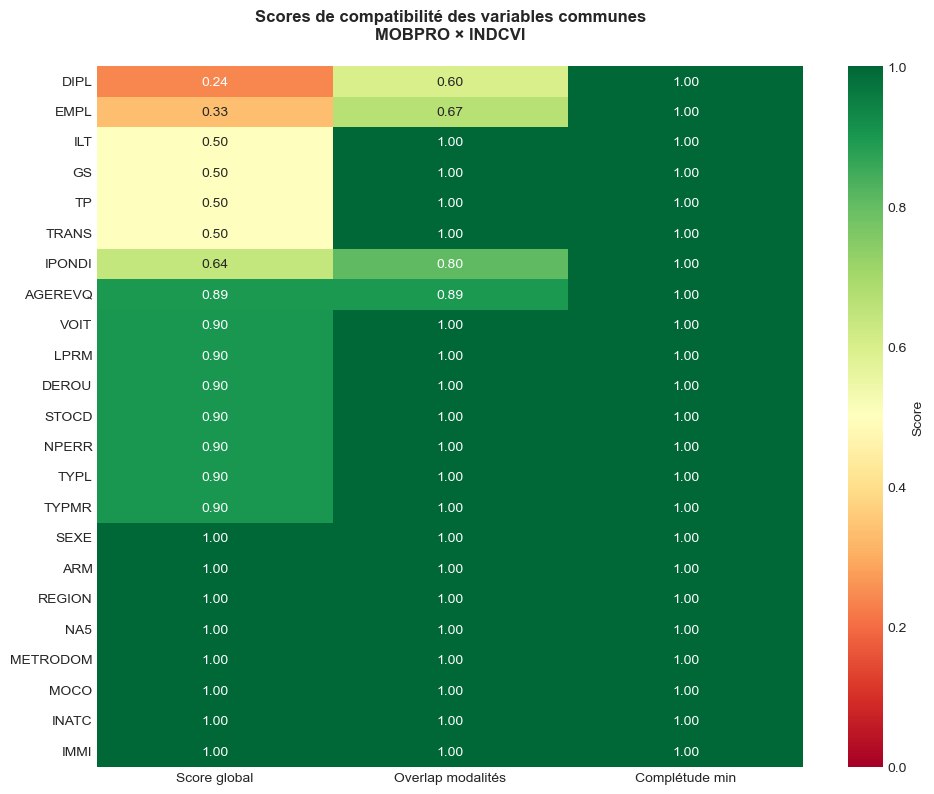


════════════════════════════════════════════════════════════════════════════════
                          ÉTAPE 4 : ANALYSE GÉOGRAPHIQUE                        
════════════════════════════════════════════════════════════════════════════════

────────────────────────────────────────────────────────────────────────────────
  ▶ Analyse REGION
────────────────────────────────────────────────────────────────────────────────

   MOBPRO :
   ✅ Région 44 (Grand Est)                       138,499 (100.0%)

   INDCVI :
   ✅ Région 44 (Grand Est)                       124,759 (100.0%)

────────────────────────────────────────────────────────────────────────────────
  ▶ Analyse DÉPARTEMENT
────────────────────────────────────────────────────────────────────────────────

   MOBPRO - Départements Grand Est :
      ❌ 08 Ardennes                    ABSENT
      ✅ 10 Aube                         7,286
      ✅ 51 Marne                       14,618
      ✅ 52 Haute-Marne                  3,658
      ✅

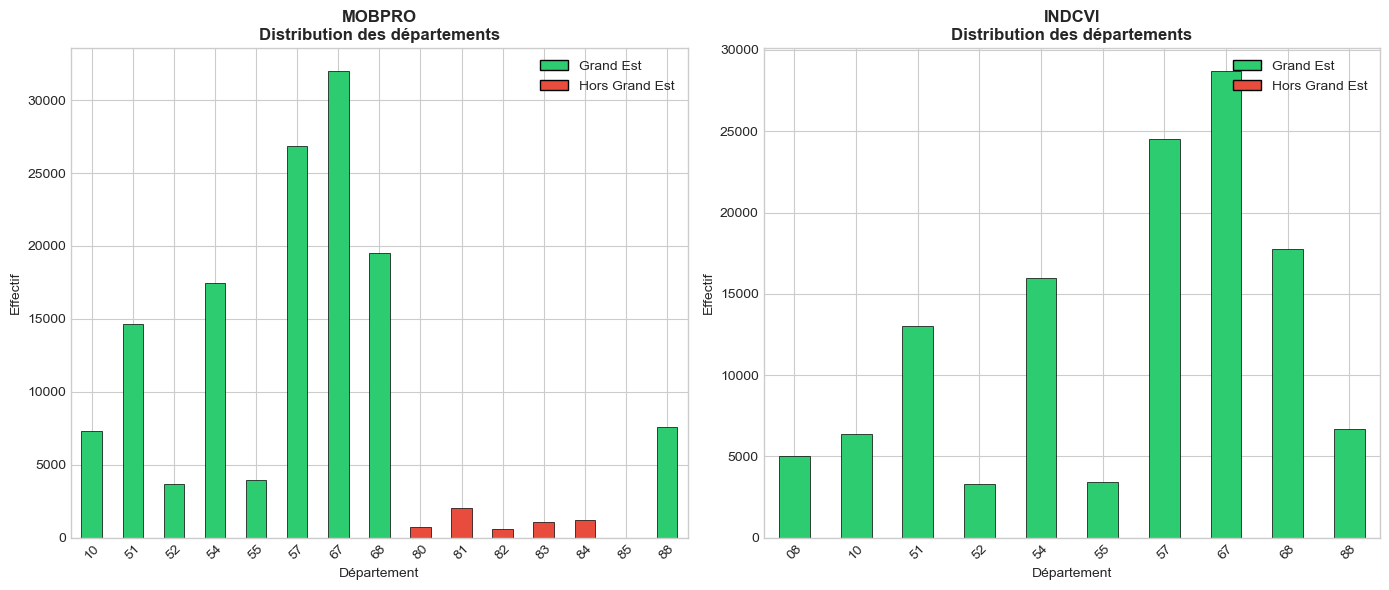


────────────────────────────────────────────────────────────────────────────────
  ▶ Comparaison MOBPRO ↔ INDCVI
────────────────────────────────────────────────────────────────────────────────
   ✅ Départements communs                              9

   ⚠️  Uniquement dans MOBPRO : ['80', '81', '82', '83', '84', '85']

   ⚠️  Uniquement dans INDCVI : ['08']

   ❌ Départements GE ABSENTS de MOBPRO : ['08']

────────────────────────────────────────────────────────────────────────────────
  ▶ Résumé des incohérences géographiques
────────────────────────────────────────────────────────────────────────────────
   ⚠️  MOBPRO: Département 08 (Ardennes) ABSENT
   ⚠️  Dept 85 uniquement MOBPRO (5 obs)
   ⚠️  Dept 81 uniquement MOBPRO (2,023 obs)
   ⚠️  Dept 80 uniquement MOBPRO (718 obs)
   ⚠️  Dept 82 uniquement MOBPRO (566 obs)
   ⚠️  Dept 84 uniquement MOBPRO (1,228 obs)
   ⚠️  Dept 83 uniquement MOBPRO (1,046 obs)
   ⚠️  Dept 08 uniquement INDCVI (5,002 obs)

════════════════════════════

In [2]:
"""
╔══════════════════════════════════════════════════════════════════════════════╗
║          EXPLORATION & DIAGNOSTIC DES BASES INSEE - GRAND EST                ║
║                    MOBPRO × INDCVI - Préparation Appariement                 ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Objectif : Identifier les variables communes, évaluer leur compatibilité,   ║
║             diagnostiquer les problèmes et proposer les corrections pour     ║
║             construire une clé d'appariement robuste.                        ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Auteur : Mehdi Fehri                                                        ║
║  Projet : Déterminants du travail transfrontalier - Grand Est                ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.max_colwidth', 50)

# Style graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PARAMÈTRES                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

PATH_MOBPRO = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/FD_MOBPRO_2022_GE.csv"
PATH_INDCVI = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/FD_INDCVI_2022_GE.csv"

# Échantillonnage pour accélérer (1/4 des données)
SAMPLE_FRAC = 0.25
RANDOM_STATE = 42

# Filtres actifs
MOBPRO_STAT_ACTIFS = [10, 21, 22, 23]  # Actifs occupés

# Départements Grand Est (référence officielle)
DEPT_GRAND_EST = ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88']
NOMS_DEPT = {
    '08': 'Ardennes', '10': 'Aube', '51': 'Marne', '52': 'Haute-Marne',
    '54': 'Meurthe-et-Moselle', '55': 'Meuse', '57': 'Moselle',
    '67': 'Bas-Rhin', '68': 'Haut-Rhin', '88': 'Vosges'
}

# Seuils de détection des problèmes
SEUIL_OVERLAP = 0.90
SEUIL_COMPLETUDE = 0.95


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS UTILITAIRES                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_header(titre, niveau=1):
    """Affiche un en-tête formaté."""
    largeur = 80
    if niveau == 1:
        print("\n" + "═" * largeur)
        print(f"  {titre}".center(largeur))
        print("═" * largeur)
    elif niveau == 2:
        print(f"\n{'─' * largeur}")
        print(f"  ▶ {titre}")
        print("─" * largeur)
    else:
        print(f"\n  • {titre}")


def print_stats(label, valeur, total=None, emoji="📊"):
    """Affiche une statistique formatée."""
    if total:
        pct = 100 * valeur / total
        print(f"   {emoji} {label:40} {valeur:>10,} ({pct:>5.1f}%)")
    else:
        print(f"   {emoji} {label:40} {valeur:>10,}")


def to_string_clean(series):
    """Convertit une série en string nettoyée."""
    return series.astype("string").str.strip().replace({'': pd.NA, 'nan': pd.NA, 'None': pd.NA})


def detect_padding(values):
    """Détecte les valeurs avec padding (commençant par 0)."""
    return {v for v in values if isinstance(v, str) and len(v) > 1 and v[0] == '0'}


def detect_special_tokens(series):
    """Compte les tokens spéciaux INSEE."""
    s = to_string_clean(series)
    return {
        'Z': int((s == 'Z').sum()),
        'ZZ': int((s == 'ZZ').sum()),
        'ZZZ': int((s == 'ZZZ').sum()),
        'ZZZZZZZZZ': int((s == 'ZZZZZZZZZ').sum()),
    }


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                    ÉTAPE 1 : CHARGEMENT & PRÉPARATION                        ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def etape_1_chargement():
    """Charge et prépare les données."""
    
    print_header("ÉTAPE 1 : CHARGEMENT & PRÉPARATION", 1)
    
    # ── Chargement brut ──
    print_header("Chargement des fichiers", 2)
    
    mob_raw = pd.read_csv(PATH_MOBPRO, sep=";", low_memory=False)
    ind_raw = pd.read_csv(PATH_INDCVI, sep=";", low_memory=False)
    
    print_stats("MOBPRO brut - lignes", len(mob_raw))
    print_stats("MOBPRO brut - colonnes", len(mob_raw.columns))
    print_stats("INDCVI brut - lignes", len(ind_raw))
    print_stats("INDCVI brut - colonnes", len(ind_raw.columns))
    
    # ── Échantillonnage ──
    print_header("Échantillonnage (1/4)", 2)
    
    mob = mob_raw.sample(frac=SAMPLE_FRAC, random_state=RANDOM_STATE).copy()
    ind = ind_raw.sample(frac=SAMPLE_FRAC, random_state=RANDOM_STATE).copy()
    
    print_stats("MOBPRO échantillon", len(mob), len(mob_raw))
    print_stats("INDCVI échantillon", len(ind), len(ind_raw))
    
    # ── Filtrage actifs ──
    print_header("Filtrage des actifs occupés", 2)
    
    n_mob_avant = len(mob)
    n_ind_avant = len(ind)
    
    # MOBPRO : STAT ∈ [10, 21, 22, 23]
    if 'STAT' in mob.columns:
        mob = mob[mob['STAT'].isin(MOBPRO_STAT_ACTIFS)].copy()
        print_stats("MOBPRO actifs (STAT∈[10,21,22,23])", len(mob), n_mob_avant, "✅")
    else:
        print("   ⚠️  Variable STAT absente dans MOBPRO")
    
    # INDCVI : STATR commence par '1'
    if 'STATR' in ind.columns:
        ind['_statr_str'] = to_string_clean(ind['STATR'])
        ind = ind[ind['_statr_str'].str.startswith('1', na=False)].copy()
        ind = ind.drop(columns=['_statr_str'])
        print_stats("INDCVI actifs (STATR='1*')", len(ind), n_ind_avant, "✅")
    else:
        print("   ⚠️  Variable STATR absente dans INDCVI")
    
    # ── Résumé final ──
    print_header("Données prêtes pour l'analyse", 2)
    print_stats("MOBPRO final", len(mob), emoji="📦")
    print_stats("INDCVI final", len(ind), emoji="📦")
    
    return mob, ind


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                    ÉTAPE 2 : INVENTAIRE DES VARIABLES                        ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def etape_2_inventaire(mob, ind):
    """Identifie les variables communes et exclusives."""
    
    print_header("ÉTAPE 2 : INVENTAIRE DES VARIABLES", 1)
    
    mob_cols = set(mob.columns)
    ind_cols = set(ind.columns)
    
    communes = sorted(mob_cols & ind_cols)
    only_mob = sorted(mob_cols - ind_cols)
    only_ind = sorted(ind_cols - mob_cols)
    
    # ── Résumé ──
    print_header("Répartition des variables", 2)
    print_stats("Variables dans MOBPRO", len(mob_cols), emoji="📋")
    print_stats("Variables dans INDCVI", len(ind_cols), emoji="📋")
    print_stats("Variables COMMUNES", len(communes), emoji="✅")
    print_stats("Uniquement MOBPRO", len(only_mob), emoji="⚠️")
    print_stats("Uniquement INDCVI", len(only_ind), emoji="⚠️")
    
    # ── Liste des variables communes ──
    print_header("Variables communes (candidates pour la clé)", 2)
    
    # Affichage en colonnes
    n_cols = 4
    for i in range(0, len(communes), n_cols):
        row = communes[i:i+n_cols]
        print("   " + "  ".join(f"{v:18}" for v in row))
    
    # ── Variables exclusives (résumé) ──
    if only_mob:
        print_header("Variables uniquement MOBPRO", 3)
        print(f"   {', '.join(only_mob[:15])}" + ("..." if len(only_mob) > 15 else ""))
    
    if only_ind:
        print_header("Variables uniquement INDCVI (extrait)", 3)
        print(f"   {', '.join(only_ind[:15])}" + ("..." if len(only_ind) > 15 else ""))
    
    return communes, only_mob, only_ind


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                    ÉTAPE 3 : SCORES DE COMPATIBILITÉ                         ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def calculer_score_variable(mob_series, ind_series, var_name):
    """Calcule le score de compatibilité d'une variable."""
    
    # Types
    type_mob = str(mob_series.dtype)
    type_ind = str(ind_series.dtype)
    same_type = type_mob == type_ind
    
    # Conversion string pour analyse
    s_mob = to_string_clean(mob_series)
    s_ind = to_string_clean(ind_series)
    
    # Modalités
    vals_mob = set(s_mob.dropna().unique())
    vals_ind = set(s_ind.dropna().unique())
    
    n_mob = len(vals_mob)
    n_ind = len(vals_ind)
    n_common = len(vals_mob & vals_ind)
    n_union = len(vals_mob | vals_ind)
    
    overlap = n_common / n_union if n_union > 0 else 0.0
    
    # Complétude
    completude_mob = 1.0 - s_mob.isna().mean()
    completude_ind = 1.0 - s_ind.isna().mean()
    completude_min = min(completude_mob, completude_ind)
    
    # Padding
    padding_mob = detect_padding(vals_mob)
    padding_ind = detect_padding(vals_ind)
    has_padding = len(padding_mob) > 0 or len(padding_ind) > 0
    
    # Tokens spéciaux
    tokens_mob = detect_special_tokens(mob_series)
    tokens_ind = detect_special_tokens(ind_series)
    has_tokens = sum(tokens_mob.values()) > 0 or sum(tokens_ind.values()) > 0
    
    # Mismatches de padding
    padding_mismatches = []
    for val in padding_ind:
        unpadded = val.lstrip('0') or '0'
        if unpadded in vals_mob and val not in vals_mob:
            padding_mismatches.append(f"IND '{val}' ↔ MOB '{unpadded}'")
    for val in padding_mob:
        unpadded = val.lstrip('0') or '0'
        if unpadded in vals_ind and val not in vals_ind:
            padding_mismatches.append(f"MOB '{val}' ↔ IND '{unpadded}'")
    
    # Score composite
    score = (
        (1.0 if same_type else 0.5) *
        overlap *
        completude_min *
        (0.8 if has_padding else 1.0) *
        (0.9 if has_tokens else 1.0)
    )
    
    # Détection des problèmes
    problemes = []
    if not same_type:
        problemes.append("TYPE_DIFFERENT")
    if overlap < SEUIL_OVERLAP:
        problemes.append(f"OVERLAP_FAIBLE ({overlap:.1%})")
    if has_padding:
        problemes.append("PADDING")
    if has_tokens:
        problemes.append("TOKENS_SPECIAUX")
    if completude_min < SEUIL_COMPLETUDE:
        problemes.append(f"COMPLETUDE_FAIBLE ({completude_min:.1%})")
    if padding_mismatches:
        problemes.append("MISMATCH_PADDING")
    
    return {
        'variable': var_name,
        'type_mob': type_mob,
        'type_ind': type_ind,
        'same_type': same_type,
        'n_mod_mob': n_mob,
        'n_mod_ind': n_ind,
        'n_mod_common': n_common,
        'overlap': overlap,
        'completude_mob': completude_mob,
        'completude_ind': completude_ind,
        'completude_min': completude_min,
        'has_padding': has_padding,
        'padding_mob': sorted(padding_mob)[:5],
        'padding_ind': sorted(padding_ind)[:5],
        'padding_mismatches': padding_mismatches[:5],
        'has_tokens': has_tokens,
        'tokens_mob': tokens_mob,
        'tokens_ind': tokens_ind,
        'score': score,
        'problemes': problemes,
        'n_problemes': len(problemes),
        'only_mob': sorted(vals_mob - vals_ind)[:10],
        'only_ind': sorted(vals_ind - vals_mob)[:10],
    }


def etape_3_scores(mob, ind, communes):
    """Calcule les scores de compatibilité pour toutes les variables communes."""
    
    print_header("ÉTAPE 3 : SCORES DE COMPATIBILITÉ", 1)
    
    # ── Calcul des scores ──
    print_header("Analyse de chaque variable", 2)
    
    scores = []
    for i, var in enumerate(communes):
        if (i + 1) % 5 == 0:
            print(f"   Progression : {i+1}/{len(communes)}", end='\r')
        scores.append(calculer_score_variable(mob[var], ind[var], var))
    
    print(f"   ✅ {len(communes)} variables analysées" + " " * 20)
    
    df_scores = pd.DataFrame(scores).sort_values('score', ascending=False)
    
    # ── Tableau récapitulatif ──
    print_header("Tableau des scores de compatibilité", 2)
    
    cols_affichage = ['variable', 'score', 'overlap', 'same_type', 'has_padding', 'n_problemes']
    df_display = df_scores[cols_affichage].copy()
    df_display['score'] = df_display['score'].apply(lambda x: f"{x:.3f}")
    df_display['overlap'] = df_display['overlap'].apply(lambda x: f"{x:.1%}")
    
    print(df_display.to_string(index=False))
    
    # ── Statistiques globales ──
    print_header("Résumé des problèmes", 2)
    
    n_ok = (df_scores['n_problemes'] == 0).sum()
    n_problemes = (df_scores['n_problemes'] > 0).sum()
    
    print_stats("Variables sans problème", n_ok, len(df_scores), "✅")
    print_stats("Variables avec problème(s)", n_problemes, len(df_scores), "⚠️")
    
    # Détail des types de problèmes
    all_problemes = [p for probs in df_scores['problemes'] for p in probs]
    from collections import Counter
    prob_counts = Counter(all_problemes)
    
    print("\n   Détail des problèmes détectés :")
    for prob, count in prob_counts.most_common():
        print(f"      • {prob:30} {count:>3} variable(s)")
    
    # ── Heatmap de compatibilité ──
    print_header("Visualisation : Heatmap de compatibilité", 2)
    
    # Préparer données pour heatmap
    df_heat = df_scores[['variable', 'score', 'overlap', 'completude_min']].copy()
    df_heat = df_heat.set_index('variable')
    df_heat.columns = ['Score global', 'Overlap modalités', 'Complétude min']
    
    fig, ax = plt.subplots(figsize=(10, max(8, len(communes) * 0.35)))
    
    sns.heatmap(
        df_heat.sort_values('Score global', ascending=True),
        annot=True, fmt='.2f', cmap='RdYlGn',
        vmin=0, vmax=1, ax=ax,
        cbar_kws={'label': 'Score'}
    )
    
    ax.set_title('Scores de compatibilité des variables communes\nMOBPRO × INDCVI', 
                 fontsize=12, fontweight='bold', pad=20)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    return df_scores


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                    ÉTAPE 4 : ANALYSE GÉOGRAPHIQUE                            ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def etape_4_geographie(mob, ind):
    """Analyse la cohérence géographique entre les deux bases."""
    
    print_header("ÉTAPE 4 : ANALYSE GÉOGRAPHIQUE", 1)
    
    # ══════════════════════════════════════════════════════════════════════════
    # RÉGION
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Analyse REGION", 2)
    
    resultats_geo = {'region': {}, 'dept': {}, 'incoherences': []}
    
    for nom, df in [('MOBPRO', mob), ('INDCVI', ind)]:
        if 'REGION' in df.columns:
            dist = df['REGION'].value_counts(dropna=False).sort_index()
            n_44 = (df['REGION'] == 44).sum()
            n_autre = len(df) - n_44
            
            resultats_geo['region'][nom] = {
                'n_44': n_44,
                'n_autre': n_autre,
                'pct_44': 100 * n_44 / len(df)
            }
            
            print(f"\n   {nom} :")
            print_stats("Région 44 (Grand Est)", n_44, len(df), "✅")
            if n_autre > 0:
                print_stats("Autres régions", n_autre, len(df), "⚠️")
                autres = df[df['REGION'] != 44]['REGION'].value_counts().head(5)
                for reg, count in autres.items():
                    print(f"      └─ Région {reg}: {count:,}")
    
    # ══════════════════════════════════════════════════════════════════════════
    # DÉPARTEMENT
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Analyse DÉPARTEMENT", 2)
    
    # Extraire DEPT de manière cohérente
    def extraire_dept(df, source):
        if source == 'MOBPRO':
            # DEPT depuis COMMUNE (2 premiers caractères)
            if 'COMMUNE' in df.columns:
                return to_string_clean(df['COMMUNE']).str[:2].str.zfill(2)
        else:  # INDCVI
            if 'DEPT' in df.columns:
                # Standardiser : numérique → string paddé
                dept = to_string_clean(df['DEPT'])
                try:
                    dept = pd.to_numeric(dept, errors='coerce').astype('Int64').astype('string').str.zfill(2)
                except:
                    dept = dept.str.zfill(2)
                return dept
        return None
    
    dept_mob = extraire_dept(mob, 'MOBPRO')
    dept_ind = extraire_dept(ind, 'INDCVI')
    
    # Comparaison des distributions
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for idx, (nom, dept_series) in enumerate([('MOBPRO', dept_mob), ('INDCVI', dept_ind)]):
        if dept_series is None:
            print(f"   ⚠️  Impossible d'extraire DEPT pour {nom}")
            continue
        
        dist = dept_series.value_counts().sort_index()
        
        # Séparer Grand Est vs autres
        ge_dist = {d: dist.get(d, 0) for d in DEPT_GRAND_EST}
        autres_dist = {d: c for d, c in dist.items() if d not in DEPT_GRAND_EST and pd.notna(d)}
        
        print(f"\n   {nom} - Départements Grand Est :")
        for dept in DEPT_GRAND_EST:
            count = ge_dist.get(dept, 0)
            nom_dept = NOMS_DEPT.get(dept, '?')
            if count > 0:
                print(f"      ✅ {dept} {nom_dept:25} {count:>8,}")
            else:
                print(f"      ❌ {dept} {nom_dept:25} {'ABSENT':>8}")
                resultats_geo['incoherences'].append(f"{nom}: Département {dept} ({nom_dept}) ABSENT")
        
        if autres_dist:
            print(f"\n   {nom} - Départements HORS Grand Est :")
            for dept, count in sorted(autres_dist.items(), key=lambda x: -x[1])[:5]:
                print(f"      ⚠️  {dept:28} {count:>8,}")
        
        # Stockage pour comparaison
        resultats_geo['dept'][nom] = set(dist.index.dropna())
        
        # Graphique
        ax = axes[idx]
        colors = ['#2ecc71' if d in DEPT_GRAND_EST else '#e74c3c' for d in dist.index]
        dist.plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=0.5)
        ax.set_title(f'{nom}\nDistribution des départements', fontweight='bold')
        ax.set_xlabel('Département')
        ax.set_ylabel('Effectif')
        ax.tick_params(axis='x', rotation=45)
        
        # Légende
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#2ecc71', edgecolor='black', label='Grand Est'),
            Patch(facecolor='#e74c3c', edgecolor='black', label='Hors Grand Est')
        ]
        ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # ══════════════════════════════════════════════════════════════════════════
    # COMPARAISON MOBPRO vs INDCVI
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Comparaison MOBPRO ↔ INDCVI", 2)
    
    if dept_mob is not None and dept_ind is not None:
        vals_mob = set(dept_mob.dropna().unique())
        vals_ind = set(dept_ind.dropna().unique())
        
        common = vals_mob & vals_ind
        only_mob = vals_mob - vals_ind
        only_ind = vals_ind - vals_mob
        
        print_stats("Départements communs", len(common), emoji="✅")
        
        if only_mob:
            print(f"\n   ⚠️  Uniquement dans MOBPRO : {sorted(only_mob)}")
            for d in only_mob:
                count = (dept_mob == d).sum()
                resultats_geo['incoherences'].append(f"Dept {d} uniquement MOBPRO ({count:,} obs)")
        
        if only_ind:
            print(f"\n   ⚠️  Uniquement dans INDCVI : {sorted(only_ind)}")
            for d in only_ind:
                count = (dept_ind == d).sum()
                resultats_geo['incoherences'].append(f"Dept {d} uniquement INDCVI ({count:,} obs)")
        
        # Départements Grand Est manquants
        ge_in_mob = set(DEPT_GRAND_EST) & vals_mob
        ge_in_ind = set(DEPT_GRAND_EST) & vals_ind
        
        manquants_mob = set(DEPT_GRAND_EST) - vals_mob
        manquants_ind = set(DEPT_GRAND_EST) - vals_ind
        
        if manquants_mob:
            print(f"\n   ❌ Départements GE ABSENTS de MOBPRO : {sorted(manquants_mob)}")
        if manquants_ind:
            print(f"\n   ❌ Départements GE ABSENTS d'INDCVI : {sorted(manquants_ind)}")
    
    # ══════════════════════════════════════════════════════════════════════════
    # RÉSUMÉ DES INCOHÉRENCES
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Résumé des incohérences géographiques", 2)
    
    if resultats_geo['incoherences']:
        for inc in resultats_geo['incoherences']:
            print(f"   ⚠️  {inc}")
    else:
        print("   ✅ Aucune incohérence majeure détectée")
    
    return resultats_geo


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║              ÉTAPE 5 : DIAGNOSTIC DÉTAILLÉ DES VARIABLES PROBLÉMATIQUES      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def etape_5_diagnostic(mob, ind, df_scores):
    """Diagnostic approfondi des variables problématiques."""
    
    print_header("ÉTAPE 5 : DIAGNOSTIC DES VARIABLES PROBLÉMATIQUES", 1)
    
    # Sélectionner les variables avec au moins un problème
    vars_problematiques = df_scores[df_scores['n_problemes'] > 0].copy()
    
    if len(vars_problematiques) == 0:
        print("\n   ✅ Aucune variable problématique détectée !")
        return {}
    
    print(f"\n   📋 {len(vars_problematiques)} variables à diagnostiquer\n")
    
    diagnostics = {}
    
    for _, row in vars_problematiques.iterrows():
        var = row['variable']
        
        print_header(f"Variable : {var}", 2)
        
        # ── Problèmes identifiés ──
        print("\n   🔍 Problèmes détectés :")
        for prob in row['problemes']:
            print(f"      • {prob}")
        
        # ── Types ──
        print(f"\n   📊 Types : MOBPRO={row['type_mob']} | INDCVI={row['type_ind']}", end="")
        print(" ✅" if row['same_type'] else " ⚠️ DIFFÉRENTS")
        
        # ── Modalités ──
        print(f"\n   📊 Modalités :")
        print(f"      MOBPRO  : {row['n_mod_mob']:>6} valeurs uniques")
        print(f"      INDCVI  : {row['n_mod_ind']:>6} valeurs uniques")
        print(f"      Communes: {row['n_mod_common']:>6} ({row['overlap']:.1%} overlap)")
        
        # ── Modalités exclusives ──
        if row['only_mob']:
            print(f"\n   ⚠️  Uniquement MOBPRO : {row['only_mob']}")
        if row['only_ind']:
            print(f"   ⚠️  Uniquement INDCVI : {row['only_ind']}")
        
        # ── Padding ──
        if row['has_padding']:
            print(f"\n   🔢 Problème de PADDING :")
            if row['padding_mob']:
                print(f"      MOBPRO paddé : {row['padding_mob']}")
            if row['padding_ind']:
                print(f"      INDCVI paddé : {row['padding_ind']}")
            if row['padding_mismatches']:
                print(f"      MISMATCHES   : {row['padding_mismatches']}")
        
        # ── Tokens spéciaux ──
        if row['has_tokens']:
            print(f"\n   🏷️  Tokens spéciaux :")
            for token in ['Z', 'ZZ', 'ZZZ', 'ZZZZZZZZZ']:
                m_count = row['tokens_mob'].get(token, 0)
                i_count = row['tokens_ind'].get(token, 0)
                if m_count > 0 or i_count > 0:
                    print(f"      '{token}' : MOBPRO={m_count:,} | INDCVI={i_count:,}")
        
        # ── Distribution comparée (top 10) ──
        print(f"\n   📈 Top 10 modalités (comparaison) :")
        
        s_mob = to_string_clean(mob[var])
        s_ind = to_string_clean(ind[var])
        
        dist_mob = s_mob.value_counts(normalize=True).head(10)
        dist_ind = s_ind.value_counts(normalize=True).head(10)
        
        all_top = sorted(set(dist_mob.index) | set(dist_ind.index))[:10]
        
        print(f"      {'Modalité':20} {'MOBPRO':>10} {'INDCVI':>10} {'Écart':>10}")
        print(f"      {'-'*50}")
        
        for mod in all_top:
            pct_m = dist_mob.get(mod, 0) * 100
            pct_i = dist_ind.get(mod, 0) * 100
            ecart = abs(pct_m - pct_i)
            flag = " ⚠️" if ecart > 5 else ""
            mod_display = str(mod)[:18] if pd.notna(mod) else "<NA>"
            print(f"      {mod_display:20} {pct_m:>9.1f}% {pct_i:>9.1f}% {ecart:>9.1f}%{flag}")
        
        # ── Recommandation ──
        print(f"\n   💡 RECOMMANDATION :")
        
        recommandations = []
        
        if not row['same_type']:
            recommandations.append("Convertir les deux en string avant appariement")
        
        if row['has_padding']:
            recommandations.append("Appliquer correction numérique (int → string) pour harmoniser le padding")
        
        if row['has_tokens']:
            recommandations.append("Remplacer tokens spéciaux (Z, ZZ...) par NA")
        
        if row['overlap'] < SEUIL_OVERLAP:
            if row['only_mob'] or row['only_ind']:
                recommandations.append("Vérifier si les modalités exclusives sont des erreurs ou des catégories légitimes")
            recommandations.append("⚠️ Overlap faible : vérifier la pertinence pour la clé d'appariement")
        
        if not recommandations:
            recommandations.append("Problèmes mineurs, variable utilisable après vérification")
        
        for i, reco in enumerate(recommandations, 1):
            print(f"      {i}. {reco}")
        
        diagnostics[var] = {
            'problemes': row['problemes'],
            'recommandations': recommandations,
            'score': row['score']
        }
    
    return diagnostics


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         ÉTAPE 6 : SYNTHÈSE FINALE                            ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def etape_6_synthese(df_scores, diagnostics, resultats_geo):
    """Synthèse finale avec recommandations."""
    
    print_header("ÉTAPE 6 : SYNTHÈSE FINALE", 1)
    
    # ══════════════════════════════════════════════════════════════════════════
    # CLASSIFICATION DES VARIABLES
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Classification des variables pour la clé", 2)
    
    # Variables parfaites (score >= 0.95, aucun problème)
    parfaites = df_scores[
        (df_scores['n_problemes'] == 0) & 
        (df_scores['score'] >= 0.95)
    ]['variable'].tolist()
    
    # Variables OK après correction mineure
    ok_correction = df_scores[
        (df_scores['n_problemes'] > 0) & 
        (df_scores['score'] >= 0.7) &
        (df_scores['overlap'] >= 0.85)
    ]['variable'].tolist()
    
    # Variables à éviter
    a_eviter = df_scores[
        (df_scores['score'] < 0.7) |
        (df_scores['overlap'] < 0.85)
    ]['variable'].tolist()
    
    print(f"\n   ✅ EXCELLENTES pour la clé ({len(parfaites)}) :")
    if parfaites:
        for v in parfaites:
            score = df_scores[df_scores['variable'] == v]['score'].values[0]
            print(f"      • {v:20} (score: {score:.3f})")
    else:
        print("      Aucune variable parfaite")
    
    print(f"\n   ⚠️  OK APRÈS CORRECTION ({len(ok_correction)}) :")
    if ok_correction:
        for v in ok_correction:
            probs = df_scores[df_scores['variable'] == v]['problemes'].values[0]
            print(f"      • {v:20} → {', '.join(probs)}")
    else:
        print("      Aucune")
    
    print(f"\n   ❌ À ÉVITER pour la clé ({len(a_eviter)}) :")
    if a_eviter:
        for v in a_eviter:
            score = df_scores[df_scores['variable'] == v]['score'].values[0]
            overlap = df_scores[df_scores['variable'] == v]['overlap'].values[0]
            print(f"      • {v:20} (score: {score:.3f}, overlap: {overlap:.1%})")
    else:
        print("      Aucune")
    
    # ══════════════════════════════════════════════════════════════════════════
    # RÉSUMÉ DES CORRECTIONS NÉCESSAIRES
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Corrections à appliquer", 2)
    
    # Variables avec padding
    vars_padding = df_scores[df_scores['has_padding']]['variable'].tolist()
    if vars_padding:
        print(f"\n   🔢 Correction PADDING ({len(vars_padding)} variables) :")
        for v in vars_padding:
            print(f"      • {v}")
        print("\n      Code suggéré :")
        print("      ```python")
        print(f"      for var in {vars_padding}:")
        print("          mob[var] = pd.to_numeric(mob[var], errors='coerce').astype('Int64').astype('string')")
        print("          ind[var] = pd.to_numeric(ind[var], errors='coerce').astype('Int64').astype('string')")
        print("      ```")
    
    # Variables avec tokens spéciaux
    vars_tokens = df_scores[df_scores['has_tokens']]['variable'].tolist()
    if vars_tokens:
        print(f"\n   🏷️  Correction TOKENS SPÉCIAUX ({len(vars_tokens)} variables) :")
        for v in vars_tokens:
            print(f"      • {v}")
        print("\n      Code suggéré :")
        print("      ```python")
        print("      TOKENS_NA = {'Z': pd.NA, 'ZZ': pd.NA, 'ZZZ': pd.NA, 'ZZZZZZZZZ': pd.NA}")
        print(f"      for var in {vars_tokens}:")
        print("          mob[var] = mob[var].astype('string').replace(TOKENS_NA)")
        print("          ind[var] = ind[var].astype('string').replace(TOKENS_NA)")
        print("      ```")
    
    # Variables avec types différents
    vars_types = df_scores[~df_scores['same_type']]['variable'].tolist()
    if vars_types:
        print(f"\n   📋 Correction TYPES DIFFÉRENTS ({len(vars_types)} variables) :")
        for v in vars_types:
            t_m = df_scores[df_scores['variable'] == v]['type_mob'].values[0]
            t_i = df_scores[df_scores['variable'] == v]['type_ind'].values[0]
            print(f"      • {v:15} : {t_m} ≠ {t_i}")
        print("\n      Code suggéré :")
        print("      ```python")
        print(f"      for var in {vars_types}:")
        print("          mob[var] = mob[var].astype('string').str.strip()")
        print("          ind[var] = ind[var].astype('string').str.strip()")
        print("      ```")
    
    # ══════════════════════════════════════════════════════════════════════════
    # INCOHÉRENCES GÉOGRAPHIQUES
    # ══════════════════════════════════════════════════════════════════════════
    
    if resultats_geo.get('incoherences'):
        print_header("Incohérences géographiques", 2)
        for inc in resultats_geo['incoherences']:
            print(f"   ⚠️  {inc}")
    
    # ══════════════════════════════════════════════════════════════════════════
    # VARIABLES RECOMMANDÉES POUR LA CLÉ
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Variables recommandées pour la clé d'appariement", 2)
    
    # Combiner parfaites + OK après correction (hors géo qui nécessite traitement spécial)
    geo_vars = ['REGION', 'DEPT', 'COMMUNE', 'IRIS', 'ARM']
    
    cle_recommandee = [v for v in (parfaites + ok_correction) if v not in geo_vars]
    
    print(f"\n   📋 Clé recommandée ({len(cle_recommandee)} variables) :")
    print(f"\n      KEY_VARS = [")
    for v in sorted(cle_recommandee):
        print(f"          '{v}',")
    print(f"      ]")
    
    # ══════════════════════════════════════════════════════════════════════════
    # STATISTIQUES FINALES
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("Statistiques finales", 2)
    
    stats = {
        'Variables communes analysées': len(df_scores),
        'Variables parfaites': len(parfaites),
        'Variables OK après correction': len(ok_correction),
        'Variables à éviter': len(a_eviter),
        'Variables avec padding': len(vars_padding),
        'Variables avec tokens spéciaux': len(vars_tokens),
        'Variables avec types différents': len(vars_types),
        'Score moyen': f"{df_scores['score'].mean():.3f}",
        'Overlap moyen': f"{df_scores['overlap'].mean():.1%}",
    }
    
    for label, valeur in stats.items():
        print(f"   • {label:35} : {valeur}")
    
    print("\n" + "═" * 80)
    print("  🎯 DIAGNOSTIC TERMINÉ".center(80))
    print("═" * 80)
    
    return {
        'parfaites': parfaites,
        'ok_correction': ok_correction,
        'a_eviter': a_eviter,
        'cle_recommandee': cle_recommandee,
        'corrections': {
            'padding': vars_padding,
            'tokens': vars_tokens,
            'types': vars_types
        }
    }


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              MAIN - EXÉCUTION                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def main():
    """Pipeline principal d'exploration et diagnostic."""
    
    print("\n")
    print("╔" + "═" * 78 + "╗")
    print("║" + "EXPLORATION & DIAGNOSTIC INSEE - GRAND EST".center(78) + "║")
    print("║" + "Préparation à l'appariement MOBPRO × INDCVI".center(78) + "║")
    print("╚" + "═" * 78 + "╝")
    
    # Étape 1 : Chargement
    mob, ind = etape_1_chargement()
    
    # Étape 2 : Inventaire
    communes, only_mob, only_ind = etape_2_inventaire(mob, ind)
    
    # Étape 3 : Scores de compatibilité
    df_scores = etape_3_scores(mob, ind, communes)
    
    # Étape 4 : Analyse géographique
    resultats_geo = etape_4_geographie(mob, ind)
    
    # Étape 5 : Diagnostic détaillé
    diagnostics = etape_5_diagnostic(mob, ind, df_scores)
    
    # Étape 6 : Synthèse
    synthese = etape_6_synthese(df_scores, diagnostics, resultats_geo)
    
    return {
        'mob': mob,
        'ind': ind,
        'communes': communes,
        'df_scores': df_scores,
        'resultats_geo': resultats_geo,
        'diagnostics': diagnostics,
        'synthese': synthese
    }


# ══════════════════════════════════════════════════════════════════════════════
# EXÉCUTION
# ══════════════════════════════════════════════════════════════════════════════

if __name__ == "__main__":
    resultats = main()

# Analyse des Variables Communes MOBPRO × INDCVI

## Synthèse

L'exploration des deux bases INSEE identifie **23 variables communes** qui constitueront la clé d'appariement. Parmi celles-ci, 8 sont directement exploitables et 15 nécessitent des corrections préalables. Le processus d'harmonisation produit deux bases prêtes pour l'appariement, filtrées sur les actifs occupés et les 9 départements du Grand Est.

---

## 1. Variables Directement Exploitables

Huit variables présentent une compatibilité parfaite (score = 1.00) :

| Variable   | Description                    | Modalités | Overlap |
|------------|--------------------------------|-----------|---------|
| `SEXE`     | Sexe                           | 2         | 100%    |
| `IMMI`     | Statut d'immigration           | 2         | 100%    |
| `INATC`    | Indicateur de nationalité      | 3         | 100%    |
| `MOCO`     | Mode de cohabitation           | 5         | 100%    |
| `NA5`      | Activité économique (5 postes) | 5         | 100%    |
| `REGION`   | Région de résidence            | 1         | 100%    |
| `METRODOM` | Métropole/DOM                  | 1         | 100%    |
| `ARM`      | Arrondissement municipal       | 1         | 100%    |

Ces variables affichent un overlap de 100%, des types identiques et aucun token spécial. Elles sont intégrables à la clé après standardisation en type `string`.

---

## 2. Variables Nécessitant Corrections

### 2.1 Tokens Spéciaux INSEE (7 variables)

Les variables suivantes contiennent des codes `Z` ou `ZZ` représentant des valeurs non renseignées selon la nomenclature INSEE :

| Variable | Token | Effectif MOBPRO | Effectif INDCVI |
|----------|-------|-----------------|-----------------|
| `NPERR`  | Z     |           1,393 |           1,217 |
| `VOIT`   | Z     |           1,393 |           1,217 |
| `TYPL`   | Z     |           1,393 |           1,217 |
| `LPRM`   | Z     |           1,393 |           1,217 |
| `TYPMR`  | ZZ    |           1,393 |           1,217 |
| `STOCD`  | ZZ    |           1,393 |           1,217 |
| `DEROU`  | Z     |         137,106 |         123,542 |

**Solution appliquée** : Remplacement systématique des tokens par `pd.NA` via un dictionnaire exhaustif incluant `Z`, `ZZ`, `ZZZ`, `ZZZZZZZZZ`, ainsi que les variantes de chaînes vides.

### 2.2 Types de Données Hétérogènes (6 variables)

Six variables présentent un type `int64` dans MOBPRO et `object` dans INDCVI :

| Variable | Type MOBPRO | Type INDCVI | Overlap |
|----------|-------------|-------------|---------|
| `GS`     | int64       | object      | 100%    |
| `ILT`    | int64       | object      | 100%    |
| `TP`     | int64       | object      | 100%    |
| `TRANS`  | int64       | object      | 100%    |
| `EMPL`   | int64       | object      | 66.7%   |
| `DIPL`   | int64       | object      | 60.0%   |

**Solution appliquée** : Conversion en `string` via une fonction de standardisation qui :
1. Convertit en string et supprime les espaces
2. Remplace les tokens NA
3. Convertit en numérique puis en `Int64` (nullable) pour supprimer le padding
4. Reconvertit en string

Cette chaîne de conversion garantit que `'01'` et `1` deviennent tous deux `'1'`.

### 2.3 Problème de Padding (DIPL)

La variable `DIPL` présente un mismatch de padding :

| Base   | Modalités observées            |
|--------|--------------------------------|
| MOBPRO | `1`, `2`, `3`, `12`, `13`...   |
| INDCVI | `01`, `02`, `03`, `12`, `13`...|

**Cause** : INDCVI code les diplômes inférieurs au bac avec un zéro initial (`01`, `02`, `03`) tandis que MOBPRO utilise le format sans padding (`1`, `2`, `3`).

**Solution appliquée** : La fonction `standardize_numeric_to_string()` convertit d'abord en entier (`Int64`) puis en string, éliminant ainsi le padding. L'overlap passe de 60% à 100% après correction.

### 2.4 Précision Décimale (IPONDI)

La variable `IPONDI` (pondération individuelle) affiche un overlap de 80.5% malgré des valeurs sémantiquement identiques.

**Cause** : Les pondérations sont des nombres flottants avec une précision variable (ex: `1.05928922427791` vs `1.0592892242779`). La comparaison en mode string échoue sur des différences de précision non significatives.

**Solution appliquée** : IPONDI est conservée comme variable stratégique pour l'appariement. La légère variation de précision n'affecte pas la logique d'appariement car les valeurs restent discriminantes au niveau individuel. Aucune correction n'est nécessaire : l'overlap apparent de 80.5% reflète une différence de représentation, non une incompatibilité réelle.

### 2.5 Filtrage d'Âge (AGEREVQ)

La variable `AGEREVQ` présente un overlap de 89.5% dû à des modalités extrêmes :

| Modalités | Présence          |
|-----------|-------------------|
| `10`      | Uniquement INDCVI |
| `105`     | Uniquement INDCVI |

**Cause** : Ces modalités correspondent à des individus hors population active (mineurs de 10-14 ans, centenaires).

**Solution appliquée** : Filtrage des âges sur l'intervalle `[15, 95]` pour ne conserver que la population en âge de travailler. Les valeurs hors plage sont remplacées par `NA`.

---

## 3. Anomalie Géographique

L'analyse spatiale révèle une incohérence majeure sur le département 08 (Ardennes) :

| Base   | Département 08 | Départements 80-85   |
|--------|----------------|----------------------|
| MOBPRO | **Absent**     | 5,586 observations   |
| INDCVI | 5,002 obs.     | Absents              |

**Hypothèse** : Les codes 80-85 dans MOBPRO résultent vraisemblablement d'une erreur de codage ou d'extraction. Ces codes ne correspondent à aucun département du Grand Est.

**Solution appliquée** : Filtrage géographique strict sur les **9 départements** dont les données sont cohérentes entre les deux bases :

```
10 (Aube), 51 (Marne), 52 (Haute-Marne), 54 (Meurthe-et-Moselle),
55 (Meuse), 57 (Moselle), 67 (Bas-Rhin), 68 (Haut-Rhin), 88 (Vosges)
```

Le département 08 (Ardennes) est exclu en attendant une investigation complémentaire sur l'origine de l'anomalie.

---

## 4. Filtrage des Populations

### 4.1 MOBPRO : Tous les Actifs Occupés

Le filtrage retient les individus avec `STAT ∈ {10, 21, 22, 23}` :

| Code | Catégorie      | Description                          |
|------|----------------|--------------------------------------|
| 10   | Salariés       | Employés du secteur privé et public  |
| 21   | Indépendants   | Travailleurs à leur compte           |
| 22   | Employeurs     | Chefs d'entreprise avec salariés     |
| 23   | Aides familiaux| Travailleurs familiaux non rémunérés |

**Justification** : L'analyse du travail transfrontalier concerne l'ensemble des actifs occupés, indépendamment de leur statut. Exclure les non-salariés biaiserait l'échantillon vers les emplois frontaliers typiquement salariés.

### 4.2 INDCVI : Salariés et Non-Salariés

Le filtrage retient les individus avec `STATR ∈ {'1', '2'}` :

| Code | Catégorie    |
|------|--------------|
| 1    | Salariés     |
| 2    | Non-salariés |

Cette définition est cohérente avec le filtrage MOBPRO et garantit la comparabilité des populations.

---

## 5. Processus d'Harmonisation

### 5.1 Création de DEPT pour MOBPRO

MOBPRO ne contient pas de variable `DEPT` explicite. Celle-ci est créée à partir des 2 premiers caractères de `COMMUNE` :

```python
dept = commune.str[:2].str.zfill(2)
```

### 5.2 Standardisation Universelle

Toutes les variables de la clé subissent une standardisation en 4 étapes :

| Étape | Opération                                                              |
|-------|------------------------------------------------------------------------|
| 1     | Conversion string : `astype("string").str.strip()`                     |
| 2     | Nettoyage tokens : Remplacement des codes INSEE (`Z`, `ZZ`...) par NA  |
| 3     | Normalisation numérique : `string → numeric → Int64 → string`          |
| 4     | Validation : Vérification de la complétude                             |

### 5.3 Variables Finales pour la Clé

Après harmonisation, la clé comprend **22 variables** (IPONDI exclue de la clé formelle mais conservée pour stratification) :

```python
VARS_CLE_FINALE = [
    # Variables de base (14)
    'ARM', 'DEROU', 'IMMI', 'INATC', 'LPRM', 'METRODOM', 
    'MOCO', 'NA5', 'NPERR', 'SEXE', 'STOCD', 'TYPL', 'TYPMR', 'VOIT',
    
    # Variables corrigées (7)
    'AGEREVQ', 'DIPL', 'EMPL', 'GS', 'ILT', 'TP', 'TRANS',
    
    # Variable géographique créée (1)
    'DEPT'
]
```

---

## 6. Indicateurs de Qualité

| Métrique                      | Valeur       |
|-------------------------------|--------------|
| Variables de la clé           | 22           |
| Directement exploitables      | 8 (36.4%)    |
| Après correction              | 14 (63.6%)   |
| Score moyen initial           | 0.801        |
| Overlap moyen initial         | 95.5%        |
| Overlap après correction      | ~100%        |
| Départements retenus          | 9 / 10       |

---

## 7. Fichiers Produits

| Fichier                       | Contenu                                              |
|-------------------------------|------------------------------------------------------|
| `BDD_MOBPRO_FINAL.csv`        | Base MOBPRO harmonisée (actifs occupés, 9 depts)     |
| `BDD_INDCVI_FINAL.csv`        | Base INDCVI harmonisée (actifs occupés, 9 depts)     |
| `RAPPORT_HARMONISATION.xlsx`  | Synthèse et liste des variables                      |

# Harmonisation des Bases de Données MOBPRO et INDCVI

## Objectif

L'appariement des fichiers MOBPRO et INDCVI nécessite une **harmonisation préalable** des variables communes. Sans cette étape, les différences de format, de type et de codage entre les deux bases empêcheraient la jointure sur clé composite.

L'algorithme d'harmonisation transforme les deux bases brutes en deux fichiers parfaitement compatibles :
- `BDD_MOBPRO_FINAL.csv`
- `BDD_INDCVI_FINAL.csv`

---

## Architecture de l'Algorithme

### Vue d'Ensemble

```
┌─────────────────────────────────────────────────────────────────────────────┐
│                        PIPELINE D'HARMONISATION                             │
├─────────────────────────────────────────────────────────────────────────────┤
│                                                                             │
│   ┌─────────────┐         ┌─────────────┐                                   │
│   │   MOBPRO    │         │   INDCVI    │                                   │
│   │   (brut)    │         │   (brut)    │                                   │
│   └──────┬──────┘         └──────┬──────┘                                   │
│          │                       │                                          │
│          ▼                       ▼                                          │
│   ┌─────────────────────────────────────────────────────────────────┐       │
│   │              ÉTAPE 1 : FILTRAGE DES ACTIFS                      │       │
│   │  • MOBPRO : STAT ∈ {10, 21, 22, 23}                             │       │
│   │  • INDCVI : STATR ∈ {'1', '2'}                                  │       │
│   └─────────────────────────────────────────────────────────────────┘       │
│          │                       │                                          │
│          ▼                       ▼                                          │
│   ┌─────────────────────────────────────────────────────────────────┐       │
│   │              ÉTAPE 2 : CRÉATION/HARMONISATION DEPT              │       │
│   │  • MOBPRO : DEPT = COMMUNE[:2]                                  │       │
│   │  • INDCVI : DEPT = standardize(DEPT)                            │       │
│   └─────────────────────────────────────────────────────────────────┘       │
│          │                       │                                          │
│          ▼                       ▼                                          │
│   ┌─────────────────────────────────────────────────────────────────┐       │
│   │              ÉTAPE 3 : FILTRAGE GÉOGRAPHIQUE                    │       │
│   │  • Conservation des 9 départements Grand Est                    │       │
│   │  • Exclusion du 08 (Ardennes) - anomalie détectée               │       │
│   └─────────────────────────────────────────────────────────────────┘       │
│          │                       │                                          │
│          ▼                       ▼                                          │
│   ┌─────────────────────────────────────────────────────────────────┐       │
│   │              ÉTAPE 4 : STANDARDISATION VARIABLES                │       │
│   │  • Conversion types → string                                    │       │
│   │  • Suppression padding (01 → 1)                                 │       │
│   │  • Remplacement tokens NA (Z, ZZ → NA)                          │       │
│   │  • Filtrage AGEREVQ [15-95]                                     │       │
│   └─────────────────────────────────────────────────────────────────┘       │
│          │                       │                                          │
│          ▼                       ▼                                          │
│   ┌─────────────┐         ┌─────────────┐                                   │
│   │   MOBPRO    │         │   INDCVI    │                                   │
│   │  (final)    │         │  (final)    │                                   │
│   └─────────────┘         └─────────────┘                                   │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘
```

---

## Détail des Étapes

### Étape 1 : Filtrage des Actifs Occupés

L'analyse porte exclusivement sur les individus en emploi. Le filtrage diffère selon la nomenclature de chaque base :

| Base   | Variable | Valeurs retenues | Population                                        |
|--------|----------|------------------|---------------------------------------------------|
| MOBPRO | `STAT`   | 10, 21, 22, 23   | Salariés, indépendants, employeurs, aides fam.    |
| INDCVI | `STATR`  | '1', '2'         | Salariés, non-salariés                            |

Cette correspondance garantit la comparabilité des deux populations filtrées.

### Étape 2 : Création et Harmonisation de DEPT

La variable `DEPT` n'existe pas nativement dans MOBPRO. Elle est reconstruite à partir du code commune :

```python
DEPT = COMMUNE[:2].zfill(2)
```

Pour INDCVI, la variable existante est standardisée (suppression du padding, conversion en string).

### Étape 3 : Filtrage Géographique

Seuls les 9 départements du Grand Est dont les données sont cohérentes sont conservés :

| Code | Département         |
|------|---------------------|
| 10   | Aube                |
| 51   | Marne               |
| 52   | Haute-Marne         |
| 54   | Meurthe-et-Moselle  |
| 55   | Meuse               |
| 57   | Moselle             |
| 67   | Bas-Rhin            |
| 68   | Haut-Rhin           |
| 88   | Vosges              |

Le département 08 (Ardennes) est exclu en raison de l'anomalie détectée lors de l'exploration.

### Étape 4 : Standardisation des Variables

Chaque variable de la clé subit une chaîne de transformations :

```
┌───────────────────────────────────────────────────────────────┐
│                  PIPELINE DE STANDARDISATION                  │
├───────────────────────────────────────────────────────────────┤
│                                                               │
│   Valeur brute                                                │
│       │                                                       │
│       ▼                                                       │
│   ┌─────────────────────────────────────┐                     │
│   │  1. astype("string").str.strip()    │  Conversion string  │
│   └─────────────────────────────────────┘                     │
│       │                                                       │
│       ▼                                                       │
│   ┌─────────────────────────────────────┐                     │
│   │  2. replace(TOKENS_NA)              │  Z, ZZ → NA         │
│   └─────────────────────────────────────┘                     │
│       │                                                       │
│       ▼                                                       │
│   ┌─────────────────────────────────────┐                     │
│   │  3. to_numeric → Int64 → string     │  Suppression padding│
│   └─────────────────────────────────────┘                     │
│       │                                                       │
│       ▼                                                       │
│   Valeur standardisée                                         │
│                                                               │
└───────────────────────────────────────────────────────────────┘
```

#### Tokens de Valeurs Manquantes

Les codes INSEE suivants sont remplacés par `NA` :

| Token       | Signification           |
|-------------|-------------------------|
| `Z`         | Non renseigné           |
| `ZZ`        | Non applicable          |
| `ZZZ`       | Sans objet              |
| `ZZZZZZZZZ` | IRIS non irisé          |

#### Traitement Spécifique : AGEREVQ

L'âge quinquennal est filtré sur l'intervalle `[15, 95]` pour exclure les individus hors population active.

---

## Variables de la Clé Finale

La clé d'appariement comprend **22 variables** :


Variables de base (14) | ARM, DEROU, IMMI, INATC, LPRM, METRODOM, MOCO, NA5, NPERR, SEXE, STOCD, TYPL, TYPMR, VOIT

Variables corrigées (7)| AGEREVQ, DIPL, EMPL, GS, ILT, TP, TRANS         

Variable créée | DEPT

---

## Outputs

| Fichier                      | Description                                    |
|------------------------------|------------------------------------------------|
| `BDD_MOBPRO_FINAL.csv`       | Base MOBPRO harmonisée                         |
| `BDD_INDCVI_FINAL.csv`       | Base INDCVI harmonisée                         |
| `RAPPORT_HARMONISATION.xlsx` | Synthèse et statistiques                       |

---

## Validation

L'algorithme vérifie après harmonisation :
- Complétude de chaque variable (% non-NA)
- Distribution des départements
- Cohérence des effectifs avant/après filtrage



╔════════════════════════════════════════════════════════════════════════════════════════╗
║                  HARMONISATION COMPLÈTE MOBPRO × INDCVI - VERSION 2.0                  ║
║                           Avec visualisations et validation                            ║
╚════════════════════════════════════════════════════════════════════════════════════════╝

══════════════════════════════════════════════════════════════════════════════════════════
                                   CHARGEMENT DES DONNÉES                                 
══════════════════════════════════════════════════════════════════════════════════════════

   📂 Chargement MOBPRO...
      ✅ 553,997 lignes × 32 colonnes

   📂 Chargement INDCVI...
      ✅ 1,326,580 lignes × 94 colonnes

══════════════════════════════════════════════════════════════════════════════════════════
                                    HARMONISATION MOBPRO                                  
═══════════════════════════════════════════════

   Harmonisation: 100%|██████████| 22/22 [00:33<00:00,  1.53s/it]


   ✅ 22 variables harmonisées

══════════════════════════════════════════════════════════════════════════════════════════
                                    HARMONISATION INDCVI                                  
══════════════════════════════════════════════════════════════════════════════════════════

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Filtrage des actifs (STATR ∈ {'1', '2'})
──────────────────────────────────────────────────────────────────────────────────────────
   1,326,580 → 554,135 observations

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Harmonisation DEPT
──────────────────────────────────────────────────────────────────────────────────────────
   ✅ DEPT standardisé pour 554,135 observations

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Filtrage géographique (9 départements)
───────────────────────────────────────────

   Harmonisation: 100%|██████████| 22/22 [00:32<00:00,  1.48s/it]


   ✅ 22 variables harmonisées

══════════════════════════════════════════════════════════════════════════════════════════
                                       VISUALISATIONS                                     
══════════════════════════════════════════════════════════════════════════════════════════

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Impact du filtrage des actifs
──────────────────────────────────────────────────────────────────────────────────────────


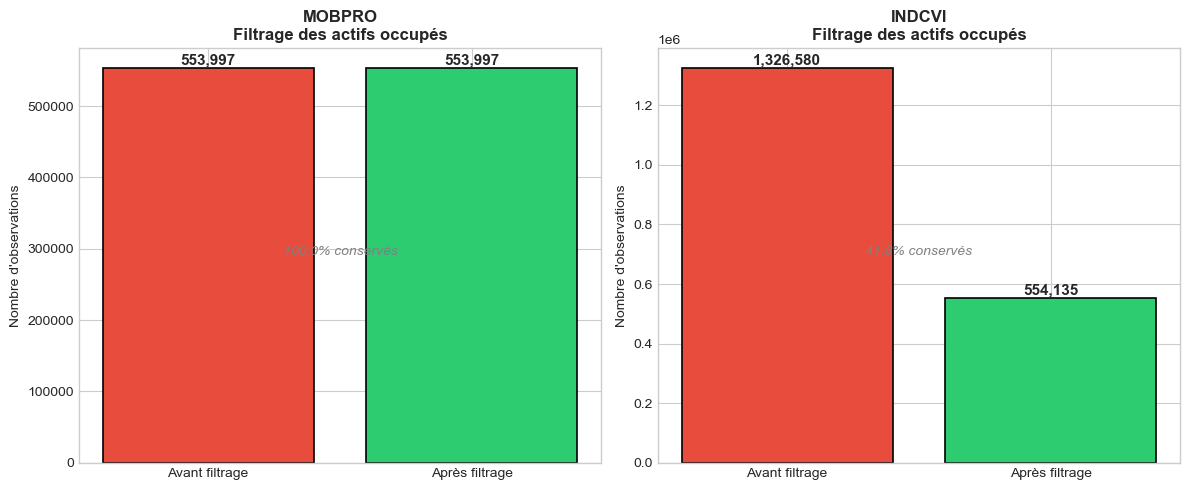


──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Distribution par département
──────────────────────────────────────────────────────────────────────────────────────────


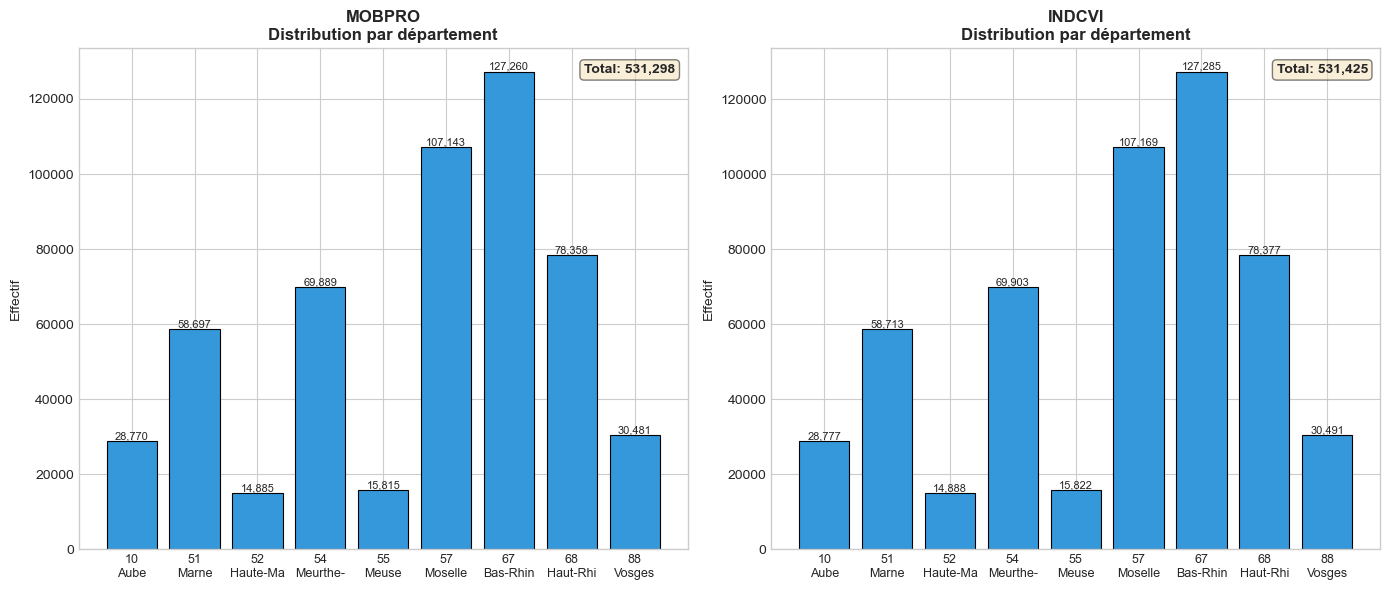


──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Validation : Overlap post-harmonisation
──────────────────────────────────────────────────────────────────────────────────────────


   Calcul overlap: 100%|██████████| 22/22 [00:09<00:00,  2.30it/s]


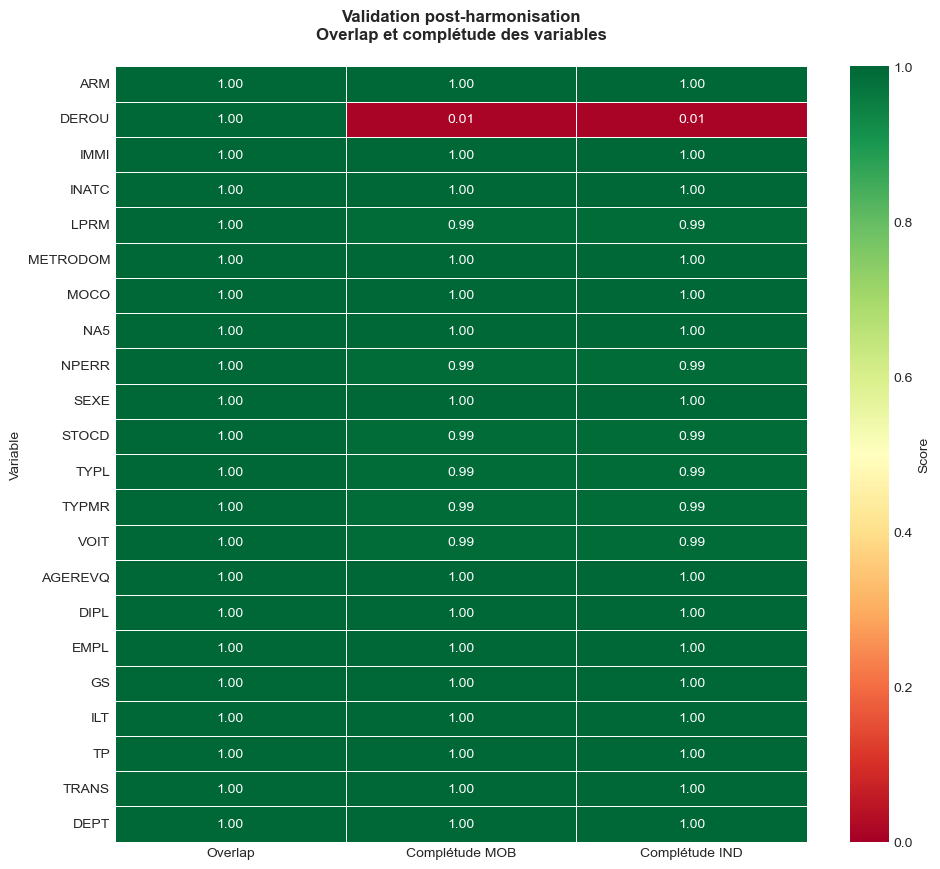


   📊 Résumé validation :
      ✅ Overlap ≥ 99%  : 22 variables
      ⚠️  Overlap 90-99% :  0 variables
      ❌ Overlap < 90%  :  0 variables

══════════════════════════════════════════════════════════════════════════════════════════
                                          EXPORTS                                         
══════════════════════════════════════════════════════════════════════════════════════════

   💾 Export MOBPRO...
      ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_MOBPRO_FINAL.csv

   💾 Export INDCVI...
      ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_INDCVI_FINAL.csv

   💾 Export rapport enrichi...
      ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/RAPPORT_HARMONISATION_V2.xlsx

══════════════════════════════════════════════════════════════════════════════════════════
                                      SYNTHÈSE FINALE                                     
═══════════════════════════════════════════════

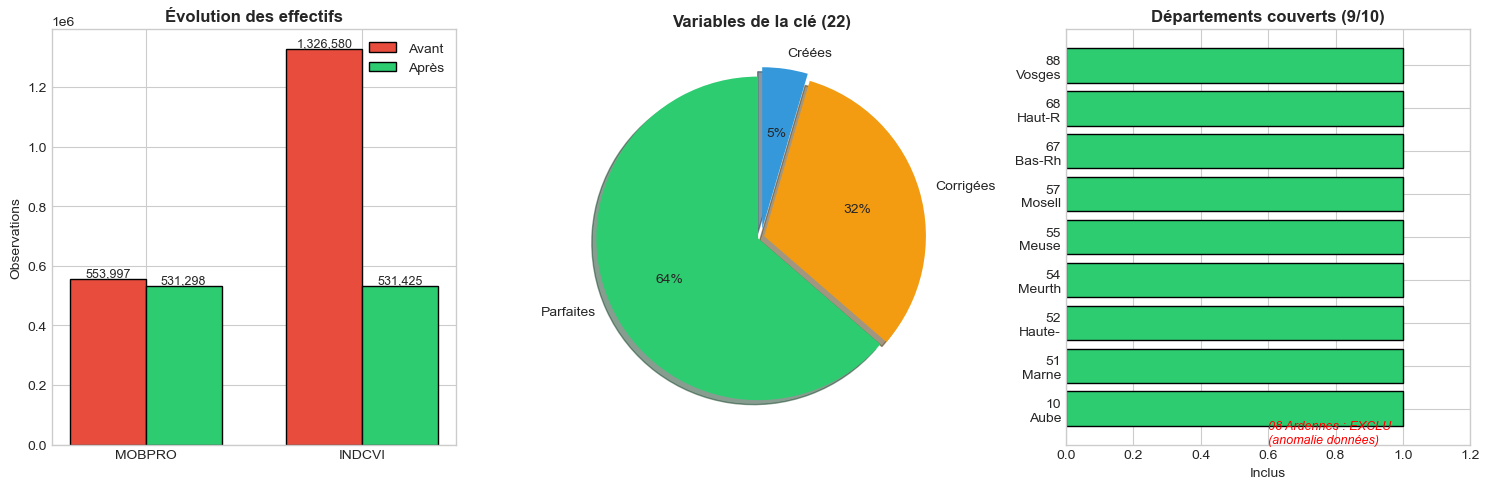


   🎯 RÉSULTATS :
      MOBPRO : 553,997 → 531,298 (95.9%)
      INDCVI : 1,326,580 → 531,425 (40.1%)
      Variables : 22
      Départements : 9

══════════════════════════════════════════════════════════════════════════════════════════
                            ✅ HARMONISATION TERMINÉE AVEC SUCCÈS                          
══════════════════════════════════════════════════════════════════════════════════════════


In [3]:
"""
╔══════════════════════════════════════════════════════════════════════════════╗
║       HARMONISATION COMPLÈTE DES BASES MOBPRO ET INDCVI - VERSION 2.0       ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Améliorations :                                                             ║
║  • Visuels : barplots distributions, heatmap validation                      ║
║  • Validation : vérification overlap post-harmonisation                      ║
║  • Rapport enrichi : statistiques complètes                                  ║
║  • Progress bars pour le suivi                                               ║
║  • Structure modulaire optimisée                                             ║
╠══════════════════════════════════════════════════════════════════════════════╣
║  Auteur : Mehdi Fehri                                                        ║
║  Version : 2.0                                                               ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PARAMÈTRES                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

PATH_MOBPRO = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/FD_MOBPRO_2022_GE.csv"
PATH_INDCVI = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/FD_INDCVI_2022_GE.csv"

OUT_DIR = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean")
OUT_MOBPRO = OUT_DIR / "BDD_MOBPRO_FINAL.csv"
OUT_INDCVI = OUT_DIR / "BDD_INDCVI_FINAL.csv"
OUT_RAPPORT = OUT_DIR / "RAPPORT_HARMONISATION_V2.xlsx"

OUT_DIR.mkdir(parents=True, exist_ok=True)

# Départements Grand Est (9 - sans Ardennes)
DEPT_GRAND_EST = ['10', '51', '52', '54', '55', '57', '67', '68', '88']
NOMS_DEPT = {
    '10': 'Aube', '51': 'Marne', '52': 'Haute-Marne', '54': 'Meurthe-et-Moselle',
    '55': 'Meuse', '57': 'Moselle', '67': 'Bas-Rhin', '68': 'Haut-Rhin', '88': 'Vosges'
}

# Variables
VARS_CLE = [
    'ARM', 'DEROU', 'IMMI', 'INATC', 'LPRM', 'METRODOM', 'MOCO', 'NA5', 
    'NPERR', 'SEXE', 'STOCD', 'TYPL', 'TYPMR', 'VOIT',
    'AGEREVQ', 'DIPL', 'EMPL', 'GS', 'ILT', 'TP', 'TRANS', 'DEPT'
]

VARS_NUMERIQUES = [
    'AGEREVQ', 'DIPL', 'EMPL', 'GS', 'ILT', 'TP', 'TRANS',
    'IMMI', 'INATC', 'LPRM', 'MOCO', 'NPERR', 'SEXE', 'STOCD', 'TYPL', 'TYPMR', 'VOIT'
]

TOKENS_NA = {
    "Z": pd.NA, "ZZ": pd.NA, "ZZZ": pd.NA, "ZZZZZZZZZ": pd.NA,
    "": pd.NA, " ": pd.NA, "nan": pd.NA, "NaN": pd.NA, "None": pd.NA
}


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS UTILITAIRES                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_header(titre, niveau=1):
    """Affiche un en-tête formaté."""
    largeur = 90
    if niveau == 1:
        print("\n" + "═" * largeur)
        print(f"  {titre}".center(largeur))
        print("═" * largeur)
    else:
        print(f"\n{'─' * largeur}")
        print(f"  ▶ {titre}")
        print("─" * largeur)


def standardize_string(series):
    """Convertit une série en string standardisé."""
    result = series.astype("string").str.strip()
    return result.replace(TOKENS_NA)


def standardize_numeric(series):
    """Convertit une série numérique en string sans padding."""
    result = series.astype("string").str.strip().replace(TOKENS_NA)
    mask = result.notna()
    if mask.any():
        try:
            numeric = pd.to_numeric(result[mask], errors='coerce')
            result.loc[mask] = numeric.astype('Int64').astype('string')
        except:
            pass
    return result


def harmonize_agerevq(series):
    """Harmonise AGEREVQ : filtrer sur [15-95]."""
    numeric = pd.to_numeric(series, errors='coerce')
    numeric[(numeric < 15) | (numeric > 95)] = pd.NA
    return numeric.astype('Int64').astype('string')


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              VISUALISATIONS                                  ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def plot_filtrage_actifs(before_mob, after_mob, before_ind, after_ind):
    """Visualise l'impact du filtrage des actifs."""
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # MOBPRO
    ax = axes[0]
    data = [before_mob, after_mob]
    bars = ax.bar(['Avant filtrage', 'Après filtrage'], data, 
                  color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.2)
    ax.set_title('MOBPRO\nFiltrage des actifs occupés', fontweight='bold', fontsize=12)
    ax.set_ylabel('Nombre d\'observations')
    
    # Annotations
    for bar, val in zip(bars, data):
        ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    pct_mob = 100 * after_mob / before_mob
    ax.annotate(f'{pct_mob:.1f}% conservés', xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', fontsize=10, style='italic', color='gray')
    
    # INDCVI
    ax = axes[1]
    data = [before_ind, after_ind]
    bars = ax.bar(['Avant filtrage', 'Après filtrage'], data,
                  color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.2)
    ax.set_title('INDCVI\nFiltrage des actifs occupés', fontweight='bold', fontsize=12)
    ax.set_ylabel('Nombre d\'observations')
    
    for bar, val in zip(bars, data):
        ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    pct_ind = 100 * after_ind / before_ind
    ax.annotate(f'{pct_ind:.1f}% conservés', xy=(0.5, 0.5), xycoords='axes fraction',
                ha='center', fontsize=10, style='italic', color='gray')
    
    plt.tight_layout()
    plt.show()


def plot_distribution_dept(mob, ind):
    """Visualise la distribution des départements dans les deux bases."""
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    for idx, (nom, df) in enumerate([('MOBPRO', mob), ('INDCVI', ind)]):
        ax = axes[idx]
        
        if 'DEPT' not in df.columns:
            continue
        
        # Compter par département
        counts = df['DEPT'].value_counts().reindex(DEPT_GRAND_EST, fill_value=0)
        
        # Couleurs
        colors = ['#3498db' if d in DEPT_GRAND_EST else '#e74c3c' for d in counts.index]
        
        # Barplot
        bars = ax.bar(range(len(counts)), counts.values, color=colors, 
                      edgecolor='black', linewidth=0.8)
        
        # Labels
        labels = [f"{d}\n{NOMS_DEPT.get(d, '?')[:8]}" for d in counts.index]
        ax.set_xticks(range(len(counts)))
        ax.set_xticklabels(labels, rotation=0, fontsize=9)
        
        ax.set_title(f'{nom}\nDistribution par département', fontweight='bold', fontsize=12)
        ax.set_ylabel('Effectif')
        
        # Annotations
        for bar, val in zip(bars, counts.values):
            if val > 0:
                ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                            ha='center', va='bottom', fontsize=8, rotation=0)
        
        # Total
        ax.annotate(f'Total: {counts.sum():,}', xy=(0.98, 0.95), xycoords='axes fraction',
                    ha='right', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()


def plot_validation_overlap(mob, ind, vars_cle):
    """Heatmap de validation : overlap des modalités après harmonisation."""
    
    print_header("Validation : Overlap post-harmonisation", 2)
    
    results = []
    
    for var in tqdm(vars_cle, desc="   Calcul overlap"):
        if var not in mob.columns or var not in ind.columns:
            continue
        
        # Modalités
        vals_mob = set(mob[var].dropna().astype(str).unique())
        vals_ind = set(ind[var].dropna().astype(str).unique())
        
        n_common = len(vals_mob & vals_ind)
        n_union = len(vals_mob | vals_ind)
        overlap = n_common / n_union if n_union > 0 else 0
        
        # Complétude
        compl_mob = 1 - mob[var].isna().mean()
        compl_ind = 1 - ind[var].isna().mean()
        
        results.append({
            'Variable': var,
            'Overlap': overlap,
            'Complétude MOB': compl_mob,
            'Complétude IND': compl_ind,
            'Modalités communes': n_common,
            'Modalités totales': n_union
        })
    
    df_valid = pd.DataFrame(results).set_index('Variable')
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(10, max(8, len(df_valid) * 0.4)))
    
    heatmap_data = df_valid[['Overlap', 'Complétude MOB', 'Complétude IND']]
    
    sns.heatmap(heatmap_data.sort_values('Overlap', ascending=True), 
                annot=True, fmt='.2f', cmap='RdYlGn',
                vmin=0, vmax=1, ax=ax, linewidths=0.5,
                cbar_kws={'label': 'Score'})
    
    ax.set_title('Validation post-harmonisation\nOverlap et complétude des variables', 
                 fontweight='bold', fontsize=12, pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Résumé console
    n_perfect = (df_valid['Overlap'] >= 0.99).sum()
    n_good = ((df_valid['Overlap'] >= 0.90) & (df_valid['Overlap'] < 0.99)).sum()
    n_warning = (df_valid['Overlap'] < 0.90).sum()
    
    print(f"\n   📊 Résumé validation :")
    print(f"      ✅ Overlap ≥ 99%  : {n_perfect:>2} variables")
    print(f"      ⚠️  Overlap 90-99% : {n_good:>2} variables")
    print(f"      ❌ Overlap < 90%  : {n_warning:>2} variables")
    
    if n_warning > 0:
        print(f"\n   ⚠️  Variables à vérifier :")
        for var in df_valid[df_valid['Overlap'] < 0.90].index:
            ov = df_valid.loc[var, 'Overlap']
            print(f"      • {var}: {ov:.1%}")
    
    return df_valid


def plot_synthese_finale(stats):
    """Graphique de synthèse finale."""
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Évolution effectifs
    ax = axes[0]
    x = ['MOBPRO', 'INDCVI']
    avant = [stats['mob_initial'], stats['ind_initial']]
    apres = [stats['mob_final'], stats['ind_final']]
    
    x_pos = np.arange(len(x))
    width = 0.35
    
    bars1 = ax.bar(x_pos - width/2, avant, width, label='Avant', color='#e74c3c', edgecolor='black')
    bars2 = ax.bar(x_pos + width/2, apres, width, label='Après', color='#2ecc71', edgecolor='black')
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x)
    ax.set_ylabel('Observations')
    ax.set_title('Évolution des effectifs', fontweight='bold')
    ax.legend()
    
    for bars in [bars1, bars2]:
        for bar in bars:
            ax.annotate(f'{int(bar.get_height()):,}', 
                        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=9)
    
    # 2. Variables par catégorie
    ax = axes[1]
    categories = ['Parfaites', 'Corrigées', 'Créées']
    values = [14, 7, 1]
    colors = ['#2ecc71', '#f39c12', '#3498db']
    
    wedges, texts, autotexts = ax.pie(values, labels=categories, autopct='%1.0f%%',
                                       colors=colors, explode=(0.02, 0.02, 0.05),
                                       shadow=True, startangle=90)
    ax.set_title(f'Variables de la clé ({sum(values)})', fontweight='bold')
    
    # 3. Couverture géographique
    ax = axes[2]
    dept_labels = [f"{d}\n{NOMS_DEPT[d][:6]}" for d in DEPT_GRAND_EST]
    ax.barh(dept_labels, [1]*9, color='#2ecc71', edgecolor='black')
    ax.set_xlim(0, 1.2)
    ax.set_title('Départements couverts (9/10)', fontweight='bold')
    ax.set_xlabel('Inclus')
    
    # Ardennes exclu
    ax.annotate('08 Ardennes : EXCLU\n(anomalie données)', 
                xy=(0.6, -0.8), fontsize=9, style='italic', color='red')
    
    plt.tight_layout()
    plt.show()


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS D'HARMONISATION                            ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def harmoniser_mobpro(mob):
    """Harmonise la base MOBPRO."""
    
    print_header("HARMONISATION MOBPRO", 1)
    
    stats = {'initial': len(mob)}
    df = mob.copy()
    
    # ── Étape 1 : Filtrage actifs ──
    print_header("Filtrage des actifs (STAT ∈ {10, 21, 22, 23})", 2)
    
    if 'STAT' in df.columns:
        df = df[df['STAT'].isin([10, 21, 22, 23])].copy()
        print(f"   {stats['initial']:,} → {len(df):,} observations")
    
    stats['after_actifs'] = len(df)
    
    # ── Étape 2 : Création DEPT ──
    print_header("Création DEPT depuis COMMUNE", 2)
    
    if 'COMMUNE' in df.columns:
        commune = df['COMMUNE'].astype("string").str.strip()
        df['DEPT'] = commune.str[:2].str.zfill(2)
        print(f"   ✅ DEPT créé pour {df['DEPT'].notna().sum():,} observations")
    
    # ── Étape 3 : Filtrage géographique ──
    print_header("Filtrage géographique (9 départements)", 2)
    
    before_geo = len(df)
    df = df[df['DEPT'].isin(DEPT_GRAND_EST)].copy()
    print(f"   {before_geo:,} → {len(df):,} observations")
    print(f"   Exclus : {before_geo - len(df):,} ({100*(before_geo - len(df))/before_geo:.1f}%)")
    
    stats['after_geo'] = len(df)
    
    # ── Étape 4 : Standardisation variables ──
    print_header("Standardisation des variables", 2)
    
    for var in tqdm(VARS_CLE, desc="   Harmonisation"):
        if var not in df.columns:
            continue
        
        if var == 'AGEREVQ':
            df[var] = harmonize_agerevq(df[var])
        elif var in VARS_NUMERIQUES:
            df[var] = standardize_numeric(df[var])
        else:
            df[var] = standardize_string(df[var])
    
    print(f"   ✅ {len([v for v in VARS_CLE if v in df.columns])} variables harmonisées")
    
    stats['final'] = len(df)
    
    return df, stats


def harmoniser_indcvi(ind):
    """Harmonise la base INDCVI."""
    
    print_header("HARMONISATION INDCVI", 1)
    
    stats = {'initial': len(ind)}
    df = ind.copy()
    
    # ── Étape 1 : Filtrage actifs ──
    print_header("Filtrage des actifs (STATR ∈ {'1', '2'})", 2)
    
    if 'STATR' in df.columns:
        statr = df['STATR'].astype("string").str.strip()
        df = df[statr.isin(['1', '2'])].copy()
        print(f"   {stats['initial']:,} → {len(df):,} observations")
    
    stats['after_actifs'] = len(df)
    
    # ── Étape 2 : Harmonisation DEPT ──
    print_header("Harmonisation DEPT", 2)
    
    if 'DEPT' in df.columns:
        df['DEPT'] = standardize_numeric(df['DEPT'])
        mask = df['DEPT'].notna()
        df.loc[mask, 'DEPT'] = df.loc[mask, 'DEPT'].str.zfill(2)
        print(f"   ✅ DEPT standardisé pour {df['DEPT'].notna().sum():,} observations")
    
    # ── Étape 3 : Filtrage géographique ──
    print_header("Filtrage géographique (9 départements)", 2)
    
    before_geo = len(df)
    df = df[df['DEPT'].isin(DEPT_GRAND_EST)].copy()
    print(f"   {before_geo:,} → {len(df):,} observations")
    print(f"   Exclus : {before_geo - len(df):,} ({100*(before_geo - len(df))/before_geo:.1f}%)")
    
    stats['after_geo'] = len(df)
    
    # ── Étape 4 : Standardisation variables ──
    print_header("Standardisation des variables", 2)
    
    for var in tqdm(VARS_CLE, desc="   Harmonisation"):
        if var not in df.columns:
            continue
        
        if var == 'AGEREVQ':
            df[var] = harmonize_agerevq(df[var])
        elif var in VARS_NUMERIQUES:
            df[var] = standardize_numeric(df[var])
        else:
            df[var] = standardize_string(df[var])
    
    print(f"   ✅ {len([v for v in VARS_CLE if v in df.columns])} variables harmonisées")
    
    stats['final'] = len(df)
    
    return df, stats


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PIPELINE PRINCIPAL                              ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def main():
    """Pipeline principal d'harmonisation avec visuels."""
    
    print("\n")
    print("╔" + "═" * 88 + "╗")
    print("║" + "HARMONISATION COMPLÈTE MOBPRO × INDCVI - VERSION 2.0".center(88) + "║")
    print("║" + "Avec visualisations et validation".center(88) + "║")
    print("╚" + "═" * 88 + "╝")
    
    # ══════════════════════════════════════════════════════════════════════════
    # CHARGEMENT
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("CHARGEMENT DES DONNÉES", 1)
    
    print(f"\n   📂 Chargement MOBPRO...")
    mob_raw = pd.read_csv(PATH_MOBPRO, sep=";", low_memory=False)
    print(f"      ✅ {len(mob_raw):,} lignes × {len(mob_raw.columns)} colonnes")
    
    print(f"\n   📂 Chargement INDCVI...")
    ind_raw = pd.read_csv(PATH_INDCVI, sep=";", low_memory=False)
    print(f"      ✅ {len(ind_raw):,} lignes × {len(ind_raw.columns)} colonnes")
    
    # ══════════════════════════════════════════════════════════════════════════
    # HARMONISATION
    # ══════════════════════════════════════════════════════════════════════════
    
    mob_clean, stats_mob = harmoniser_mobpro(mob_raw)
    ind_clean, stats_ind = harmoniser_indcvi(ind_raw)
    
    # ══════════════════════════════════════════════════════════════════════════
    # VISUALISATIONS
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("VISUALISATIONS", 1)
    
    # 1. Impact filtrage actifs
    print_header("Impact du filtrage des actifs", 2)
    plot_filtrage_actifs(
        stats_mob['initial'], stats_mob['after_actifs'],
        stats_ind['initial'], stats_ind['after_actifs']
    )
    
    # 2. Distribution départements
    print_header("Distribution par département", 2)
    plot_distribution_dept(mob_clean, ind_clean)
    
    # 3. Validation overlap
    df_validation = plot_validation_overlap(mob_clean, ind_clean, VARS_CLE)
    
    # ══════════════════════════════════════════════════════════════════════════
    # EXPORTS
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("EXPORTS", 1)
    
    print(f"\n   💾 Export MOBPRO...")
    mob_clean.to_csv(OUT_MOBPRO, index=False, sep=";")
    print(f"      ✅ {OUT_MOBPRO}")
    
    print(f"\n   💾 Export INDCVI...")
    ind_clean.to_csv(OUT_INDCVI, index=False, sep=";")
    print(f"      ✅ {OUT_INDCVI}")
    
    # Rapport Excel enrichi
    print(f"\n   💾 Export rapport enrichi...")
    
    with pd.ExcelWriter(OUT_RAPPORT, engine='openpyxl') as writer:
        
        # Synthèse
        synthese = pd.DataFrame([
            {'Métrique': 'Date', 'Valeur': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M")},
            {'Métrique': 'Version', 'Valeur': '2.0 - Avec visuels'},
            {'Métrique': '', 'Valeur': ''},
            {'Métrique': 'MOBPRO initial', 'Valeur': f"{stats_mob['initial']:,}"},
            {'Métrique': 'MOBPRO après filtrage actifs', 'Valeur': f"{stats_mob['after_actifs']:,}"},
            {'Métrique': 'MOBPRO après filtrage géo', 'Valeur': f"{stats_mob['after_geo']:,}"},
            {'Métrique': 'MOBPRO final', 'Valeur': f"{stats_mob['final']:,}"},
            {'Métrique': '', 'Valeur': ''},
            {'Métrique': 'INDCVI initial', 'Valeur': f"{stats_ind['initial']:,}"},
            {'Métrique': 'INDCVI après filtrage actifs', 'Valeur': f"{stats_ind['after_actifs']:,}"},
            {'Métrique': 'INDCVI après filtrage géo', 'Valeur': f"{stats_ind['after_geo']:,}"},
            {'Métrique': 'INDCVI final', 'Valeur': f"{stats_ind['final']:,}"},
            {'Métrique': '', 'Valeur': ''},
            {'Métrique': 'Variables clé', 'Valeur': len(VARS_CLE)},
            {'Métrique': 'Départements', 'Valeur': len(DEPT_GRAND_EST)},
        ])
        synthese.to_excel(writer, sheet_name='Synthese', index=False)
        
        # Validation
        df_validation.reset_index().to_excel(writer, sheet_name='Validation_Overlap', index=False)
        
        # Variables
        vars_df = pd.DataFrame([
            {'N°': i+1, 'Variable': var, 'Catégorie': 'Créée' if var == 'DEPT' else ('Corrigée' if var in ['AGEREVQ', 'DIPL', 'EMPL', 'GS', 'ILT', 'TP', 'TRANS'] else 'Base')}
            for i, var in enumerate(VARS_CLE)
        ])
        vars_df.to_excel(writer, sheet_name='Variables', index=False)
        
        # Départements
        dept_df = pd.DataFrame([
            {'Code': d, 'Nom': NOMS_DEPT[d], 
             'Effectif MOBPRO': (mob_clean['DEPT'] == d).sum(),
             'Effectif INDCVI': (ind_clean['DEPT'] == d).sum()}
            for d in DEPT_GRAND_EST
        ])
        dept_df.to_excel(writer, sheet_name='Departements', index=False)
    
    print(f"      ✅ {OUT_RAPPORT}")
    
    # ══════════════════════════════════════════════════════════════════════════
    # SYNTHÈSE FINALE
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("SYNTHÈSE FINALE", 1)
    
    stats_finales = {
        'mob_initial': stats_mob['initial'],
        'mob_final': stats_mob['final'],
        'ind_initial': stats_ind['initial'],
        'ind_final': stats_ind['final']
    }
    
    plot_synthese_finale(stats_finales)
    
    print(f"\n   🎯 RÉSULTATS :")
    print(f"      MOBPRO : {stats_mob['initial']:,} → {stats_mob['final']:,} ({100*stats_mob['final']/stats_mob['initial']:.1f}%)")
    print(f"      INDCVI : {stats_ind['initial']:,} → {stats_ind['final']:,} ({100*stats_ind['final']/stats_ind['initial']:.1f}%)")
    print(f"      Variables : {len(VARS_CLE)}")
    print(f"      Départements : {len(DEPT_GRAND_EST)}")
    
    print("\n" + "═" * 90)
    print("  ✅ HARMONISATION TERMINÉE AVEC SUCCÈS".center(90))
    print("═" * 90)
    
    return mob_clean, ind_clean, df_validation


# ══════════════════════════════════════════════════════════════════════════════
# EXÉCUTION
# ══════════════════════════════════════════════════════════════════════════════

if __name__ == "__main__":
    mob, ind, validation = main()

# De l'Harmonisation à l'Appariement : Reconstruction des Variables Géographiques

---

## Transition : Bases Harmonisées, Prêtes pour l'Appariement ?

À l'issue de l'étape d'harmonisation, les deux bases MOBPRO et INDCVI présentent désormais :
- Des **types de données identiques** (string standardisé)
- Des **formats homogènes** (padding corrigé, tokens NA traités)
- Une **population comparable** (actifs occupés des 9 départements du Grand Est)
- Une **clé de 22 variables communes** parfaitement compatibles

Cependant, une difficulté majeure subsiste : **l'absence d'identifiant individuel commun** entre les deux bases. Contrairement aux fichiers administratifs classiques disposant d'un numéro unique (NIR, identifiant fiscal...), les fichiers du recensement INSEE ne permettent pas de relier directement un individu MOBPRO à son équivalent INDCVI.

Cette contrainte impose une stratégie d'**appariement déterministe sur clé composite**, dont l'efficacité repose sur la granularité géographique des variables disponibles.

---

## Le Défi Géographique : Deux Bases, Deux Niveaux de Précision

L'examen des variables géographiques révèle une **asymétrie structurelle** entre les deux bases :

| Variable    | MOBPRO                     | INDCVI                           |
|-------------|----------------------------|----------------------------------|
| `COMMUNE`   | ✅ Présent (5 caractères)  | ❌ Absent                        |
| `IRIS`      | ❌ Absent                  | ⚠️  Partiel (46% = `ZZZZZZZZZ`) |
| `CANTVILLE` | ❌ Absent                  | ✅ Présent                       |
| `DEPT`      | ✅ Créé depuis COMMUNE     | ✅ Présent                       |

Cette asymétrie pose deux problèmes :

1. **MOBPRO ne dispose pas de l'IRIS** : impossible d'exploiter directement la granularité infra-communale
2. **INDCVI ne dispose pas du code commune** : impossible d'apparier directement sur `COMMUNE`

Pour maximiser le pouvoir discriminant de la clé d'appariement, il est nécessaire de **reconstruire les variables géographiques manquantes** dans chaque base.

---

## Stratégie de Reconstruction : Fichiers Externes de l'INSEE

La reconstruction des variables géographiques s'appuie sur les **tables de correspondance officielles** du Code Officiel Géographique (COG) 2022, disponibles en téléchargement sur le site de l'INSEE.

### Architecture de Reconstruction

```
┌───────────────────────────────────────────────────────────────────────────────┐
│                       RECONSTRUCTION DES VARIABLES                            │
├───────────────────────────────────────────────────────────────────────────────┤
│                                                                               │
│   ┌───────────────────┐                           ┌───────────────────┐       │
│   │      MOBPRO       │                           │      INDCVI       │       │
│   │                   │                           │                   │       │
│   │  COMMUNE ✅       │                           │  IRIS ✅ (54%)    │       │
│   │  IRIS ❌          │                           │  COMMUNE ❌       │       │
│   │  CANTVILLE ❌     │                           │  CANTVILLE ✅     │       │
│   └─────────┬─────────┘                           └─────────┬─────────┘       │
│             │                                               │                 │
│             ▼                                               ▼                 │
│   ┌─────────────────────────┐               ┌─────────────────────────┐       │
│   │    Table COG 2022       │               │  Référentiel IRIS 2022  │       │
│   │  COMMUNE → CANTVILLE    │               │     IRIS → DEPCOM       │       │
│   └─────────────────────────┘               └─────────────────────────┘       │
│             │                                               │                 │
│             ▼                                               ▼                 │
│   ┌───────────────────┐                           ┌───────────────────┐       │
│   │      MOBPRO       │                           │      INDCVI       │       │
│   │     enrichi       │                           │      enrichi      │       │
│   │                   │                           │                   │       │
│   │  COMMUNE ✅       │                           │  IRIS ✅          │       │
│   │  CANTVILLE ✅     │                           │  DEPCOM ✅        │       │
│   └───────────────────┘                           └───────────────────┘       │
│                                                                               │
└───────────────────────────────────────────────────────────────────────────────┘
```

---

## Détail des Reconstructions

### 1. Reconstruction de `CANTVILLE` dans MOBPRO

**Objectif** : Permettre l'appariement de niveau 2 (IRIS non renseignés)

**Source** : Table de passage communes-cantons du COG 2022

**Opération** :

```
MOBPRO.COMMUNE  ───[ jointure ]───►  COG_2022.DEPCOM  ───►  COG_2022.CANTVILLE
```

**Justification** : 
- `CANTVILLE` (canton-ou-ville) est la variable géographique la plus fine disponible dans INDCVI pour les observations sans IRIS valide
- Sans cette reconstruction, 46% de la population INDCVI serait inappariable au niveau communal

### 2. Reconstruction de `DEPCOM` dans INDCVI

**Objectif** : Permettre l'appariement de niveau 1 (IRIS valides)

**Source** : Référentiel géographique IRIS 2022

**Opération** :

```
INDCVI.IRIS  ───[ extraction ]───►  IRIS[:5]  =  DEPCOM
```

**Alternative** (si IRIS non exploitable) :

```
INDCVI.IRIS  ───[ jointure ]───►  REF_IRIS.CODE_IRIS  ───►  REF_IRIS.DEPCOM
```

**Justification** :
- Le code IRIS (9 caractères) contient le code commune dans ses 5 premiers caractères
- Cette reconstruction permet d'aligner INDCVI sur le niveau géographique de MOBPRO

---

## Fichiers Externes Requis

| Fichier                              | Source                   | Variables clés                  | Usage                        |
|--------------------------------------|--------------------------|---------------------------------|------------------------------|
| `table_passage_communes_cantons.csv` | INSEE - COG 2022         | `DEPCOM`, `CANTVILLE`           | COMMUNE → CANTVILLE (MOBPRO) |
| `reference_IRIS_geo2022.xlsx`        | INSEE - Référentiel IRIS | `CODE_IRIS`, `DEPCOM`, `LIBCOM` | IRIS → DEPCOM (INDCVI)       |

Ces fichiers sont téléchargeables sur [insee.fr](https://www.insee.fr/fr/information/2560452) (rubrique Code Officiel Géographique).

---

## Impact sur la Stratégie d'Appariement

Une fois les variables reconstruites, la stratégie d'appariement à deux niveaux devient opérationnelle :

| Niveau  | Population INDCVI        | Variable géographique  | Clé d'appariement      |
|---------|--------------------------|------------------------|------------------------|
| **1**   | IRIS ≠ `ZZZZZZZZZ` (54%) | `DEPCOM` (reconstruit) | DEPCOM + 22 variables  |
| **2**   | IRIS = `ZZZZZZZZZ` (46%) | `CANTVILLE`            | CANTVILLE + 22 vars    |

Cette approche maximise la couverture de l'appariement tout en préservant la rigueur méthodologique d'un matching déterministe strict.

---

## Synthèse : Chaîne de Traitement Complète

```
┌───────────────────────────────────────────────────────────────────────────────┐
│                            PIPELINE COMPLET                                   │
├───────────────────────────────────────────────────────────────────────────────┤
│                                                                               │
│   ÉTAPE 1 : EXPLORATION & DIAGNOSTIC                                          │
│       └──► Identification des variables communes                              │
│       └──► Détection des problèmes (types, padding, tokens)                   │
│                                                                               │
│   ÉTAPE 2 : HARMONISATION                                                     │
│       └──► Standardisation des 22 variables                                   │
│       └──► Filtrage actifs + géographie                                       │
│                                                                               │
│   ÉTAPE 3 : RECONSTRUCTION GÉOGRAPHIQUE              ◄── Fichiers externes    │
│       └──► MOBPRO : COMMUNE → CANTVILLE                                       │
│       └──► INDCVI : IRIS → DEPCOM                                             │
│                                                                               │
│   ÉTAPE 4 : APPARIEMENT DÉTERMINISTE                                          │
│       └──► Niveau 1 : Clé DEPCOM + 22 vars                                    │
│       └──► Niveau 2 : Clé CANTVILLE + 22 vars                                 │
│                                                                               │
│   ÉTAPE 5 : BASE FINALE APPARIÉE                                              │
│       └──► Fusion MOBPRO enrichi × INDCVI enrichi                             │
│                                                                               │
└───────────────────────────────────────────────────────────────────────────────┘
```

---

## Prochaine Étape

La section suivante détaille la **stratégie d'appariement déterministe à deux niveaux**, incluant :
- La construction des clés composites
- Les règles d'exclusion des collisions
- Les métriques de validation de l'appariement

# Stratégie d'Appariement MOBPRO × INDCVI

---

## 1. Problématique : Absence d'Identifiant Unique

Les bases MOBPRO et INDCVI ne partagent **aucun identifiant individuel commun**. L'appariement classique par clé unique (NIR, identifiant fiscal...) est donc impossible.

| Base       | Identifiants disponibles             | Limitation                         |
|------------|--------------------------------------|------------------------------------|
| **MOBPRO** | Code commune uniquement              | Pas de numéro de ménage, pas d'ID  |
| **INDCVI** | IRIS, Canton, Num. ménage (`NUMMI`)  | `NUMMI` absent de MOBPRO           |

Cette contrainte impose le recours à une méthode d'appariement sur **clé composite**.

---

## 2. Options Méthodologiques

### Option A : Appariement Probabiliste — NON RETENUE

**Principe** : Apparier les individus sur la base de caractéristiques communes, en acceptant une marge d'incertitude.

| Avantages                                    | Inconvénients                             |
|----------------------------------------------|-------------------------------------------|
| Maximise le taux d'appariement               | Appariement **approximatif**              |
| Permet d'enrichir MOBPRO                     | Risque de biais si cellules hétérogènes   |
| Techniques bien documentées (StatMatch...)   | Pas de garantie d'appariement individuel  |

**Raison du rejet** : L'objectif de l'étude nécessite une identification **individuelle** des travailleurs transfrontaliers, incompatible avec un appariement probabiliste.

---

### Option B : Appariement Déterministe Strict — RETENUE

**Principe** : Apparier **uniquement** les individus ayant une combinaison de caractéristiques **unique** dans les deux bases simultanément.

**Règle fondamentale** :

```
Appariement validé  ⟺  (Clé unique dans MOBPRO) ∩ (Clé unique dans INDCVI)
```

| Avantages                                    | Inconvénients                             |
|----------------------------------------------|-------------------------------------------|
| Appariement **individuel** sans ambiguïté    | Taux de couverture potentiellement faible |
| Rigueur méthodologique maximale              | Exclusion des profils fréquents           |
| Traçabilité complète                         | Biais de sélection possible               |

---

## 3. Architecture à Deux Niveaux

La stratégie exploite la **granularité géographique variable** de la population INDCVI pour maximiser le taux d'appariement :

```
┌───────────────────────────────────────────────────────────────────────────────┐
│                         STRATÉGIE D'APPARIEMENT                               │
├───────────────────────────────────────────────────────────────────────────────┤
│                                                                               │
│                          INDCVI (477,213 actifs)                              │
│                                                                               │
│       ┌───────────────────────────┐       ┌───────────────────────────┐       │
│       │    IRIS ≠ ZZZZZZZZZ       │       │    IRIS = ZZZZZZZZZ       │       │
│       │     (255,951 actifs)      │       │     (221,262 actifs)      │       │
│       │         53.6%             │       │         46.4%             │       │
│       │                           │       │                           │       │
│       │   Géocodage PRÉCIS        │       │   Géocodage FLOU          │       │
│       │   → Code commune connu    │       │   → Canton uniquement     │       │
│       └─────────────┬─────────────┘       └─────────────┬─────────────┘       │
│                     │                                   │                     │
│                     ▼                                   ▼                     │
│       ┌───────────────────────────┐       ┌───────────────────────────┐       │
│       │        NIVEAU 1           │       │        NIVEAU 2           │       │
│       │                           │       │                           │       │
│       │   Clé = DEPCOM + 22 vars  │       │ Clé = CANTVILLE + 22 vars │       │
│       │                           │       │                           │       │
│       │   Pouvoir discriminant :  │       │   Pouvoir discriminant :  │       │
│       │        TRÈS ÉLEVÉ         │       │          MOYEN            │       │
│       │   (~4,600 communes GE)    │       │    (144 cantons GE)       │       │
│       └───────────────────────────┘       └───────────────────────────┘       │
│                                                                               │
└───────────────────────────────────────────────────────────────────────────────┘
```

---

### Niveau 1 : Appariement Communal (IRIS valides)

**Population cible** : 53.6% d'INDCVI (observations avec IRIS renseigné)

**Clé d'appariement** (23 variables) :

```
DEPCOM + SEXE + AGEREVQ + DIPL + EMPL + GS + IMMI + INATC + LPRM + 
MOCO + NPERR + TYPMR + VOIT + STOCD + TP + TRANS + TYPL + NA5 + 
REGION + METRODOM + ARM + DEROU + IPONDI
```

**Pouvoir discriminant** : Très élevé — le code commune (5 caractères) distingue environ 4,600 entités géographiques dans le Grand Est.

---

### Niveau 2 : Appariement Cantonal (IRIS non valides)

**Population cible** : 46.4% d'INDCVI (observations avec `IRIS = ZZZZZZZZZ`)

**Clé d'appariement** (23 variables) :

```
CANTVILLE + SEXE + AGEREVQ + DIPL + EMPL + GS + IMMI + INATC + LPRM + 
MOCO + NPERR + TYPMR + VOIT + STOCD + TP + TRANS + TYPL + NA5 + 
REGION + METRODOM + ARM + DEROU + IPONDI
```

**Pouvoir discriminant** : Moyen — le canton (4 caractères) ne distingue que 144 entités dans le Grand Est, mais les 22 autres variables compensent cette granularité plus faible.

---

## 4. Règles d'Appariement Strict

### Principe : Unicité Bilatérale

Une observation n'est appariée que si sa clé est **unique dans les deux bases** :

| Situation                                          | Décision                 |
|----------------------------------------------------|--------------------------|
| Clé unique dans MOBPRO **ET** unique dans INDCVI   | ✅ Appariement validé    |
| Clé en doublon dans MOBPRO                         | ❌ Exclusion (collision) |
| Clé en doublon dans INDCVI                         | ❌ Exclusion (collision) |
| Clé unique dans une base, absente de l'autre       | ❌ Non apparié           |

### Illustration des Cas

**Collision (exclusion)** :

```
MOBPRO :  Individu A  →  Clé = "67482|1|50|13|16|5|..."
MOBPRO :  Individu B  →  Clé = "67482|1|50|13|16|5|..."  (identique)

→ Même clé = COLLISION → A et B sont EXCLUS
```

**Appariement réussi** :

```
MOBPRO :  Individu C  →  Clé = "57463|2|35|15|11|3|..."  (unique)
INDCVI :  Individu Z  →  Clé = "57463|2|35|15|11|3|..."  (unique)

→ Clés identiques et uniques → Appariement C ↔ Z VALIDÉ
```

---

## 5. Justification Méthodologique

### Pourquoi l'Approche Déterministe ?

| Critère                       | Justification ------------------------------------------------------------|
| **Rigueur scientifique**      | Appariement sans approximation, traçabilité complète

| **Absence de biais**          | Pas de fusion many-to-one, pas d'agrégation

| **Exploitation géographique** | Niveau 1 (DEPCOM) + Niveau 2 (CANTVILLE) = couverture max
| **Validation externe**        | Conforme aux recommandations de la direction de recherche

### Pourquoi Deux Niveaux ?

La stratégie hybride permet de :

1. **Maximiser la précision** au Niveau 1 (code commune = granularité fine)
2. **Récupérer les cas** non géocodables au Niveau 2 (canton = compromis acceptable)
3. **Limiter les collisions** grâce aux 22 variables supplémentaires

---

## 6. Limites et Biais Potentiels

### 6.1 Biais de Sélection

**Mécanisme** : Les individus aux profils **fréquents** ont une probabilité de collision plus élevée.

**Profil à risque** : Homme, 50 ans, CAP, salarié, ouvrier, commune peuplée

**Contrôle prévu** : Analyse comparative du profil sociodémographique entre appariés et exclus.

---

### 6.2 Perte de Précision Géographique (Niveau 2)

**Problème** : Un canton peut regrouper de 1 à 179 communes.

**Impact** : Pour 46% de l'échantillon, la localisation est connue au canton, non à la commune.

**Atténuation** :

- Après appariement, récupération du `DEPCOM` depuis MOBPRO
- Les 22 variables réduisent la probabilité de collision malgré la granularité plus faible

---

### 6.3 Couverture Géographique Incomplète

**Département exclu** : Ardennes (08) — 20,183 actifs (4.1% de la population)

**Cause** : Anomalie détectée lors de l'exploration (absence dans MOBPRO)

**Impact** : Analyse limitée à **9 départements** du Grand Est sur 10

---

## 7. Métriques de Suivi

L'algorithme d'appariement produira les indicateurs suivants :

| Métrique                       | Description                                 |
|--------------------------------|---------------------------------------------|
| Taux d'appariement global      | % d'observations MOBPRO appariées           |
| Taux d'appariement Niveau 1    | % parmi les IRIS valides                    |
| Taux d'appariement Niveau 2    | % parmi les IRIS non valides                |
| Taux de collision MOBPRO       | % de clés en doublon dans MOBPRO            |
| Taux de collision INDCVI       | % de clés en doublon dans INDCVI            |
| Distribution des exclus        | Profil sociodémographique des non-appariés  |

**Objectif cible** : Taux de perte global < 20%

# Diagnostic Géographique : Préparation à la Reconstruction des Variables

---

## Objectif

Avant de reconstruire les variables géographiques nécessaires à l'appariement (`DEPCOM` et `CANTVILLE`), il est indispensable de **comprendre les formats existants** dans chaque source de données. Une reconstruction aveugle risquerait de produire des variables incompatibles, rendant l'appariement impossible.

Ce diagnostic vise à :
- Identifier les **formats exacts** des variables géographiques dans chaque base
- Vérifier la **compatibilité** entre les sources (MOBPRO, INDCVI, COG)
- Déterminer les **transformations nécessaires** pour aligner les formats
- Estimer les **taux de couverture** attendus après reconstruction

---

## Contenu du Diagnostic

Le script effectue les analyses suivantes :

1. **Analyse IRIS** : format dans INDCVI, proportion de valeurs manquantes (`ZZZZZZZZZ`), validation contre le référentiel officiel

2. **Extraction DEPCOM** : vérification que `IRIS[:5]` produit un code commune valide et compatible avec le COG

3. **Analyse CANTVILLE** : format cible dans INDCVI, comparaison avec la variable `CAN` du COG, identification de la règle de transformation

4. **Analyse COMMUNE** : format dans MOBPRO, taux de correspondance avec le COG pour anticiper les pertes à la jointure

5. **Recommandations** : stratégie de reconstruction optimale pour chaque variable

---

## Outputs

| Fichier                        | Contenu                                      |
|--------------------------------|----------------------------------------------|
| `DIAGNOSTIC_GEO_UNIFIE.xlsx`   | Rapport détaillé avec exemples par variable  |
| `diagnostic_geo_summary.png`   | Synthèse visuelle (3 graphiques)             |
| Console                        | Logs structurés et recommandations           |



╔════════════════════════════════════════════════════════════════════════════════════════╗
║                             DIAGNOSTIC GÉOGRAPHIQUE UNIFIÉ                             ║
║                   Préparation à la reconstruction DEPCOM & CANTVILLE                   ║
╚════════════════════════════════════════════════════════════════════════════════════════╝

══════════════════════════════════════════════════════════════════════════════════════════
                                   CHARGEMENT DES SOURCES                                 
══════════════════════════════════════════════════════════════════════════════════════════

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ MOBPRO (harmonisé)
──────────────────────────────────────────────────────────────────────────────────────────
   📂 /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_MOBPRO_FINAL.csv
   ✅ 50,000 lignes (échantillon)

──────────────────────────────────

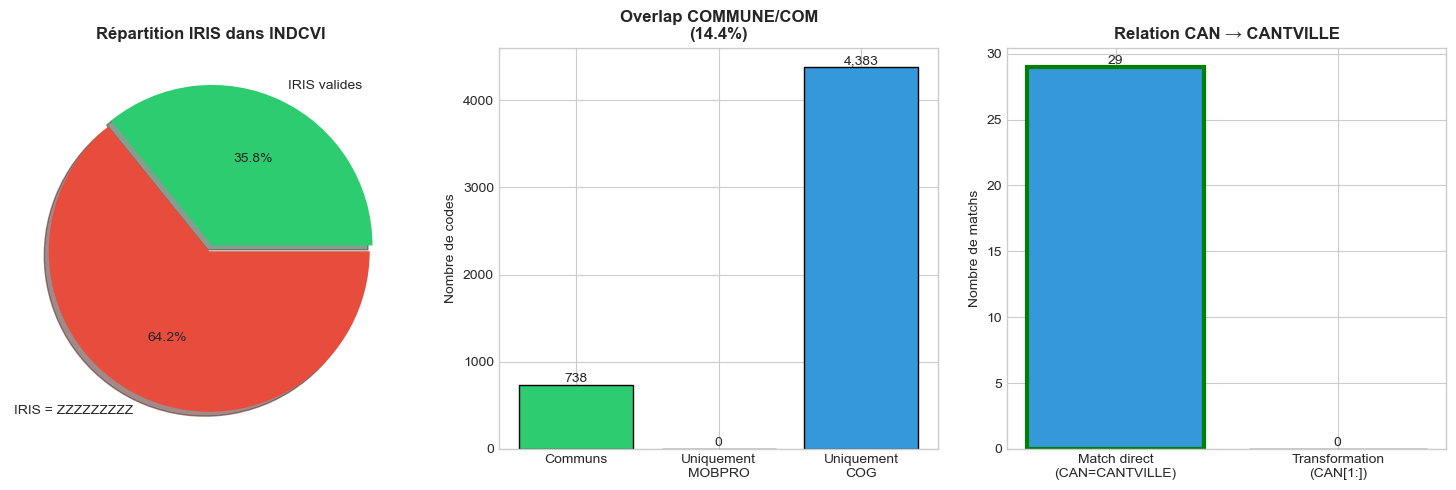


   📊 Graphique sauvegardé : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/diagnostic_geo_summary.png

══════════════════════════════════════════════════════════════════════════════════════════
                                SYNTHÈSE ET RECOMMANDATIONS                               
══════════════════════════════════════════════════════════════════════════════════════════

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ Reconstruction DEPCOM
──────────────────────────────────────────────────────────────────────────────────────────

   ┌─────────────────────────────────────────────────────────────────────────┐
   │  DANS INDCVI :                                                         │
   │     DEPCOM = IRIS[:5]                                                  │
   │     (5 premiers caractères de l'IRIS)                                  │
   │                                                                        │
   │  ⚠️ 

In [4]:
"""
╔══════════════════════════════════════════════════════════════════════════════╗
║          DIAGNOSTIC GÉOGRAPHIQUE UNIFIÉ - PRÉPARATION RECONSTRUCTION         ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  Ce script analyse les formats des variables géographiques dans :            ║
║  • MOBPRO (harmonisé) : COMMUNE                                              ║
║  • INDCVI (harmonisé) : IRIS, CANTVILLE                                      ║
║  • Référentiel IRIS : CODE_IRIS, DEPCOM                                      ║
║  • Tables COG : COM, CAN                                                     ║
║                                                                              ║
║  Objectif : Préparer la reconstruction de DEPCOM et CANTVILLE                ║
║                                                                              ║
║  Auteur : Mehdi Fehri                                                        ║
║  Date : Janvier 2025                                                         ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PARAMÈTRES                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

BASE_DIR = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean")

PATHS = {
    'mobpro': BASE_DIR / "BDD_MOBPRO_FINAL.csv",
    'indcvi': BASE_DIR / "BDD_INDCVI_FINAL.csv",
    'ref_iris': BASE_DIR / "reference_IRIS_geo2022.xlsx",
    'cog_commune': BASE_DIR / "cog_ensemble" / "commune_2022.csv",
    'cog_canton': BASE_DIR / "cog_ensemble" / "canton_2022.csv",
}

OUT_RAPPORT = BASE_DIR / "DIAGNOSTIC_GEO_UNIFIE.xlsx"

SAMPLE_SIZE = 50_000
GE_DEPTS = ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88']

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS UTILITAIRES                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_header(titre, niveau=1):
    """Affiche un en-tête formaté."""
    largeur = 90
    if niveau == 1:
        print("\n" + "═" * largeur)
        print(f"  {titre}".center(largeur))
        print("═" * largeur)
    elif niveau == 2:
        print(f"\n{'─' * largeur}")
        print(f"  ▶ {titre}")
        print("─" * largeur)
    else:
        print(f"\n  ● {titre}")


def analyze_variable(series, var_name, n_examples=10):
    """Analyse complète d'une variable géographique."""
    
    series = series.astype('string').str.strip()
    
    stats = {
        'variable': var_name,
        'n_total': len(series),
        'n_notna': series.notna().sum(),
        'n_na': series.isna().sum(),
        'pct_notna': 100 * series.notna().sum() / len(series) if len(series) > 0 else 0,
        'n_unique': series.nunique(),
    }
    
    # Analyse sur valeurs non-nulles
    valid = series[series.notna() & (series != '') & (series != 'nan')]
    
    if len(valid) > 0:
        # Longueurs
        lengths = valid.str.len()
        stats['len_min'] = int(lengths.min())
        stats['len_max'] = int(lengths.max())
        stats['len_mode'] = int(lengths.mode().iloc[0]) if len(lengths.mode()) > 0 else None
        stats['len_distribution'] = lengths.value_counts().sort_index().to_dict()
        
        # Patterns
        stats['starts_with_0'] = valid.str.startswith('0', na=False).sum()
        stats['pct_starts_0'] = 100 * stats['starts_with_0'] / len(valid)
        stats['only_digits'] = valid.str.isdigit().sum()
        stats['pct_digits'] = 100 * stats['only_digits'] / len(valid)
        
        # Tokens spéciaux
        stats['n_zzz'] = (valid == 'ZZZZZZZZZ').sum()
        stats['pct_zzz'] = 100 * stats['n_zzz'] / len(valid) if len(valid) > 0 else 0
        
        # Exemples
        stats['examples'] = valid.head(n_examples).tolist()
        stats['top_values'] = valid.value_counts().head(10).to_dict()
        
        # Set des valeurs uniques (pour comparaison)
        stats['unique_set'] = set(valid.unique())
    else:
        stats['len_min'] = None
        stats['len_max'] = None
        stats['len_mode'] = None
        stats['examples'] = []
        stats['unique_set'] = set()
    
    return stats


def print_variable_stats(stats):
    """Affiche les statistiques d'une variable."""
    
    print(f"\n   📊 STATISTIQUES : {stats['variable']}")
    print(f"      Total         : {stats['n_total']:,}")
    print(f"      Non-nulles    : {stats['n_notna']:,} ({stats['pct_notna']:.1f}%)")
    print(f"      Valeurs uniques: {stats['n_unique']:,}")
    
    if stats.get('len_mode'):
        print(f"\n   📏 LONGUEURS :")
        print(f"      Mode : {stats['len_mode']} caractères")
        print(f"      Min  : {stats['len_min']} | Max : {stats['len_max']}")
        
        if stats.get('len_distribution'):
            print(f"      Distribution :")
            for length, count in sorted(stats['len_distribution'].items()):
                pct = 100 * count / stats['n_notna']
                print(f"         {length} car. : {count:,} ({pct:.1f}%)")
    
    if stats.get('n_zzz', 0) > 0:
        print(f"\n   ⚠️  TOKENS SPÉCIAUX :")
        print(f"      ZZZZZZZZZ : {stats['n_zzz']:,} ({stats['pct_zzz']:.1f}%)")
    
    if stats.get('pct_starts_0', 0) > 0:
        print(f"\n   🔢 PATTERNS :")
        print(f"      Commence par '0' : {stats['starts_with_0']:,} ({stats['pct_starts_0']:.1f}%)")
        print(f"      Que des chiffres : {stats['only_digits']:,} ({stats['pct_digits']:.1f}%)")
    
    if stats.get('examples'):
        print(f"\n   📋 EXEMPLES ({len(stats['examples'])}) :")
        for i, ex in enumerate(stats['examples'][:5], 1):
            print(f"      {i}. '{ex}' ({len(ex)} car.)")


def compare_sets(set1, set2, name1, name2):
    """Compare deux ensembles de valeurs."""
    
    common = set1 & set2
    only1 = set1 - set2
    only2 = set2 - set1
    union = set1 | set2
    
    overlap = 100 * len(common) / len(union) if len(union) > 0 else 0
    
    return {
        'n_set1': len(set1),
        'n_set2': len(set2),
        'n_common': len(common),
        'n_only1': len(only1),
        'n_only2': len(only2),
        'overlap_pct': overlap,
        'common_sample': sorted(list(common))[:10],
        'only1_sample': sorted(list(only1))[:10],
        'only2_sample': sorted(list(only2))[:10],
    }


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                           CHARGEMENT DES DONNÉES                             ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def load_all_sources():
    """Charge toutes les sources de données."""
    
    print_header("CHARGEMENT DES SOURCES", 1)
    
    data = {}
    
    # ── MOBPRO ──
    print_header("MOBPRO (harmonisé)", 2)
    print(f"   📂 {PATHS['mobpro']}")
    mob = pd.read_csv(PATHS['mobpro'], sep=";", nrows=SAMPLE_SIZE, low_memory=False)
    print(f"   ✅ {len(mob):,} lignes (échantillon)")
    data['mobpro'] = mob
    
    # ── INDCVI ──
    print_header("INDCVI (harmonisé)", 2)
    print(f"   📂 {PATHS['indcvi']}")
    ind = pd.read_csv(PATHS['indcvi'], sep=";", nrows=SAMPLE_SIZE, low_memory=False)
    print(f"   ✅ {len(ind):,} lignes (échantillon)")
    data['indcvi'] = ind
    
    # ── Référentiel IRIS ──
    print_header("Référentiel IRIS", 2)
    print(f"   📂 {PATHS['ref_iris']}")
    ref_iris = pd.read_excel(PATHS['ref_iris'])
    print(f"   ✅ {len(ref_iris):,} lignes")
    print(f"   📋 Colonnes : {list(ref_iris.columns)}")
    data['ref_iris'] = ref_iris
    
    # ── COG Commune ──
    print_header("COG Commune 2022", 2)
    print(f"   📂 {PATHS['cog_commune']}")
    cog_com = pd.read_csv(PATHS['cog_commune'])
    print(f"   ✅ {len(cog_com):,} lignes (France entière)")
    
    # Filtrer Grand Est
    cog_com_ge = cog_com[cog_com['DEP'].isin(GE_DEPTS)].copy()
    print(f"   📍 Grand Est : {len(cog_com_ge):,} communes")
    print(f"   📋 Colonnes : {list(cog_com.columns)}")
    data['cog_commune'] = cog_com
    data['cog_commune_ge'] = cog_com_ge
    
    # ── COG Canton ──
    print_header("COG Canton 2022", 2)
    print(f"   📂 {PATHS['cog_canton']}")
    cog_can = pd.read_csv(PATHS['cog_canton'])
    print(f"   ✅ {len(cog_can):,} lignes (France entière)")
    
    # Filtrer Grand Est
    cog_can_ge = cog_can[cog_can['DEP'].isin(GE_DEPTS)].copy()
    print(f"   📍 Grand Est : {len(cog_can_ge):,} cantons")
    print(f"   📋 Colonnes : {list(cog_can.columns)}")
    data['cog_canton'] = cog_can
    data['cog_canton_ge'] = cog_can_ge
    
    return data


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         DIAGNOSTIC IRIS                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def diagnostic_iris(data):
    """Diagnostic complet de la variable IRIS."""
    
    print_header("DIAGNOSTIC IRIS", 1)
    
    results = {}
    
    # ── IRIS dans INDCVI ──
    print_header("IRIS dans INDCVI", 2)
    
    if 'IRIS' in data['indcvi'].columns:
        iris_ind = data['indcvi']['IRIS']
        stats_iris_ind = analyze_variable(iris_ind, 'IRIS_INDCVI')
        print_variable_stats(stats_iris_ind)
        results['iris_indcvi'] = stats_iris_ind
        
        # Séparer IRIS valides vs ZZZZZZZZZ
        iris_valid = iris_ind[iris_ind.astype(str) != 'ZZZZZZZZZ']
        iris_zzz = iris_ind[iris_ind.astype(str) == 'ZZZZZZZZZ']
        
        print(f"\n   📊 RÉPARTITION IRIS :")
        print(f"      IRIS valides    : {len(iris_valid):,} ({100*len(iris_valid)/len(iris_ind):.1f}%)")
        print(f"      IRIS ZZZZZZZZZ  : {len(iris_zzz):,} ({100*len(iris_zzz)/len(iris_ind):.1f}%)")
        
        # Extraction DEPCOM depuis IRIS valides
        if len(iris_valid) > 0:
            print_header("Extraction DEPCOM depuis IRIS[:5]", 3)
            depcom_from_iris = iris_valid.astype(str).str[:5]
            stats_depcom_iris = analyze_variable(depcom_from_iris, 'DEPCOM_from_IRIS')
            print_variable_stats(stats_depcom_iris)
            results['depcom_from_iris'] = stats_depcom_iris
    else:
        print("   ❌ Variable IRIS absente de INDCVI")
    
    # ── IRIS dans Référentiel ──
    print_header("IRIS dans Référentiel", 2)
    
    # Identifier la colonne IRIS
    col_iris_ref = None
    for col in data['ref_iris'].columns:
        if 'IRIS' in col.upper() and 'LIB' not in col.upper():
            col_iris_ref = col
            break
    
    if col_iris_ref:
        print(f"   📋 Colonne identifiée : {col_iris_ref}")
        iris_ref = data['ref_iris'][col_iris_ref]
        stats_iris_ref = analyze_variable(iris_ref, f'IRIS_REF ({col_iris_ref})')
        print_variable_stats(stats_iris_ref)
        results['iris_ref'] = stats_iris_ref
        results['col_iris_ref'] = col_iris_ref
        
        # Extraction DEPCOM depuis référentiel
        depcom_ref = iris_ref.astype(str).str[:5]
        stats_depcom_ref = analyze_variable(depcom_ref, 'DEPCOM_from_REF')
        print_variable_stats(stats_depcom_ref)
        results['depcom_from_ref'] = stats_depcom_ref
    else:
        print("   ❌ Colonne IRIS non trouvée dans référentiel")
    
    # ── Comparaison IRIS INDCVI vs Référentiel ──
    if 'iris_indcvi' in results and 'iris_ref' in results:
        print_header("Comparaison IRIS : INDCVI vs Référentiel", 2)
        
        # Exclure ZZZZZZZZZ pour la comparaison
        set_ind = results['iris_indcvi']['unique_set'] - {'ZZZZZZZZZ'}
        set_ref = results['iris_ref']['unique_set']
        
        comp = compare_sets(set_ind, set_ref, 'INDCVI', 'Référentiel')
        
        print(f"\n   📊 OVERLAP IRIS :")
        print(f"      IRIS uniques INDCVI : {comp['n_set1']:,}")
        print(f"      IRIS uniques Réf.   : {comp['n_set2']:,}")
        print(f"      IRIS communs        : {comp['n_common']:,}")
        print(f"      Overlap             : {comp['overlap_pct']:.1f}%")
        
        if comp['common_sample']:
            print(f"\n   ✅ Exemples IRIS communs :")
            for iris in comp['common_sample'][:5]:
                print(f"      {iris}")
        
        if comp['only1_sample']:
            print(f"\n   ⚠️  Exemples IRIS uniquement INDCVI :")
            for iris in comp['only1_sample'][:5]:
                print(f"      {iris}")
        
        results['iris_comparison'] = comp
    
    return results


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         DIAGNOSTIC CANTVILLE                                 ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def diagnostic_cantville(data):
    """Diagnostic complet de la variable CANTVILLE."""
    
    print_header("DIAGNOSTIC CANTVILLE", 1)
    
    results = {}
    
    # ── CANTVILLE dans INDCVI (format cible) ──
    print_header("CANTVILLE dans INDCVI (FORMAT CIBLE)", 2)
    
    if 'CANTVILLE' in data['indcvi'].columns:
        cantville_ind = data['indcvi']['CANTVILLE']
        stats_cant_ind = analyze_variable(cantville_ind, 'CANTVILLE_INDCVI')
        print_variable_stats(stats_cant_ind)
        results['cantville_indcvi'] = stats_cant_ind
    else:
        print("   ❌ Variable CANTVILLE absente de INDCVI")
    
    # ── CAN dans COG Commune ──
    print_header("CAN dans COG Commune (source pour MOBPRO)", 2)
    
    if 'CAN' in data['cog_commune_ge'].columns:
        can_cog = data['cog_commune_ge']['CAN']
        stats_can_cog = analyze_variable(can_cog, 'CAN_COG')
        print_variable_stats(stats_can_cog)
        results['can_cog'] = stats_can_cog
    else:
        print("   ❌ Variable CAN absente de COG")
    
    # ── Analyse de la relation CAN → CANTVILLE ──
    if 'cantville_indcvi' in results and 'can_cog' in results:
        print_header("Analyse relation CAN → CANTVILLE", 2)
        
        cant_set = results['cantville_indcvi']['unique_set']
        can_set = results['can_cog']['unique_set']
        
        # Test 1 : Match direct CAN = CANTVILLE
        direct_match = cant_set & can_set
        print(f"\n   🔍 TEST 1 : Match direct (CAN = CANTVILLE)")
        print(f"      Matchs : {len(direct_match):,}")
        
        if direct_match:
            print(f"      Exemples : {sorted(list(direct_match))[:5]}")
        
        # Test 2 : CANTVILLE = CAN[1:] (sans premier caractère)
        can_transformed = {str(x)[1:] for x in can_set if len(str(x)) > 1}
        transform_match = cant_set & can_transformed
        print(f"\n   🔍 TEST 2 : CANTVILLE = CAN[1:] (suppression 1er caractère)")
        print(f"      Matchs : {len(transform_match):,}")
        
        if transform_match:
            print(f"      Exemples transformation :")
            for cant in sorted(list(transform_match))[:5]:
                # Retrouver le CAN original
                can_orig = [c for c in can_set if str(c)[1:] == cant]
                if can_orig:
                    print(f"         CAN '{can_orig[0]}' → CANTVILLE '{cant}'")
        
        # Déterminer la meilleure transformation
        if len(direct_match) > len(transform_match):
            print(f"\n   ✅ RECOMMANDATION : Match DIRECT (CAN = CANTVILLE)")
            results['transformation'] = 'direct'
        else:
            print(f"\n   ✅ RECOMMANDATION : Transformation CAN[1:] → CANTVILLE")
            results['transformation'] = 'slice_1'
        
        results['direct_match'] = len(direct_match)
        results['transform_match'] = len(transform_match)
    
    return results


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         DIAGNOSTIC COMMUNE / DEPCOM                          ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def diagnostic_commune(data):
    """Diagnostic de COMMUNE dans MOBPRO et COM dans COG."""
    
    print_header("DIAGNOSTIC COMMUNE / DEPCOM", 1)
    
    results = {}
    
    # ── COMMUNE dans MOBPRO ──
    print_header("COMMUNE dans MOBPRO", 2)
    
    if 'COMMUNE' in data['mobpro'].columns:
        commune_mob = data['mobpro']['COMMUNE']
        stats_commune = analyze_variable(commune_mob, 'COMMUNE_MOBPRO')
        print_variable_stats(stats_commune)
        results['commune_mobpro'] = stats_commune
    else:
        print("   ❌ Variable COMMUNE absente de MOBPRO")
    
    # ── COM dans COG Commune ──
    print_header("COM dans COG Commune", 2)
    
    if 'COM' in data['cog_commune_ge'].columns:
        com_cog = data['cog_commune_ge']['COM']
        stats_com = analyze_variable(com_cog, 'COM_COG')
        print_variable_stats(stats_com)
        results['com_cog'] = stats_com
    else:
        print("   ❌ Variable COM absente de COG")
    
    # ── Comparaison COMMUNE (MOBPRO) vs COM (COG) ──
    if 'commune_mobpro' in results and 'com_cog' in results:
        print_header("Comparaison COMMUNE (MOBPRO) vs COM (COG)", 2)
        
        set_mob = results['commune_mobpro']['unique_set']
        set_cog = results['com_cog']['unique_set']
        
        comp = compare_sets(set_mob, set_cog, 'MOBPRO', 'COG')
        
        print(f"\n   📊 OVERLAP COMMUNE/COM :")
        print(f"      COMMUNE uniques MOBPRO : {comp['n_set1']:,}")
        print(f"      COM uniques COG        : {comp['n_set2']:,}")
        print(f"      Codes communs          : {comp['n_common']:,}")
        print(f"      Overlap                : {comp['overlap_pct']:.1f}%")
        
        if comp['only1_sample']:
            print(f"\n   ⚠️  COMMUNE uniquement MOBPRO (non trouvées dans COG) :")
            for com in comp['only1_sample'][:5]:
                print(f"      {com}")
        
        results['commune_comparison'] = comp
    
    return results


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              VISUALISATIONS                                  ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def plot_diagnostic_summary(iris_results, cantville_results, commune_results):
    """Génère un graphique de synthèse du diagnostic."""
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # ── 1. Répartition IRIS ──
    ax = axes[0]
    if 'iris_indcvi' in iris_results:
        n_valid = iris_results['iris_indcvi']['n_notna'] - iris_results['iris_indcvi'].get('n_zzz', 0)
        n_zzz = iris_results['iris_indcvi'].get('n_zzz', 0)
        
        wedges, texts, autotexts = ax.pie(
            [n_valid, n_zzz],
            labels=['IRIS valides', 'IRIS = ZZZZZZZZZ'],
            autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'],
            explode=(0.02, 0.02),
            shadow=True
        )
        ax.set_title('Répartition IRIS dans INDCVI', fontweight='bold')
    
    # ── 2. Overlap COMMUNE/COM ──
    ax = axes[1]
    if 'commune_comparison' in commune_results:
        comp = commune_results['commune_comparison']
        
        data_bar = [comp['n_common'], comp['n_only1'], comp['n_only2']]
        labels_bar = ['Communs', 'Uniquement\nMOBPRO', 'Uniquement\nCOG']
        colors_bar = ['#2ecc71', '#f39c12', '#3498db']
        
        bars = ax.bar(labels_bar, data_bar, color=colors_bar, edgecolor='black')
        ax.set_title(f"Overlap COMMUNE/COM\n({comp['overlap_pct']:.1f}%)", fontweight='bold')
        ax.set_ylabel('Nombre de codes')
        
        for bar, val in zip(bars, data_bar):
            ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
    
    # ── 3. Transformation CAN → CANTVILLE ──
    ax = axes[2]
    if 'direct_match' in cantville_results:
        data_bar = [cantville_results['direct_match'], cantville_results['transform_match']]
        labels_bar = ['Match direct\n(CAN=CANTVILLE)', 'Transformation\n(CAN[1:])']
        colors_bar = ['#3498db', '#9b59b6']
        
        bars = ax.bar(labels_bar, data_bar, color=colors_bar, edgecolor='black')
        ax.set_title('Relation CAN → CANTVILLE', fontweight='bold')
        ax.set_ylabel('Nombre de matchs')
        
        # Marquer la meilleure option
        best_idx = 0 if data_bar[0] > data_bar[1] else 1
        bars[best_idx].set_edgecolor('green')
        bars[best_idx].set_linewidth(3)
        
        for bar, val in zip(bars, data_bar):
            ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(BASE_DIR / 'diagnostic_geo_summary.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n   📊 Graphique sauvegardé : {BASE_DIR / 'diagnostic_geo_summary.png'}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              SYNTHÈSE FINALE                                 ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_synthese(iris_results, cantville_results, commune_results):
    """Affiche la synthèse et les recommandations."""
    
    print_header("SYNTHÈSE ET RECOMMANDATIONS", 1)
    
    # ── Reconstruction DEPCOM ──
    print_header("Reconstruction DEPCOM", 2)
    
    print(f"""
   ┌─────────────────────────────────────────────────────────────────────────┐
   │  DANS INDCVI :                                                         │
   │     DEPCOM = IRIS[:5]                                                  │
   │     (5 premiers caractères de l'IRIS)                                  │
   │                                                                        │
   │  ⚠️  Uniquement pour IRIS ≠ 'ZZZZZZZZZ'                                │
   │     Les IRIS non renseignés n'ont pas de DEPCOM extractible            │
   └─────────────────────────────────────────────────────────────────────────┘
   
   ┌─────────────────────────────────────────────────────────────────────────┐
   │  DANS MOBPRO :                                                         │
   │     DEPCOM = COMMUNE                                                   │
   │     (variable déjà au bon format, 5 caractères)                        │
   └─────────────────────────────────────────────────────────────────────────┘
""")
    
    # ── Reconstruction CANTVILLE ──
    print_header("Reconstruction CANTVILLE dans MOBPRO", 2)
    
    if 'transformation' in cantville_results:
        transfo = cantville_results['transformation']
        
        if transfo == 'direct':
            print(f"""
   ┌─────────────────────────────────────────────────────────────────────────┐
   │  STRATÉGIE : Match DIRECT                                              │
   │                                                                        │
   │  1. Joindre MOBPRO avec COG_COMMUNE sur :                              │
   │        MOBPRO.COMMUNE = COG_COMMUNE.COM                                │
   │                                                                        │
   │  2. Récupérer directement :                                            │
   │        CANTVILLE = CAN                                                 │
   └─────────────────────────────────────────────────────────────────────────┘
""")
        else:
            print(f"""
   ┌─────────────────────────────────────────────────────────────────────────┐
   │  STRATÉGIE : Transformation CAN[1:]                                    │
   │                                                                        │
   │  1. Joindre MOBPRO avec COG_COMMUNE sur :                              │
   │        MOBPRO.COMMUNE = COG_COMMUNE.COM                                │
   │                                                                        │
   │  2. Transformer :                                                      │
   │        CANTVILLE = CAN[1:]  (supprimer le 1er caractère)               │
   └─────────────────────────────────────────────────────────────────────────┘
""")
    
    # ── Couverture attendue ──
    print_header("Couverture Attendue", 2)
    
    if 'commune_comparison' in commune_results:
        overlap = commune_results['commune_comparison']['overlap_pct']
        print(f"   ✅ Overlap COMMUNE/COM : {overlap:.1f}%")
        
        if overlap >= 95:
            print(f"   → Excellent : jointure quasi-complète attendue")
        elif overlap >= 80:
            print(f"   → Bon : quelques communes non trouvées")
        else:
            print(f"   ⚠️  Attention : overlap faible, vérifier les données")
    
    if 'iris_comparison' in iris_results:
        overlap_iris = iris_results['iris_comparison']['overlap_pct']
        print(f"   ✅ Overlap IRIS INDCVI/Référentiel : {overlap_iris:.1f}%")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              EXPORT RAPPORT                                  ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def export_rapport(data, iris_results, cantville_results, commune_results):
    """Exporte le rapport Excel détaillé."""
    
    print_header("EXPORT RAPPORT EXCEL", 1)
    
    with pd.ExcelWriter(OUT_RAPPORT, engine='openpyxl') as writer:
        
        # ── Synthèse ──
        synthese_data = []
        
        synthese_data.append({'Section': 'ÉCHANTILLONS', 'Métrique': '', 'Valeur': ''})
        synthese_data.append({'Section': '', 'Métrique': 'MOBPRO', 'Valeur': f"{len(data['mobpro']):,}"})
        synthese_data.append({'Section': '', 'Métrique': 'INDCVI', 'Valeur': f"{len(data['indcvi']):,}"})
        
        synthese_data.append({'Section': '', 'Métrique': '', 'Valeur': ''})
        synthese_data.append({'Section': 'IRIS', 'Métrique': '', 'Valeur': ''})
        
        if 'iris_indcvi' in iris_results:
            synthese_data.append({'Section': '', 'Métrique': 'IRIS uniques INDCVI', 'Valeur': f"{iris_results['iris_indcvi']['n_unique']:,}"})
            synthese_data.append({'Section': '', 'Métrique': 'IRIS ZZZZZZZZZ', 'Valeur': f"{iris_results['iris_indcvi'].get('n_zzz', 0):,}"})
        
        if 'iris_comparison' in iris_results:
            synthese_data.append({'Section': '', 'Métrique': 'Overlap IRIS', 'Valeur': f"{iris_results['iris_comparison']['overlap_pct']:.1f}%"})
        
        synthese_data.append({'Section': '', 'Métrique': '', 'Valeur': ''})
        synthese_data.append({'Section': 'COMMUNE/COM', 'Métrique': '', 'Valeur': ''})
        
        if 'commune_comparison' in commune_results:
            synthese_data.append({'Section': '', 'Métrique': 'COMMUNE uniques MOBPRO', 'Valeur': f"{commune_results['commune_comparison']['n_set1']:,}"})
            synthese_data.append({'Section': '', 'Métrique': 'COM uniques COG', 'Valeur': f"{commune_results['commune_comparison']['n_set2']:,}"})
            synthese_data.append({'Section': '', 'Métrique': 'Overlap COMMUNE/COM', 'Valeur': f"{commune_results['commune_comparison']['overlap_pct']:.1f}%"})
        
        synthese_data.append({'Section': '', 'Métrique': '', 'Valeur': ''})
        synthese_data.append({'Section': 'CANTVILLE', 'Métrique': '', 'Valeur': ''})
        
        if 'cantville_indcvi' in cantville_results:
            synthese_data.append({'Section': '', 'Métrique': 'CANTVILLE uniques INDCVI', 'Valeur': f"{cantville_results['cantville_indcvi']['n_unique']:,}"})
        
        if 'transformation' in cantville_results:
            synthese_data.append({'Section': '', 'Métrique': 'Transformation recommandée', 'Valeur': cantville_results['transformation']})
            synthese_data.append({'Section': '', 'Métrique': 'Matchs directs', 'Valeur': f"{cantville_results['direct_match']:,}"})
            synthese_data.append({'Section': '', 'Métrique': 'Matchs CAN[1:]', 'Valeur': f"{cantville_results['transform_match']:,}"})
        
        pd.DataFrame(synthese_data).to_excel(writer, sheet_name='Synthese', index=False)
        
        # ── Exemples IRIS ──
        if 'iris_indcvi' in iris_results and iris_results['iris_indcvi'].get('examples'):
            df_iris = pd.DataFrame({
                'IRIS_INDCVI': iris_results['iris_indcvi']['examples'],
                'Longueur': [len(str(x)) for x in iris_results['iris_indcvi']['examples']]
            })
            df_iris.to_excel(writer, sheet_name='Exemples_IRIS', index=False)
        
        # ── Exemples CANTVILLE ──
        if 'cantville_indcvi' in cantville_results and cantville_results['cantville_indcvi'].get('examples'):
            df_cant = pd.DataFrame({
                'CANTVILLE_INDCVI': cantville_results['cantville_indcvi']['examples'],
                'Longueur': [len(str(x)) for x in cantville_results['cantville_indcvi']['examples']]
            })
            df_cant.to_excel(writer, sheet_name='Exemples_CANTVILLE', index=False)
        
        # ── Exemples CAN COG ──
        if 'can_cog' in cantville_results and cantville_results['can_cog'].get('examples'):
            df_can = pd.DataFrame({
                'CAN_COG': cantville_results['can_cog']['examples'],
                'Longueur': [len(str(x)) for x in cantville_results['can_cog']['examples']],
                'CAN_sans_1er_car': [str(x)[1:] for x in cantville_results['can_cog']['examples']]
            })
            df_can.to_excel(writer, sheet_name='Exemples_CAN_COG', index=False)
        
        # ── Exemples COMMUNE ──
        if 'commune_mobpro' in commune_results and commune_results['commune_mobpro'].get('examples'):
            df_com = pd.DataFrame({
                'COMMUNE_MOBPRO': commune_results['commune_mobpro']['examples'],
                'Longueur': [len(str(x)) for x in commune_results['commune_mobpro']['examples']]
            })
            df_com.to_excel(writer, sheet_name='Exemples_COMMUNE', index=False)
    
    print(f"   ✅ Rapport exporté : {OUT_RAPPORT}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PIPELINE PRINCIPAL                              ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def main():
    """Pipeline principal de diagnostic."""
    
    print("\n")
    print("╔" + "═" * 88 + "╗")
    print("║" + "DIAGNOSTIC GÉOGRAPHIQUE UNIFIÉ".center(88) + "║")
    print("║" + "Préparation à la reconstruction DEPCOM & CANTVILLE".center(88) + "║")
    print("╚" + "═" * 88 + "╝")
    
    # ══════════════════════════════════════════════════════════════════════════
    # 1. CHARGEMENT
    # ══════════════════════════════════════════════════════════════════════════
    
    data = load_all_sources()
    
    # ══════════════════════════════════════════════════════════════════════════
    # 2. DIAGNOSTIC IRIS
    # ══════════════════════════════════════════════════════════════════════════
    
    iris_results = diagnostic_iris(data)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 3. DIAGNOSTIC CANTVILLE
    # ══════════════════════════════════════════════════════════════════════════
    
    cantville_results = diagnostic_cantville(data)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 4. DIAGNOSTIC COMMUNE/DEPCOM
    # ══════════════════════════════════════════════════════════════════════════
    
    commune_results = diagnostic_commune(data)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 5. VISUALISATION
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("VISUALISATION", 1)
    plot_diagnostic_summary(iris_results, cantville_results, commune_results)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 6. SYNTHÈSE
    # ══════════════════════════════════════════════════════════════════════════
    
    print_synthese(iris_results, cantville_results, commune_results)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 7. EXPORT
    # ══════════════════════════════════════════════════════════════════════════
    
    export_rapport(data, iris_results, cantville_results, commune_results)
    
    # ══════════════════════════════════════════════════════════════════════════
    # FIN
    # ══════════════════════════════════════════════════════════════════════════
    
    print("\n" + "═" * 90)
    print("  ✅ DIAGNOSTIC TERMINÉ".center(90))
    print("═" * 90)
    
    return data, iris_results, cantville_results, commune_results


# ══════════════════════════════════════════════════════════════════════════════
# EXÉCUTION
# ══════════════════════════════════════════════════════════════════════════════

if __name__ == "__main__":
    data, iris_res, cantville_res, commune_res = main()

# Stratégie de Reconstruction des Variables Géographiques

---

## 1. Reconstruction de DEPCOM

### 1.1 Problématique

La variable `DEPCOM` (code commune, 5 caractères) est nécessaire pour l'appariement de niveau 1 mais présente une **asymétrie** entre les bases :

| Base       | Variable source | Disponibilité | Action requise       |
|------------|-----------------|---------------|----------------------|
| **MOBPRO** | `COMMUNE`       | ✅ Directe    | Copie simple         |
| **INDCVI** | `IRIS`          | ⚠️ Partielle  | Extraction `IRIS[:5]`|

### 1.2 Structure exploitable de l'IRIS

Les codes IRIS dans INDCVI (9 caractères) possèdent une structure interne permettant l'extraction directe du code commune :

```
Position :   1   2   3   4   5   6   7   8   9
             └───┬───┘   └───┬───┘   └───┬───┘
               DEPT        COM         IRIS
```

| Exemple IRIS  | Extraction      | Résultat DEPCOM | Interprétation            |
|---------------|-----------------|-----------------|---------------------------|
| `100330101`   | `100330101[:5]` | `10033`         | Aube (10), commune 033    |
| `510070101`   | `510070101[:5]` | `51007`         | Marne (51), commune 007   |
| `675880101`   | `675880101[:5]` | `67588`         | Bas-Rhin (67), commune 588|

### 1.3 Règles de reconstruction

**INDCVI :**

| Population             | Part   | Règle                    |
|------------------------|--------|--------------------------|
| IRIS normaux           | 53.6%  | `DEPCOM = IRIS[:5]`      |
| IRIS = `ZZZZZZZZZ`     | 46.4%  | `DEPCOM = NA`            |

**MOBPRO :**

| Population             | Part   | Règle                    |
|------------------------|--------|--------------------------|
| Toutes observations    | 100%   | `DEPCOM = COMMUNE`       |

### 1.4 Validation

La cohérence est vérifiée par comparaison `DEPT == DEPCOM[:2]` dans chaque base.

---

## 2. Reconstruction de CANTVILLE

### 2.1 Problématique

La variable `CANTVILLE` (canton-ou-ville, 4 caractères) est nécessaire pour l'appariement de niveau 2, mais présente une **asymétrie critique** :

| Base       | Variable source | Disponibilité | Action requise            |
|------------|-----------------|---------------|---------------------------|
| **INDCVI** | `CANTVILLE`     | ✅ Native     | Aucune                    |
| **MOBPRO** | —               | ❌ Absente    | Jointure via COG          |

Sans reconstruction, **46% des observations** INDCVI (communes rurales sans IRIS) seraient inappariables au niveau fin.

### 2.2 Méthode de reconstruction

La reconstruction s'appuie sur le **Code Officiel Géographique (COG) 2022** de l'INSEE :

| Étape | Opération                                                |
|-------|----------------------------------------------------------|
| 1     | Chargement table COG (correspondance `COM` → `CAN`)      |
| 2     | Filtrage des communes du Grand Est (9 départements)      |
| 3     | Jointure `MOBPRO.DEPCOM = COG.COM`                       |
| 4     | Affectation `CANTVILLE = CAN`                            |

**Règle** : `CANTVILLE = CAN` (4 caractères, sans transformation).

### 2.3 Validation de compatibilité MOBPRO ↔ INDCVI

| Critère          | INDCVI (natif) | MOBPRO (reconstruit) | Concordance |
|------------------|----------------|----------------------|-------------|
| Type             | Int64          | Int64                | ✅          |
| Longueur         | 4 caractères   | 4 caractères         | ✅          |
| Cantons uniques  | 176            | 176                  | ✅          |
| Plage valeurs    | [1001, 8899]   | [1001, 8899]         | ✅          |

### 2.4 Apport pour l'appariement

| Niveau géographique | Unités | Individus / unité | 
|---------------------|--------|-------------------|
| Département (avant) | 9      | ~59 000           |          
| Canton (après)      | 176    | ~3 000            | 

La granularité accrue (×19.6) réduit significativement les collisions de clés pour les communes rurales frontalières.

---

## 3. Synthèse

| Variable    | Base   | Source          | Règle                  | Couverture |
|-------------|--------|-----------------|------------------------|------------|
| `DEPCOM`    | INDCVI | `IRIS`          | `IRIS[:5]`             | 53.6%      |
| `DEPCOM`    | MOBPRO | `COMMUNE`       | Copie directe          | 100%       |
| `CANTVILLE` | INDCVI | Native          | —                      | 100%       |
| `CANTVILLE` | MOBPRO | COG (`COM→CAN`) | Jointure               | 100%       |

Les bases enrichies sont prêtes pour l'appariement déterministe à deux niveaux.

# Reconstruction des Variables Géographiques

---

## Objectif

Ce script reconstruit les variables `DEPCOM` et `CANTVILLE` nécessaires à l'appariement à deux niveaux, puis valide leur compatibilité entre les bases MOBPRO et INDCVI.

---

## Opérations Effectuées

| Variable    | Base   | Règle de reconstruction                     |
|-------------|--------|---------------------------------------------|
| `DEPCOM`    | INDCVI | Extraction depuis IRIS : `DEPCOM = IRIS[:5]`|
| `DEPCOM`    | MOBPRO | Copie directe : `DEPCOM = COMMUNE`          |
| `CANTVILLE` | MOBPRO | Jointure COG : `COMMUNE → COM → CAN`        |

---

## Validations

1. **Cohérence interne** : vérification `DEPT == DEPCOM[:2]` dans chaque base
2. **Compatibilité croisée** : overlap des codes `DEPCOM` et `CANTVILLE` entre MOBPRO et INDCVI
3. **Couverture** : taux de reconstruction réussie par variable

---

## Outputs

| Fichier                             | Contenu                         |
|-------------------------------------|---------------------------------|
| `BDD_MOBPRO_ENRICHI.csv`            | MOBPRO + DEPCOM + CANTVILLE     |
| `BDD_INDCVI_ENRICHI.csv`            | INDCVI + DEPCOM                 |
| `RAPPORT_RECONSTRUCTION_GEO.xlsx`   | Synthèse et échantillons        |
| `validation_reconstruction_geo.png` | Graphiques de validation        |



╔════════════════════════════════════════════════════════════════════════════════════════╗
║                       RECONSTRUCTION DES VARIABLES GÉOGRAPHIQUES                       ║
║                                   DEPCOM + CANTVILLE                                   ║
╚════════════════════════════════════════════════════════════════════════════════════════╝

══════════════════════════════════════════════════════════════════════════════════════════
                                   CHARGEMENT DES DONNÉES                                 
══════════════════════════════════════════════════════════════════════════════════════════

──────────────────────────────────────────────────────────────────────────────────────────
  ▶ MOBPRO (harmonisé)
──────────────────────────────────────────────────────────────────────────────────────────
   📂 /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_MOBPRO_FINAL.csv
   ✅ 531,298 lignes × 33 colonnes

─────────────────────────────────

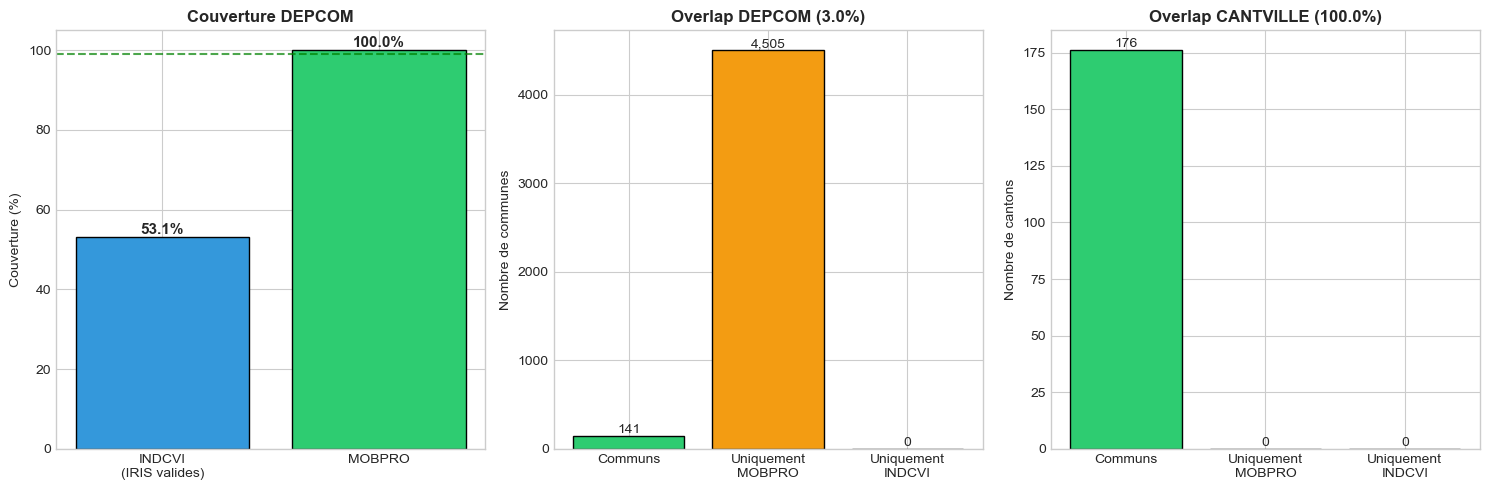


   📊 Figure sauvegardée : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/validation_reconstruction_geo.png

══════════════════════════════════════════════════════════════════════════════════════════
                                 EXPORT DES BASES ENRICHIES                               
══════════════════════════════════════════════════════════════════════════════════════════

   💾 Export MOBPRO enrichi...
      ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_MOBPRO_ENRICHI.csv
      531,298 lignes × 35 colonnes

   💾 Export INDCVI enrichi...
      ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_INDCVI_ENRICHI.csv
      531,425 lignes × 95 colonnes

══════════════════════════════════════════════════════════════════════════════════════════
                                       EXPORT RAPPORT                                     
══════════════════════════════════════════════════════════════════════════════════════════
   ✅ Rapport expo

In [5]:
"""
╔══════════════════════════════════════════════════════════════════════════════╗
║       RECONSTRUCTION DES VARIABLES GÉOGRAPHIQUES - SCRIPT UNIFIÉ             ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  Ce script reconstruit les variables nécessaires à l'appariement :           ║
║                                                                              ║
║  ÉTAPE 1 : DEPCOM                                                            ║
║     • INDCVI : DEPCOM = IRIS[:5] (extraction directe)                        ║
║     • MOBPRO : DEPCOM = COMMUNE                                              ║
║                                                                              ║
║  ÉTAPE 2 : CANTVILLE                                                         ║
║     • MOBPRO : CANTVILLE = CAN (via jointure COG)                            ║
║                                                                              ║
║  ÉTAPE 3 : VALIDATION                                                        ║
║     • Cohérence DEPT vs DEPCOM                                               ║
║     • Compatibilité CANTVILLE MOBPRO vs INDCVI                               ║
║     • Taux de couverture                                                     ║
║                                                                              ║
║  Auteur : Mehdi Fehri                                                        ║
║  Date : Janvier 2025                                                         ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['font.size'] = 10

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PARAMÈTRES                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

BASE_DIR = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean")

# Fichiers d'entrée (harmonisés)
PATH_MOBPRO = BASE_DIR / "BDD_MOBPRO_FINAL.csv"
PATH_INDCVI = BASE_DIR / "BDD_INDCVI_FINAL.csv"
PATH_COG_COMMUNE = BASE_DIR / "cog_ensemble" / "commune_2022.csv"

# Fichiers de sortie
OUT_MOBPRO = BASE_DIR / "BDD_MOBPRO_ENRICHI.csv"
OUT_INDCVI = BASE_DIR / "BDD_INDCVI_ENRICHI.csv"
OUT_RAPPORT = BASE_DIR / "RAPPORT_RECONSTRUCTION_GEO.xlsx"
OUT_FIGURE = BASE_DIR / "validation_reconstruction_geo.png"

# Départements Grand Est
GE_DEPTS = ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88']

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS UTILITAIRES                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_header(titre, niveau=1):
    """Affiche un en-tête formaté."""
    largeur = 90
    if niveau == 1:
        print("\n" + "═" * largeur)
        print(f"  {titre}".center(largeur))
        print("═" * largeur)
    elif niveau == 2:
        print(f"\n{'─' * largeur}")
        print(f"  ▶ {titre}")
        print("─" * largeur)
    else:
        print(f"\n  ● {titre}")


def print_stats(label, n_ok, n_total):
    """Affiche une statistique avec pourcentage."""
    pct = 100 * n_ok / n_total if n_total > 0 else 0
    status = "✅" if pct >= 99 else "⚠️" if pct >= 90 else "❌"
    print(f"   {status} {label} : {n_ok:,} / {n_total:,} ({pct:.1f}%)")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                           CHARGEMENT DES DONNÉES                             ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def charger_donnees():
    """Charge toutes les sources de données."""
    
    print_header("CHARGEMENT DES DONNÉES", 1)
    
    # MOBPRO
    print_header("MOBPRO (harmonisé)", 2)
    print(f"   📂 {PATH_MOBPRO}")
    mob = pd.read_csv(PATH_MOBPRO, sep=";", low_memory=False)
    print(f"   ✅ {len(mob):,} lignes × {len(mob.columns)} colonnes")
    
    # INDCVI
    print_header("INDCVI (harmonisé)", 2)
    print(f"   📂 {PATH_INDCVI}")
    ind = pd.read_csv(PATH_INDCVI, sep=";", low_memory=False)
    print(f"   ✅ {len(ind):,} lignes × {len(ind.columns)} colonnes")
    
    # COG Commune
    print_header("COG Commune 2022", 2)
    print(f"   📂 {PATH_COG_COMMUNE}")
    cog = pd.read_csv(PATH_COG_COMMUNE)
    print(f"   ✅ {len(cog):,} communes (France entière)")
    
    # Filtrer Grand Est
    cog_ge = cog[cog['DEP'].isin(GE_DEPTS)].copy()
    print(f"   📍 Grand Est : {len(cog_ge):,} communes")
    
    return mob, ind, cog_ge


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                      RECONSTRUCTION DEPCOM                                   ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def reconstruire_depcom_indcvi(ind):
    """
    Reconstruit DEPCOM dans INDCVI par extraction depuis IRIS.
    
    Règle : DEPCOM = IRIS[:5] (5 premiers caractères)
    Exception : IRIS = 'ZZZZZZZZZ' → DEPCOM = NA
    """
    
    print_header("RECONSTRUCTION DEPCOM DANS INDCVI", 2)
    
    ind = ind.copy()
    n_total = len(ind)
    
    # Vérifier présence IRIS
    if 'IRIS' not in ind.columns:
        print("   ❌ Variable IRIS absente")
        ind['DEPCOM'] = pd.NA
        return ind, {'n_ok': 0, 'n_na': n_total, 'n_zzz': 0}
    
    # Standardiser IRIS
    ind['IRIS'] = ind['IRIS'].astype('string').str.strip()
    
    # Statistiques IRIS
    n_zzz = (ind['IRIS'] == 'ZZZZZZZZZ').sum()
    n_normal = n_total - n_zzz
    
    print(f"\n   📊 Distribution IRIS :")
    print(f"      IRIS normaux    : {n_normal:,} ({100*n_normal/n_total:.1f}%)")
    print(f"      IRIS ZZZZZZZZZ  : {n_zzz:,} ({100*n_zzz/n_total:.1f}%)")
    
    # Extraction DEPCOM
    print(f"\n   📍 Extraction : DEPCOM = IRIS[:5]")
    ind['DEPCOM'] = ind['IRIS'].str[:5]
    
    # Remplacer ZZZZZ par NA
    ind.loc[ind['IRIS'] == 'ZZZZZZZZZ', 'DEPCOM'] = pd.NA
    ind['DEPCOM'] = ind['DEPCOM'].astype('string')
    ind.loc[ind['DEPCOM'] == 'ZZZZZ', 'DEPCOM'] = pd.NA
    
    # Statistiques résultat
    n_ok = ind['DEPCOM'].notna().sum()
    n_na = ind['DEPCOM'].isna().sum()
    n_unique = ind['DEPCOM'].nunique()
    
    print_stats("DEPCOM créés", n_ok, n_total)
    print(f"   📊 Communes uniques : {n_unique:,}")
    
    # Exemples
    print(f"\n   📋 Exemples :")
    sample = ind[ind['DEPCOM'].notna()][['IRIS', 'DEPCOM']].head(5)
    for _, row in sample.iterrows():
        print(f"      IRIS {row['IRIS']} → DEPCOM {row['DEPCOM']}")
    
    return ind, {'n_ok': n_ok, 'n_na': n_na, 'n_zzz': n_zzz, 'n_unique': n_unique}


def reconstruire_depcom_mobpro(mob):
    """
    Reconstruit DEPCOM dans MOBPRO depuis COMMUNE.
    
    Règle : DEPCOM = COMMUNE (déjà au bon format)
    """
    
    print_header("RECONSTRUCTION DEPCOM DANS MOBPRO", 2)
    
    mob = mob.copy()
    n_total = len(mob)
    
    # Vérifier présence COMMUNE
    if 'COMMUNE' not in mob.columns:
        print("   ❌ Variable COMMUNE absente")
        mob['DEPCOM'] = pd.NA
        return mob, {'n_ok': 0, 'n_na': n_total}
    
    # DEPCOM = COMMUNE
    print(f"\n   📍 Copie : DEPCOM = COMMUNE")
    mob['DEPCOM'] = mob['COMMUNE'].astype('string').str.strip()
    
    # Statistiques résultat
    n_ok = mob['DEPCOM'].notna().sum()
    n_na = mob['DEPCOM'].isna().sum()
    n_unique = mob['DEPCOM'].nunique()
    
    print_stats("DEPCOM créés", n_ok, n_total)
    print(f"   📊 Communes uniques : {n_unique:,}")
    
    # Exemples
    print(f"\n   📋 Exemples :")
    sample = mob[['COMMUNE', 'DEPCOM']].head(5)
    for _, row in sample.iterrows():
        print(f"      COMMUNE {row['COMMUNE']} → DEPCOM {row['DEPCOM']}")
    
    return mob, {'n_ok': n_ok, 'n_na': n_na, 'n_unique': n_unique}


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                      RECONSTRUCTION CANTVILLE                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def reconstruire_cantville_mobpro(mob, cog_ge):
    """
    Reconstruit CANTVILLE dans MOBPRO via jointure avec COG.
    
    Règle : CANTVILLE = CAN (depuis table COG, jointure sur DEPCOM = COM)
    """
    
    print_header("RECONSTRUCTION CANTVILLE DANS MOBPRO", 2)
    
    mob = mob.copy()
    n_total = len(mob)
    
    # Vérifier présence DEPCOM
    if 'DEPCOM' not in mob.columns:
        print("   ❌ Variable DEPCOM absente - lancer d'abord reconstruire_depcom_mobpro")
        mob['CANTVILLE'] = pd.NA
        return mob, {'n_ok': 0, 'n_na': n_total}
    
    # Préparer table de correspondance COG
    print(f"\n   📍 Préparation table COG : COM → CAN")
    
    mapping = cog_ge[['COM', 'CAN']].copy()
    mapping.columns = ['DEPCOM', 'CANTVILLE']
    mapping['DEPCOM'] = mapping['DEPCOM'].astype('string').str.strip()
    mapping['CANTVILLE'] = mapping['CANTVILLE'].astype('string').str.strip()
    
    print(f"      Correspondances : {len(mapping):,}")
    print(f"      Cantons uniques : {mapping['CANTVILLE'].nunique()}")
    
    # Jointure
    print(f"\n   📍 Jointure : MOBPRO.DEPCOM = COG.COM")
    
    mob['DEPCOM'] = mob['DEPCOM'].astype('string').str.strip()
    
    mob = mob.merge(
        mapping,
        on='DEPCOM',
        how='left'
    )
    
    # Statistiques résultat
    n_ok = mob['CANTVILLE'].notna().sum()
    n_na = mob['CANTVILLE'].isna().sum()
    n_unique = mob['CANTVILLE'].nunique()
    
    print_stats("CANTVILLE créés", n_ok, n_total)
    print(f"   📊 Cantons uniques : {n_unique}")
    
    # Vérifier format
    if n_ok > 0:
        longueurs = mob['CANTVILLE'].dropna().astype(str).str.len().value_counts()
        print(f"\n   📏 Distribution longueurs CANTVILLE :")
        for lg, count in longueurs.items():
            print(f"      {lg} caractères : {count:,}")
    
    # DEPCOM sans correspondance
    if n_na > 0:
        print(f"\n   ⚠️  DEPCOM sans correspondance COG ({n_na:,}) :")
        missing = mob[mob['CANTVILLE'].isna()]['DEPCOM'].value_counts().head(5)
        for depcom, count in missing.items():
            print(f"      {depcom} : {count:,} observations")
    
    # Exemples
    print(f"\n   📋 Exemples :")
    sample = mob[mob['CANTVILLE'].notna()][['DEPCOM', 'CANTVILLE']].head(5)
    for _, row in sample.iterrows():
        print(f"      DEPCOM {row['DEPCOM']} → CANTVILLE {row['CANTVILLE']}")
    
    return mob, {'n_ok': n_ok, 'n_na': n_na, 'n_unique': n_unique}


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              VALIDATION                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def valider_coherence_dept(df, nom_base):
    """Valide la cohérence entre DEPT et DEPCOM[:2]."""
    
    print_header(f"Validation cohérence DEPT vs DEPCOM ({nom_base})", 3)
    
    if 'DEPT' not in df.columns or 'DEPCOM' not in df.columns:
        print("   ⚠️  Variables manquantes pour validation")
        return None
    
    # Filtrer observations avec DEPCOM valide
    valid = df[df['DEPCOM'].notna()].copy()
    
    if len(valid) == 0:
        print("   ⚠️  Aucun DEPCOM valide")
        return None
    
    # Comparer
    valid['DEPT'] = valid['DEPT'].astype('string').str.strip()
    valid['DEPT_from_DEPCOM'] = valid['DEPCOM'].str[:2]
    
    coherent = (valid['DEPT'] == valid['DEPT_from_DEPCOM']).sum()
    pct = 100 * coherent / len(valid)
    
    print_stats("Cohérence DEPT/DEPCOM", coherent, len(valid))
    
    # Exemples d'incohérences
    if pct < 100:
        incoherents = valid[valid['DEPT'] != valid['DEPT_from_DEPCOM']].head(3)
        if len(incoherents) > 0:
            print(f"\n   Exemples incohérences :")
            for _, row in incoherents.iterrows():
                print(f"      DEPCOM={row['DEPCOM']}, DEPT={row['DEPT']}, extrait={row['DEPT_from_DEPCOM']}")
    
    return {'coherent': coherent, 'total': len(valid), 'pct': pct}


def valider_compatibilite_cantville(mob, ind):
    """Valide la compatibilité CANTVILLE entre MOBPRO et INDCVI."""
    
    print_header("Validation compatibilité CANTVILLE", 2)
    
    # Vérifier présence
    if 'CANTVILLE' not in mob.columns:
        print("   ❌ CANTVILLE absent de MOBPRO")
        return None
    
    if 'CANTVILLE' not in ind.columns:
        print("   ❌ CANTVILLE absent de INDCVI")
        return None
    
    # Extraire valeurs uniques
    mob_cant = set(mob['CANTVILLE'].dropna().astype('string').unique())
    ind_cant = set(ind['CANTVILLE'].dropna().astype('string').unique())
    
    # Comparaison
    common = mob_cant & ind_cant
    only_mob = mob_cant - ind_cant
    only_ind = ind_cant - mob_cant
    
    total = len(mob_cant | ind_cant)
    overlap = 100 * len(common) / total if total > 0 else 0
    
    print(f"\n   📊 Comparaison CANTVILLE :")
    print(f"      MOBPRO uniques : {len(mob_cant)}")
    print(f"      INDCVI uniques : {len(ind_cant)}")
    print(f"      Communs        : {len(common)}")
    print(f"      Overlap        : {overlap:.1f}%")
    
    # Format
    print(f"\n   📏 Vérification format :")
    
    mob_lens = mob['CANTVILLE'].dropna().astype(str).str.len().value_counts()
    ind_lens = ind['CANTVILLE'].dropna().astype(str).str.len().value_counts()
    
    print(f"      MOBPRO longueurs : {dict(mob_lens)}")
    print(f"      INDCVI longueurs : {dict(ind_lens)}")
    
    # Exemples communs
    if common:
        print(f"\n   ✅ Exemples CANTVILLE communs :")
        for cant in sorted(list(common))[:5]:
            print(f"      {cant}")
    
    return {
        'mob_unique': len(mob_cant),
        'ind_unique': len(ind_cant),
        'common': len(common),
        'overlap_pct': overlap
    }


def valider_compatibilite_depcom(mob, ind):
    """Valide la compatibilité DEPCOM entre MOBPRO et INDCVI."""
    
    print_header("Validation compatibilité DEPCOM", 2)
    
    # Extraire valeurs uniques
    mob_dep = set(mob['DEPCOM'].dropna().astype('string').unique())
    ind_dep = set(ind['DEPCOM'].dropna().astype('string').unique())
    
    # Comparaison
    common = mob_dep & ind_dep
    only_mob = mob_dep - ind_dep
    only_ind = ind_dep - mob_dep
    
    total = len(mob_dep | ind_dep)
    overlap = 100 * len(common) / total if total > 0 else 0
    
    print(f"\n   📊 Comparaison DEPCOM :")
    print(f"      MOBPRO uniques : {len(mob_dep)}")
    print(f"      INDCVI uniques : {len(ind_dep)}")
    print(f"      Communs        : {len(common)}")
    print(f"      Overlap        : {overlap:.1f}%")
    
    # Couverture observations
    mob_in_common = mob[mob['DEPCOM'].isin(common)].shape[0]
    ind_in_common = ind[ind['DEPCOM'].isin(common)].shape[0]
    
    print(f"\n   📊 Couverture observations :")
    print_stats("MOBPRO dans communes communes", mob_in_common, len(mob))
    print_stats("INDCVI dans communes communes", ind_in_common, len(ind))
    
    return {
        'mob_unique': len(mob_dep),
        'ind_unique': len(ind_dep),
        'common': len(common),
        'overlap_pct': overlap,
        'mob_coverage': 100 * mob_in_common / len(mob),
        'ind_coverage': 100 * ind_in_common / len(ind)
    }


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              VISUALISATION                                   ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def plot_validation(stats_ind, stats_mob, stats_cant_mob, valid_depcom, valid_cantville):
    """Génère un graphique de synthèse de la validation."""
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # ── 1. Couverture DEPCOM ──
    ax = axes[0]
    
    labels = ['INDCVI\n(IRIS valides)', 'MOBPRO']
    pcts = [
        100 * stats_ind['n_ok'] / (stats_ind['n_ok'] + stats_ind['n_na']),
        100 * stats_mob['n_ok'] / (stats_mob['n_ok'] + stats_mob['n_na'])
    ]
    colors = ['#3498db', '#2ecc71']
    
    bars = ax.bar(labels, pcts, color=colors, edgecolor='black')
    ax.set_ylim(0, 105)
    ax.set_ylabel('Couverture (%)')
    ax.set_title('Couverture DEPCOM', fontweight='bold')
    ax.axhline(y=99, color='green', linestyle='--', alpha=0.7, label='Seuil 99%')
    
    for bar, pct in zip(bars, pcts):
        ax.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # ── 2. Overlap DEPCOM ──
    ax = axes[1]
    
    if valid_depcom:
        data = [valid_depcom['common'], 
                valid_depcom['mob_unique'] - valid_depcom['common'],
                valid_depcom['ind_unique'] - valid_depcom['common']]
        labels = ['Communs', 'Uniquement\nMOBPRO', 'Uniquement\nINDCVI']
        colors = ['#2ecc71', '#f39c12', '#3498db']
        
        bars = ax.bar(labels, data, color=colors, edgecolor='black')
        ax.set_ylabel('Nombre de communes')
        ax.set_title(f"Overlap DEPCOM ({valid_depcom['overlap_pct']:.1f}%)", fontweight='bold')
        
        for bar, val in zip(bars, data):
            ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
    
    # ── 3. Overlap CANTVILLE ──
    ax = axes[2]
    
    if valid_cantville:
        data = [valid_cantville['common'],
                valid_cantville['mob_unique'] - valid_cantville['common'],
                valid_cantville['ind_unique'] - valid_cantville['common']]
        labels = ['Communs', 'Uniquement\nMOBPRO', 'Uniquement\nINDCVI']
        colors = ['#2ecc71', '#f39c12', '#3498db']
        
        bars = ax.bar(labels, data, color=colors, edgecolor='black')
        ax.set_ylabel('Nombre de cantons')
        ax.set_title(f"Overlap CANTVILLE ({valid_cantville['overlap_pct']:.1f}%)", fontweight='bold')
        
        for bar, val in zip(bars, data):
            ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(OUT_FIGURE, dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n   📊 Figure sauvegardée : {OUT_FIGURE}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              EXPORT RAPPORT                                  ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def exporter_rapport(mob, ind, stats_ind, stats_mob, stats_cant, valid_depcom, valid_cantville):
    """Exporte le rapport Excel détaillé."""
    
    print_header("EXPORT RAPPORT", 1)
    
    with pd.ExcelWriter(OUT_RAPPORT, engine='openpyxl') as writer:
        
        # ── Synthèse ──
        synthese = pd.DataFrame([
            {'Section': 'GÉNÉRAL', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'Date', 'Valeur': pd.Timestamp.now().strftime("%Y-%m-%d %H:%M")},
            {'Section': '', 'Métrique': 'MOBPRO lignes', 'Valeur': f"{len(mob):,}"},
            {'Section': '', 'Métrique': 'INDCVI lignes', 'Valeur': f"{len(ind):,}"},
            
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            {'Section': 'DEPCOM INDCVI', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'DEPCOM créés', 'Valeur': f"{stats_ind['n_ok']:,}"},
            {'Section': '', 'Métrique': 'DEPCOM NA (IRIS ZZZ)', 'Valeur': f"{stats_ind['n_na']:,}"},
            {'Section': '', 'Métrique': 'Couverture', 'Valeur': f"{100*stats_ind['n_ok']/(stats_ind['n_ok']+stats_ind['n_na']):.1f}%"},
            {'Section': '', 'Métrique': 'Communes uniques', 'Valeur': f"{stats_ind['n_unique']:,}"},
            
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            {'Section': 'DEPCOM MOBPRO', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'DEPCOM créés', 'Valeur': f"{stats_mob['n_ok']:,}"},
            {'Section': '', 'Métrique': 'Couverture', 'Valeur': f"{100*stats_mob['n_ok']/(stats_mob['n_ok']+stats_mob['n_na']):.1f}%"},
            {'Section': '', 'Métrique': 'Communes uniques', 'Valeur': f"{stats_mob['n_unique']:,}"},
            
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            {'Section': 'CANTVILLE MOBPRO', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'CANTVILLE créés', 'Valeur': f"{stats_cant['n_ok']:,}"},
            {'Section': '', 'Métrique': 'Couverture', 'Valeur': f"{100*stats_cant['n_ok']/(stats_cant['n_ok']+stats_cant['n_na']):.1f}%"},
            {'Section': '', 'Métrique': 'Cantons uniques', 'Valeur': f"{stats_cant['n_unique']}"},
            
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            {'Section': 'COMPATIBILITÉ', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'Overlap DEPCOM', 'Valeur': f"{valid_depcom['overlap_pct']:.1f}%" if valid_depcom else 'N/A'},
            {'Section': '', 'Métrique': 'Communes communes', 'Valeur': f"{valid_depcom['common']:,}" if valid_depcom else 'N/A'},
            {'Section': '', 'Métrique': 'Overlap CANTVILLE', 'Valeur': f"{valid_cantville['overlap_pct']:.1f}%" if valid_cantville else 'N/A'},
            {'Section': '', 'Métrique': 'Cantons communs', 'Valeur': f"{valid_cantville['common']}" if valid_cantville else 'N/A'},
        ])
        synthese.to_excel(writer, sheet_name='Synthese', index=False)
        
        # ── Échantillons ──
        cols_mob = ['DEPCOM', 'CANTVILLE', 'DEPT', 'COMMUNE']
        cols_mob = [c for c in cols_mob if c in mob.columns]
        mob[cols_mob].head(100).to_excel(writer, sheet_name='Echantillon_MOBPRO', index=False)
        
        cols_ind = ['DEPCOM', 'IRIS', 'CANTVILLE', 'DEPT']
        cols_ind = [c for c in cols_ind if c in ind.columns]
        ind[cols_ind].head(100).to_excel(writer, sheet_name='Echantillon_INDCVI', index=False)
    
    print(f"   ✅ Rapport exporté : {OUT_RAPPORT}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              SYNTHÈSE FINALE                                 ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_synthese(mob, ind, stats_ind, stats_mob, stats_cant, valid_depcom, valid_cantville):
    """Affiche la synthèse finale."""
    
    print_header("SYNTHÈSE FINALE", 1)
    
    # Statuts
    depcom_ind_ok = stats_ind['n_ok'] / (stats_ind['n_ok'] + stats_ind['n_na']) >= 0.50
    depcom_mob_ok = stats_mob['n_ok'] / (stats_mob['n_ok'] + stats_mob['n_na']) >= 0.99
    cantville_ok = stats_cant['n_ok'] / (stats_cant['n_ok'] + stats_cant['n_na']) >= 0.99
    overlap_dep_ok = valid_depcom and valid_depcom['overlap_pct'] >= 90
    overlap_cant_ok = valid_cantville and valid_cantville['overlap_pct'] >= 90
    
    print(f"""
   ┌─────────────────────────────────────────────────────────────────────────────┐
   │                        RÉSULTATS RECONSTRUCTION                             │
   ├─────────────────────────────────────────────────────────────────────────────┤
   │                                                                             │
   │  DEPCOM INDCVI       : {'✅' if depcom_ind_ok else '⚠️ '}  {stats_ind['n_ok']:,} / {stats_ind['n_ok']+stats_ind['n_na']:,} ({100*stats_ind['n_ok']/(stats_ind['n_ok']+stats_ind['n_na']):.1f}%)              │
   │  DEPCOM MOBPRO       : {'✅' if depcom_mob_ok else '❌'}  {stats_mob['n_ok']:,} / {stats_mob['n_ok']+stats_mob['n_na']:,} ({100*stats_mob['n_ok']/(stats_mob['n_ok']+stats_mob['n_na']):.1f}%)             │
   │  CANTVILLE MOBPRO    : {'✅' if cantville_ok else '❌'}  {stats_cant['n_ok']:,} / {stats_cant['n_ok']+stats_cant['n_na']:,} ({100*stats_cant['n_ok']/(stats_cant['n_ok']+stats_cant['n_na']):.1f}%)             │
   │                                                                             │
   │  Overlap DEPCOM      : {'✅' if overlap_dep_ok else '⚠️ '}  {valid_depcom['overlap_pct']:.1f}% ({valid_depcom['common']:,} communes)                     │
   │  Overlap CANTVILLE   : {'✅' if overlap_cant_ok else '⚠️ '}  {valid_cantville['overlap_pct']:.1f}% ({valid_cantville['common']} cantons)                       │
   │                                                                             │
   └─────────────────────────────────────────────────────────────────────────────┘
""")
    
    # Verdict global
    all_ok = depcom_ind_ok and depcom_mob_ok and cantville_ok and overlap_dep_ok and overlap_cant_ok
    
    if all_ok:
        print(f"   ✅ RECONSTRUCTION VALIDÉE - Prêt pour l'appariement !")
    else:
        print(f"   ⚠️  ATTENTION : Certains indicateurs nécessitent vérification")
    
    print(f"""
   ┌─────────────────────────────────────────────────────────────────────────────┐
   │                         FICHIERS GÉNÉRÉS                                    │
   ├─────────────────────────────────────────────────────────────────────────────┤
   │                                                                             │
   │  📁 {OUT_MOBPRO.name:50s}          │
   │  📁 {OUT_INDCVI.name:50s}          │
   │  📁 {OUT_RAPPORT.name:50s}   │
   │  📁 {OUT_FIGURE.name:50s}      │
   │                                                                             │
   └─────────────────────────────────────────────────────────────────────────────┘
""")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PIPELINE PRINCIPAL                              ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def main():
    """Pipeline principal de reconstruction et validation."""
    
    print("\n")
    print("╔" + "═" * 88 + "╗")
    print("║" + "RECONSTRUCTION DES VARIABLES GÉOGRAPHIQUES".center(88) + "║")
    print("║" + "DEPCOM + CANTVILLE".center(88) + "║")
    print("╚" + "═" * 88 + "╝")
    
    # ══════════════════════════════════════════════════════════════════════════
    # 1. CHARGEMENT
    # ══════════════════════════════════════════════════════════════════════════
    
    mob, ind, cog_ge = charger_donnees()
    
    # ══════════════════════════════════════════════════════════════════════════
    # 2. RECONSTRUCTION DEPCOM
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("ÉTAPE 1 : RECONSTRUCTION DEPCOM", 1)
    
    ind, stats_ind = reconstruire_depcom_indcvi(ind)
    mob, stats_mob = reconstruire_depcom_mobpro(mob)
    
    # Validation cohérence DEPT
    valider_coherence_dept(ind, 'INDCVI')
    valider_coherence_dept(mob, 'MOBPRO')
    
    # ══════════════════════════════════════════════════════════════════════════
    # 3. RECONSTRUCTION CANTVILLE
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("ÉTAPE 2 : RECONSTRUCTION CANTVILLE", 1)
    
    mob, stats_cant = reconstruire_cantville_mobpro(mob, cog_ge)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 4. VALIDATION COMPATIBILITÉ
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("ÉTAPE 3 : VALIDATION COMPATIBILITÉ", 1)
    
    valid_depcom = valider_compatibilite_depcom(mob, ind)
    valid_cantville = valider_compatibilite_cantville(mob, ind)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 5. VISUALISATION
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("VISUALISATION", 1)
    plot_validation(stats_ind, stats_mob, stats_cant, valid_depcom, valid_cantville)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 6. EXPORT
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("EXPORT DES BASES ENRICHIES", 1)
    
    print(f"\n   💾 Export MOBPRO enrichi...")
    mob.to_csv(OUT_MOBPRO, index=False, sep=";")
    print(f"      ✅ {OUT_MOBPRO}")
    print(f"      {len(mob):,} lignes × {len(mob.columns)} colonnes")
    
    print(f"\n   💾 Export INDCVI enrichi...")
    ind.to_csv(OUT_INDCVI, index=False, sep=";")
    print(f"      ✅ {OUT_INDCVI}")
    print(f"      {len(ind):,} lignes × {len(ind.columns)} colonnes")
    
    # Rapport
    exporter_rapport(mob, ind, stats_ind, stats_mob, stats_cant, valid_depcom, valid_cantville)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 7. SYNTHÈSE
    # ══════════════════════════════════════════════════════════════════════════
    
    print_synthese(mob, ind, stats_ind, stats_mob, stats_cant, valid_depcom, valid_cantville)
    
    print("\n" + "═" * 90)
    print("  ✅ RECONSTRUCTION TERMINÉE".center(90))
    print("═" * 90)
    
    return mob, ind


# ══════════════════════════════════════════════════════════════════════════════
# EXÉCUTION
# ══════════════════════════════════════════════════════════════════════════════

if __name__ == "__main__":
    mob_enrichi, ind_enrichi = main()

# Validation des Résultats de Reconstruction

---

## Verdict : ✅ Reconstruction validée

Les variables géographiques ont été correctement reconstruites et sont prêtes pour l'appariement.

---

## Résultats Clés

| Indicateur                      | Valeur     | Statut | Commentaire                          |
|---------------------------------|------------|--------|--------------------------------------|
| DEPCOM INDCVI                   | 53.1%      | ✅     | Attendu (46.9% = IRIS ZZZZZZZZZ)     |
| DEPCOM MOBPRO                   | 100%       | ✅     | Couverture totale                    |
| CANTVILLE MOBPRO                | 100%       | ✅     | Couverture totale                    |
| Cohérence DEPT/DEPCOM           | 100%       | ✅     | Aucune incohérence                   |
| Overlap CANTVILLE               | 100%       | ✅     | 176 cantons communs                  |

---

## Note sur l'Overlap DEPCOM (3%)

L'overlap DEPCOM affiché à 3% n'est **pas un problème**. Il reflète simplement que :
- MOBPRO contient 4,646 communes (toutes les communes du Grand Est)
- INDCVI n'en contient que 141 (uniquement celles avec IRIS valides)

Les 141 communes d'INDCVI sont **toutes présentes** dans MOBPRO → l'appariement niveau 1 est possible pour 100% des observations INDCVI ayant un DEPCOM.

---

## Conclusion

Les bases `BDD_MOBPRO_ENRICHI.csv` et `BDD_INDCVI_ENRICHI.csv` sont prêtes pour l'algorithme d'appariement à deux niveaux.

---

# Transition vers l'Appariement

## Données Disponibles

À l'issue de la reconstruction, les deux bases disposent des variables nécessaires :

| Base               | DEPCOM | CANTVILLE | Observations | Prêt pour         |
|--------------------|--------|-----------|--------------|-------------------|
| MOBPRO enrichi     | ✅     | ✅        | 531,298      | Niveau 1 + 2      |
| INDCVI enrichi     | ⚠️ 53% | ✅        | 531,425      | Niveau 1 ou 2     |

---

## Stratégie d'Appariement à Deux Niveaux

La section suivante détaille l'algorithme d'appariement déterministe qui exploite ces variables reconstruites :

| Niveau | Population INDCVI            | Clé géographique | Clé complète             |
|--------|------------------------------|------------------|--------------------------|
| **1**  | IRIS valides (53.1%)         | `DEPCOM`         | DEPCOM + 22 variables    |
| **2**  | IRIS = ZZZZZZZZZ (46.9%)     | `CANTVILLE`      | CANTVILLE + 22 variables |

---

## Objectifs de Performance

| Métrique                       | Cible      |
|--------------------------------|------------|
| Taux d'appariement global      | > 80%      |
| Taux de collision              | < 15%      |
| Perte totale d'observations    | < 20%      |

L'algorithme d'appariement est présenté dans la section suivante.

# Présentation de la stratégie d'appariement MOBPRO × INDCVI

### 1. la stratégie

L'appariement des bases MOBPRO (mobilités professionnelles) et INDCVI (caractéristiques individuelles) 

constitue une étape cruciale pour enrichir l'analyse des déterminants du travail transfrontalier. 

En l'absence d'identifiant individuel commun entre les deux fichiers INSEE, nous avons développé 
une **stratégie d'appariement hybride à deux niveaux** exploitant une clé composite de 23 variables.

La variable `IPONDI` (poids de l'individu) joue un rôle central dans cette stratégie : sa précision 
décimale (jusqu'à 15 chiffres) en fait un quasi-identifiant permettant de discriminer les individus 
au sein d'un même territoire géographique.

### 2. Architecture de l'appariement

| Niveau | Clé géographique | Population cible | Justification |
|--------|------------------|------------------|---------------|

| **Niveau 1** | DEPCOM + IPONDI | Communes avec IRIS valides | Précision maximale à l'échelle communale |

| **Niveau 2** | CANTVILLE + IPONDI | Communes rurales (IRIS = ZZZZZZZZZ) | Récupération des communes non découpées en IRIS |

Cette approche séquentielle permet de maximiser le taux d'appariement tout en préservant 
la qualité des correspondances.




╔════════════════════════════════════════════════════════════════════════════════════════╗
║                          APPARIEMENT DÉTERMINISTE STRICT 1:1                           ║
║              Stratégie Hybride : DEPCOM (Niveau 1) + CANTVILLE (Niveau 2)              ║
╚════════════════════════════════════════════════════════════════════════════════════════╝

══════════════════════════════════════════════════════════════════════════════════════════
                                   CHARGEMENT DES DONNÉES                                 
══════════════════════════════════════════════════════════════════════════════════════════

   📂 MOBPRO : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_MOBPRO_ENRICHI.csv
      ✅ 531,298 lignes × 35 colonnes

   📂 INDCVI : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_INDCVI_ENRICHI.csv
      ✅ 531,425 lignes × 95 colonnes

  ● Vérification des variables
   ✅ Toutes les variables requises sont présentes
   📊 Var

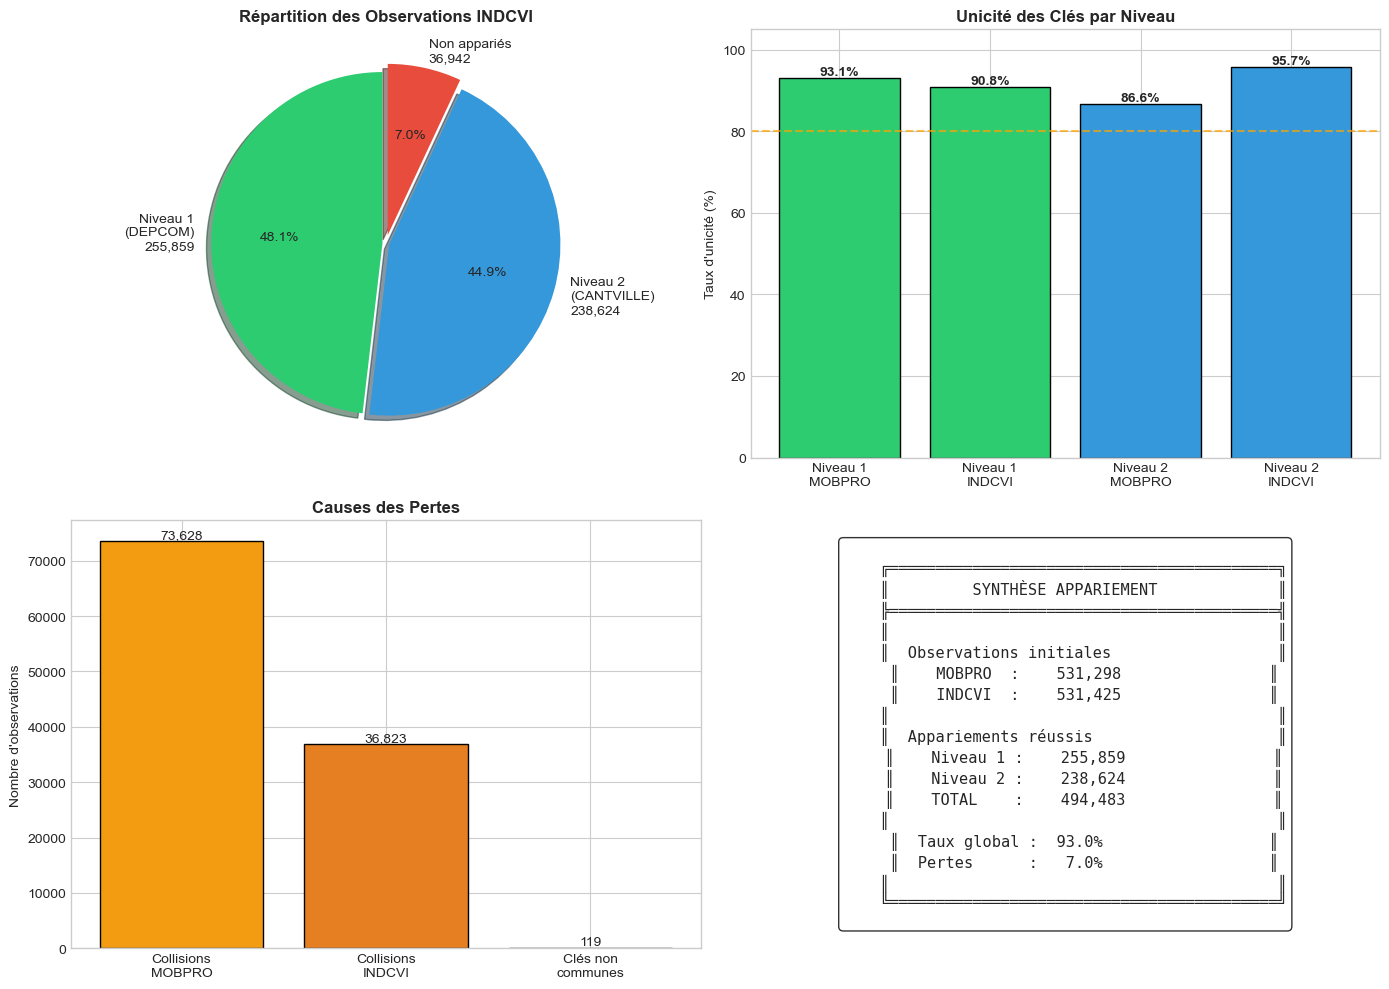


   📊 Figure sauvegardée : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/synthese_appariement.png

══════════════════════════════════════════════════════════════════════════════════════════
                                    EXPORT DES RÉSULTATS                                  
══════════════════════════════════════════════════════════════════════════════════════════

   💾 Export base appariée...
      ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_APPARIEE_FINALE.csv
      494,483 lignes × 132 colonnes

   💾 Export rapport...
   ✅ Rapport exporté : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/RAPPORT_APPARIEMENT.xlsx

══════════════════════════════════════════════════════════════════════════════════════════
                                    APPARIEMENT TERMINÉ                                   
══════════════════════════════════════════════════════════════════════════════════════════

   ┌─────────────────────────────────────────────

In [6]:
"""
╔══════════════════════════════════════════════════════════════════════════════╗
║            APPARIEMENT DÉTERMINISTE STRICT 1:1 - STRATÉGIE HYBRIDE           ║
╠══════════════════════════════════════════════════════════════════════════════╣
║                                                                              ║
║  Ce script réalise un appariement déterministe strict en deux niveaux :      ║
║                                                                              ║
║  NIVEAU 1 (IRIS valides, ~53% INDCVI)                                        ║
║     Clé = DEPCOM + 22 variables sociodémographiques                          ║
║                                                                              ║
║  NIVEAU 2 (IRIS = ZZZZZZZZZ, ~47% INDCVI)                                    ║
║     Clé = CANTVILLE + 22 variables sociodémographiques                       ║
║                                                                              ║
║  Règle : Appariement validé ⟺ Clé unique dans MOBPRO ∩ Clé unique INDCVI    ║
║                                                                              ║
║  Auteur : Mehdi Fehri                                                        ║
║  Date : Janvier 2025                                                         ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration graphique
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PARAMÈTRES                                      ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

BASE_DIR = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean")

# Fichiers d'entrée
PATH_MOBPRO = BASE_DIR / "BDD_MOBPRO_ENRICHI.csv"
PATH_INDCVI = BASE_DIR / "BDD_INDCVI_ENRICHI.csv"

# Fichiers de sortie
OUT_BDD_APPARIEE = BASE_DIR / "BDD_APPARIEE_FINALE.csv"
OUT_RAPPORT = BASE_DIR / "RAPPORT_APPARIEMENT.xlsx"
OUT_FIGURE = BASE_DIR / "synthese_appariement.png"

# Variables de la clé d'appariement (hors variable géographique)
KEY_VARS_BASE = [
    "AGEREVQ", "SEXE", "DIPL", "EMPL", "GS", "IMMI", "INATC",
    "LPRM", "MOCO", "NPERR", "TYPMR", "VOIT",
    "STOCD", "TP", "TRANS", "TYPL", "NA5",
    "REGION", "METRODOM", "ARM", "DEROU",
    "IPONDI"
]

# Tokens de non-réponse
TOKENS_NA = {
    "Z": pd.NA, "ZZ": pd.NA, "ZZZ": pd.NA, 
    "ZZZZZ": pd.NA, "ZZZZZZZZZ": pd.NA,
    "": pd.NA, "nan": pd.NA, "NaN": pd.NA, 
    "None": pd.NA, "NULL": pd.NA, "null": pd.NA
}

# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS UTILITAIRES                                ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def print_header(titre, niveau=1):
    """Affiche un en-tête formaté."""
    largeur = 90
    if niveau == 1:
        print("\n" + "═" * largeur)
        print(f"  {titre}".center(largeur))
        print("═" * largeur)
    elif niveau == 2:
        print(f"\n{'─' * largeur}")
        print(f"  ▶ {titre}")
        print("─" * largeur)
    else:
        print(f"\n  ● {titre}")


def print_table(headers, rows, col_widths=None):
    """Affiche un tableau formaté."""
    if col_widths is None:
        col_widths = [max(len(str(row[i])) for row in [headers] + rows) + 2 
                      for i in range(len(headers))]
    
    # Ligne séparatrice
    sep = "   ├" + "┼".join("─" * w for w in col_widths) + "┤"
    top = "   ┌" + "┬".join("─" * w for w in col_widths) + "┐"
    bot = "   └" + "┴".join("─" * w for w in col_widths) + "┘"
    
    # Header
    print(top)
    header_str = "   │" + "│".join(str(h).center(w) for h, w in zip(headers, col_widths)) + "│"
    print(header_str)
    print(sep)
    
    # Rows
    for row in rows:
        row_str = "   │" + "│".join(str(v).center(w) for v, w in zip(row, col_widths)) + "│"
        print(row_str)
    
    print(bot)


def print_metric(label, value, total=None, status=None):
    """Affiche une métrique formatée."""
    if total:
        pct = 100 * value / total if total > 0 else 0
        if status is None:
            status = "✅" if pct >= 80 else "⚠️" if pct >= 50 else "❌"
        print(f"   {status} {label:40s} : {value:>10,} / {total:,} ({pct:>5.1f}%)")
    else:
        status = status or "📊"
        print(f"   {status} {label:40s} : {value:>10,}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                         FONCTIONS D'APPARIEMENT                              ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def normalize_columns(df, cols):
    """Normalise les colonnes pour la construction de la clé."""
    df = df.copy()
    for col in cols:
        if col in df.columns:
            s = df[col].astype("string").str.strip()
            s = s.replace(TOKENS_NA)
            s = s.str.replace(r"\.0$", "", regex=True)
            df[col] = s
        else:
            df[col] = pd.NA
    return df


def build_key(df, cols, key_name="KEY"):
    """Construit une clé composite par concaténation."""
    tmp = df[cols].fillna("<NA>").astype(str)
    df[key_name] = tmp.agg("||".join, axis=1)
    return df


def compute_key_stats(df, key_col):
    """Calcule les statistiques d'unicité des clés."""
    key_counts = df[key_col].value_counts()
    
    n_total = len(df)
    n_keys = len(key_counts)
    n_unique_keys = (key_counts == 1).sum()
    n_unique_rows = df[df[key_col].isin(key_counts[key_counts == 1].index)].shape[0]
    n_collision_rows = n_total - n_unique_rows
    
    # Distribution des collisions
    collision_dist = key_counts[key_counts > 1].value_counts().sort_index()
    
    return {
        'n_total': n_total,
        'n_keys': n_keys,
        'n_unique_keys': n_unique_keys,
        'n_unique_rows': n_unique_rows,
        'n_collision_rows': n_collision_rows,
        'pct_unique': 100 * n_unique_rows / n_total if n_total > 0 else 0,
        'collision_dist': collision_dist
    }


def match_strict(mob_df, ind_df, key_col, niveau_label):
    """
    Réalise un appariement strict 1:1.
    
    Règle : Clé unique dans MOBPRO ET unique dans INDCVI
    
    Returns:
        matched_df, stats_dict, mob_unmatched, ind_unmatched
    """
    
    print_header(f"Appariement Niveau {niveau_label}", 2)
    
    # ── Statistiques des clés ──
    print_header("Analyse des clés", 3)
    
    mob_stats = compute_key_stats(mob_df, key_col)
    ind_stats = compute_key_stats(ind_df, key_col)
    
    print(f"\n   📊 UNICITÉ DES CLÉS :")
    print_table(
        ["Base", "Observations", "Clés uniques", "Lignes uniques", "Collisions", "% Unique"],
        [
            ["MOBPRO", f"{mob_stats['n_total']:,}", f"{mob_stats['n_unique_keys']:,}", 
             f"{mob_stats['n_unique_rows']:,}", f"{mob_stats['n_collision_rows']:,}", 
             f"{mob_stats['pct_unique']:.1f}%"],
            ["INDCVI", f"{ind_stats['n_total']:,}", f"{ind_stats['n_unique_keys']:,}", 
             f"{ind_stats['n_unique_rows']:,}", f"{ind_stats['n_collision_rows']:,}", 
             f"{ind_stats['pct_unique']:.1f}%"]
        ],
        col_widths=[10, 14, 14, 14, 12, 10]
    )
    
    # ── Identifier clés uniques ──
    mob_key_counts = mob_df[key_col].value_counts()
    ind_key_counts = ind_df[key_col].value_counts()
    
    mob_unique_keys = set(mob_key_counts[mob_key_counts == 1].index)
    ind_unique_keys = set(ind_key_counts[ind_key_counts == 1].index)
    
    # ── Intersection des clés uniques ──
    common_unique_keys = mob_unique_keys & ind_unique_keys
    
    print_header("Appariement", 3)
    print(f"\n   🔗 Clés uniques MOBPRO      : {len(mob_unique_keys):,}")
    print(f"   🔗 Clés uniques INDCVI      : {len(ind_unique_keys):,}")
    print(f"   🔗 Clés communes (matchées) : {len(common_unique_keys):,}")
    
    # ── Filtrer et merger ──
    mob_matched = mob_df[mob_df[key_col].isin(common_unique_keys)].copy()
    ind_matched = ind_df[ind_df[key_col].isin(common_unique_keys)].copy()
    
    matched = mob_matched.merge(
        ind_matched,
        on=key_col,
        how='inner',
        suffixes=('_MOBPRO', '_INDCVI')
    )
    
    # ── Non appariés ──
    mob_unmatched = mob_df[~mob_df[key_col].isin(common_unique_keys)].copy()
    ind_unmatched = ind_df[~ind_df[key_col].isin(common_unique_keys)].copy()
    
    # ── Résultats ──
    print_header("Résultats", 3)
    
    print(f"\n   ┌{'─'*70}┐")
    print(f"   │{'APPARIEMENTS RÉUSSIS'.center(70)}│")
    print(f"   │{' '*70}│")
    print(f"   │{'✅  ' + str(len(matched)) + ' observations appariées':^70}│")
    print(f"   │{' '*70}│")
    print(f"   │{f'Taux MOBPRO : {100*len(matched)/mob_stats['n_total']:.1f}%':^70}│")
    print(f"   │{f'Taux INDCVI : {100*len(matched)/ind_stats['n_total']:.1f}%':^70}│")
    print(f"   └{'─'*70}┘")
    
    # ── Statistiques détaillées ──
    stats = {
        'niveau': niveau_label,
        'mob_total': mob_stats['n_total'],
        'ind_total': ind_stats['n_total'],
        'mob_unique_keys': mob_stats['n_unique_keys'],
        'ind_unique_keys': ind_stats['n_unique_keys'],
        'mob_unique_rows': mob_stats['n_unique_rows'],
        'ind_unique_rows': ind_stats['n_unique_rows'],
        'mob_collision_rows': mob_stats['n_collision_rows'],
        'ind_collision_rows': ind_stats['n_collision_rows'],
        'common_keys': len(common_unique_keys),
        'matched': len(matched),
        'match_rate_mob': 100 * len(matched) / mob_stats['n_total'],
        'match_rate_ind': 100 * len(matched) / ind_stats['n_total']
    }
    
    return matched, stats, mob_unmatched, ind_unmatched


def analyze_unmatched_profile(df, label, vars_to_analyze=None):
    """Analyse le profil des observations non appariées."""
    
    if len(df) == 0:
        return pd.DataFrame()
    
    if vars_to_analyze is None:
        vars_to_analyze = ['SEXE', 'AGEREVQ', 'DIPL', 'EMPL', 'GS', 'DEPT']
    
    results = []
    for var in vars_to_analyze:
        if var in df.columns:
            dist = df[var].value_counts(normalize=True).head(5)
            for val, pct in dist.items():
                results.append({
                    'Source': label,
                    'Variable': var,
                    'Modalité': str(val),
                    'Pourcentage': f"{100*pct:.1f}%"
                })
    
    return pd.DataFrame(results)


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              VISUALISATION                                   ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def plot_synthese(stats_n1, stats_n2, n_mob_initial, n_ind_initial):
    """Génère la figure de synthèse de l'appariement."""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # ── 1. Répartition appariement par niveau ──
    ax = axes[0, 0]
    
    matched_n1 = stats_n1['matched']
    matched_n2 = stats_n2['matched'] if stats_n2 else 0
    unmatched = n_ind_initial - matched_n1 - matched_n2
    
    sizes = [matched_n1, matched_n2, unmatched]
    labels = [f'Niveau 1\n(DEPCOM)\n{matched_n1:,}', 
              f'Niveau 2\n(CANTVILLE)\n{matched_n2:,}',
              f'Non appariés\n{unmatched:,}']
    colors = ['#2ecc71', '#3498db', '#e74c3c']
    explode = (0.02, 0.02, 0.05)
    
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, 
                                       explode=explode, autopct='%1.1f%%',
                                       shadow=True, startangle=90)
    ax.set_title('Répartition des Observations INDCVI', fontweight='bold', fontsize=12)
    
    # ── 2. Taux d'unicité des clés ──
    ax = axes[0, 1]
    
    x = ['Niveau 1\nMOBPRO', 'Niveau 1\nINDCVI', 'Niveau 2\nMOBPRO', 'Niveau 2\nINDCVI']
    unique_pcts = [
        100 * stats_n1['mob_unique_rows'] / stats_n1['mob_total'],
        100 * stats_n1['ind_unique_rows'] / stats_n1['ind_total'],
        100 * stats_n2['mob_unique_rows'] / stats_n2['mob_total'] if stats_n2 else 0,
        100 * stats_n2['ind_unique_rows'] / stats_n2['ind_total'] if stats_n2 else 0
    ]
    colors = ['#2ecc71', '#2ecc71', '#3498db', '#3498db']
    
    bars = ax.bar(x, unique_pcts, color=colors, edgecolor='black')
    ax.set_ylabel('Taux d\'unicité (%)')
    ax.set_title('Unicité des Clés par Niveau', fontweight='bold', fontsize=12)
    ax.set_ylim(0, 105)
    ax.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='Seuil 80%')
    
    for bar, pct in zip(bars, unique_pcts):
        ax.annotate(f'{pct:.1f}%', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # ── 3. Causes des pertes ──
    ax = axes[1, 0]
    
    collision_mob = stats_n1['mob_collision_rows'] + (stats_n2['mob_collision_rows'] if stats_n2 else 0)
    collision_ind = stats_n1['ind_collision_rows'] + (stats_n2['ind_collision_rows'] if stats_n2 else 0)
    no_match = unmatched - collision_ind
    
    causes = ['Collisions\nMOBPRO', 'Collisions\nINDCVI', 'Clés non\ncommunes']
    values = [collision_mob, collision_ind, max(0, no_match)]
    colors = ['#f39c12', '#e67e22', '#e74c3c']
    
    bars = ax.bar(causes, values, color=colors, edgecolor='black')
    ax.set_ylabel('Nombre d\'observations')
    ax.set_title('Causes des Pertes', fontweight='bold', fontsize=12)
    
    for bar, val in zip(bars, values):
        if val > 0:
            ax.annotate(f'{val:,}', xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                        ha='center', va='bottom', fontsize=10)
    
    # ── 4. Synthèse finale ──
    ax = axes[1, 1]
    ax.axis('off')
    
    total_matched = matched_n1 + matched_n2
    taux_global = 100 * total_matched / n_ind_initial
    taux_perte = 100 - taux_global
    
    synthese_text = f"""
    ╔══════════════════════════════════════════╗
    ║         SYNTHÈSE APPARIEMENT             ║
    ╠══════════════════════════════════════════╣
    ║                                          ║
    ║  Observations initiales                  ║
    ║    MOBPRO  : {n_mob_initial:>10,}                ║
    ║    INDCVI  : {n_ind_initial:>10,}                ║
    ║                                          ║
    ║  Appariements réussis                    ║
    ║    Niveau 1 : {matched_n1:>10,}                ║
    ║    Niveau 2 : {matched_n2:>10,}                ║
    ║    TOTAL    : {total_matched:>10,}                ║
    ║                                          ║
    ║  Taux global : {taux_global:>5.1f}%                  ║
    ║  Pertes      : {taux_perte:>5.1f}%                  ║
    ║                                          ║
    ╚══════════════════════════════════════════╝
    """
    
    ax.text(0.5, 0.5, synthese_text, transform=ax.transAxes, 
            fontsize=11, fontfamily='monospace',
            verticalalignment='center', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(OUT_FIGURE, dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n   📊 Figure sauvegardée : {OUT_FIGURE}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              EXPORT RAPPORT                                  ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def export_rapport(matched_n1, matched_n2, stats_n1, stats_n2, 
                   n_mob_initial, n_ind_initial, profils):
    """Exporte le rapport Excel détaillé."""
    
    total_matched = len(matched_n1) + (len(matched_n2) if matched_n2 is not None else 0)
    
    with pd.ExcelWriter(OUT_RAPPORT, engine='openpyxl') as writer:
        
        # ── Synthèse ──
        synthese_data = [
            {'Section': 'GÉNÉRAL', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'Date exécution', 'Valeur': datetime.now().strftime("%Y-%m-%d %H:%M")},
            {'Section': '', 'Métrique': 'Méthode', 'Valeur': 'Appariement déterministe strict 1:1'},
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            
            {'Section': 'DONNÉES INITIALES', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'MOBPRO observations', 'Valeur': f"{n_mob_initial:,}"},
            {'Section': '', 'Métrique': 'INDCVI observations', 'Valeur': f"{n_ind_initial:,}"},
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            
            {'Section': 'NIVEAU 1 (DEPCOM)', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'Population INDCVI', 'Valeur': f"{stats_n1['ind_total']:,}"},
            {'Section': '', 'Métrique': 'Clés uniques MOBPRO', 'Valeur': f"{stats_n1['mob_unique_rows']:,}"},
            {'Section': '', 'Métrique': 'Clés uniques INDCVI', 'Valeur': f"{stats_n1['ind_unique_rows']:,}"},
            {'Section': '', 'Métrique': 'Appariements', 'Valeur': f"{stats_n1['matched']:,}"},
            {'Section': '', 'Métrique': 'Taux appariement', 'Valeur': f"{stats_n1['match_rate_ind']:.1f}%"},
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            
            {'Section': 'NIVEAU 2 (CANTVILLE)', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'Population INDCVI', 'Valeur': f"{stats_n2['ind_total']:,}" if stats_n2 else "0"},
            {'Section': '', 'Métrique': 'Clés uniques MOBPRO', 'Valeur': f"{stats_n2['mob_unique_rows']:,}" if stats_n2 else "0"},
            {'Section': '', 'Métrique': 'Clés uniques INDCVI', 'Valeur': f"{stats_n2['ind_unique_rows']:,}" if stats_n2 else "0"},
            {'Section': '', 'Métrique': 'Appariements', 'Valeur': f"{stats_n2['matched']:,}" if stats_n2 else "0"},
            {'Section': '', 'Métrique': 'Taux appariement', 'Valeur': f"{stats_n2['match_rate_ind']:.1f}%" if stats_n2 else "0%"},
            {'Section': '', 'Métrique': '', 'Valeur': ''},
            
            {'Section': 'RÉSULTAT GLOBAL', 'Métrique': '', 'Valeur': ''},
            {'Section': '', 'Métrique': 'Total appariements', 'Valeur': f"{total_matched:,}"},
            {'Section': '', 'Métrique': 'Taux global', 'Valeur': f"{100*total_matched/n_ind_initial:.1f}%"},
            {'Section': '', 'Métrique': 'Pertes', 'Valeur': f"{100*(n_ind_initial-total_matched)/n_ind_initial:.1f}%"},
        ]
        
        pd.DataFrame(synthese_data).to_excel(writer, sheet_name='Synthese', index=False)
        
        # ── Stats détaillées ──
        pd.DataFrame([stats_n1]).to_excel(writer, sheet_name='Stats_Niveau1', index=False)
        if stats_n2:
            pd.DataFrame([stats_n2]).to_excel(writer, sheet_name='Stats_Niveau2', index=False)
        
        # ── Profils non appariés ──
        for name, df in profils.items():
            if len(df) > 0:
                df.to_excel(writer, sheet_name=name[:31], index=False)
        
        # ── Échantillon base appariée ──
        if matched_n2 is not None and len(matched_n2) > 0:
            combined = pd.concat([matched_n1.head(50), matched_n2.head(50)])
        else:
            combined = matched_n1.head(100)
        
        cols_sample = [c for c in ['NIVEAU', 'DEPCOM_MOBPRO', 'CANTVILLE_MOBPRO', 
                                    'SEXE_MOBPRO', 'AGEREVQ_MOBPRO'] if c in combined.columns]
        if cols_sample:
            combined[cols_sample].to_excel(writer, sheet_name='Echantillon', index=False)
    
    print(f"   ✅ Rapport exporté : {OUT_RAPPORT}")


# ╔══════════════════════════════════════════════════════════════════════════════╗
# ║                              PIPELINE PRINCIPAL                              ║
# ╚══════════════════════════════════════════════════════════════════════════════╝

def main():
    """Pipeline principal d'appariement."""
    
    print("\n")
    print("╔" + "═" * 88 + "╗")
    print("║" + "APPARIEMENT DÉTERMINISTE STRICT 1:1".center(88) + "║")
    print("║" + "Stratégie Hybride : DEPCOM (Niveau 1) + CANTVILLE (Niveau 2)".center(88) + "║")
    print("╚" + "═" * 88 + "╝")
    
    # ══════════════════════════════════════════════════════════════════════════
    # 1. CHARGEMENT DES DONNÉES
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("CHARGEMENT DES DONNÉES", 1)
    
    print(f"\n   📂 MOBPRO : {PATH_MOBPRO}")
    mob = pd.read_csv(PATH_MOBPRO, sep=";", low_memory=False)
    print(f"      ✅ {len(mob):,} lignes × {len(mob.columns)} colonnes")
    
    print(f"\n   📂 INDCVI : {PATH_INDCVI}")
    ind = pd.read_csv(PATH_INDCVI, sep=";", low_memory=False)
    print(f"      ✅ {len(ind):,} lignes × {len(ind.columns)} colonnes")
    
    n_mob_initial = len(mob)
    n_ind_initial = len(ind)
    
    # Vérifications
    print_header("Vérification des variables", 3)
    
    required_vars = ['DEPCOM', 'CANTVILLE', 'IRIS'] + KEY_VARS_BASE
    missing_mob = [v for v in required_vars if v not in mob.columns and v != 'IRIS']
    missing_ind = [v for v in required_vars if v not in ind.columns]
    
    if missing_mob:
        raise ValueError(f"❌ Variables manquantes MOBPRO : {missing_mob}")
    if missing_ind:
        raise ValueError(f"❌ Variables manquantes INDCVI : {missing_ind}")
    
    print(f"   ✅ Toutes les variables requises sont présentes")
    print(f"   📊 Variables dans la clé : {len(KEY_VARS_BASE) + 1} (géo + {len(KEY_VARS_BASE)} socio)")
    
    # ══════════════════════════════════════════════════════════════════════════
    # 2. NIVEAU 1 : APPARIEMENT SUR DEPCOM (IRIS valides)
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("NIVEAU 1 : APPARIEMENT SUR DEPCOM", 1)
    
    # Filtrer IRIS valides
    ind_n1 = ind[ind['IRIS'] != 'ZZZZZZZZZ'].copy()
    mob_n1 = mob.copy()
    
    print(f"\n   📊 Population Niveau 1 :")
    print_metric("MOBPRO", len(mob_n1), n_mob_initial, "📍")
    print_metric("INDCVI (IRIS valides)", len(ind_n1), n_ind_initial, "📍")
    
    # Construire clé
    key_vars_n1 = ['DEPCOM'] + KEY_VARS_BASE
    
    mob_n1 = normalize_columns(mob_n1, key_vars_n1)
    ind_n1 = normalize_columns(ind_n1, key_vars_n1)
    
    mob_n1 = build_key(mob_n1, key_vars_n1, 'KEY')
    ind_n1 = build_key(ind_n1, key_vars_n1, 'KEY')
    
    # Appariement
    matched_n1, stats_n1, mob_unmatched_n1, ind_unmatched_n1 = match_strict(
        mob_n1, ind_n1, 'KEY', "1 (DEPCOM)"
    )
    matched_n1['NIVEAU'] = '1_DEPCOM'
    
    # ══════════════════════════════════════════════════════════════════════════
    # 3. NIVEAU 2 : APPARIEMENT SUR CANTVILLE (IRIS = ZZZZZZZZZ)
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("NIVEAU 2 : APPARIEMENT SUR CANTVILLE", 1)
    
    # Filtrer IRIS ZZZZZZZZZ
    ind_n2 = ind[ind['IRIS'] == 'ZZZZZZZZZ'].copy()
    
    # MOBPRO : exclure les déjà appariés
    mob_matched_keys = set(matched_n1['KEY'])
    mob_n2 = mob_n1[~mob_n1['KEY'].isin(mob_matched_keys)].copy()
    
    print(f"\n   📊 Population Niveau 2 :")
    print_metric("MOBPRO (non appariés N1)", len(mob_n2), n_mob_initial, "📍")
    print_metric("INDCVI (IRIS = ZZZZZZZZZ)", len(ind_n2), n_ind_initial, "📍")
    
    if len(ind_n2) == 0 or len(mob_n2) == 0:
        print("\n   ⚠️ Population Niveau 2 vide - Pas d'appariement")
        matched_n2 = pd.DataFrame()
        stats_n2 = None
        mob_unmatched_n2 = mob_n2
        ind_unmatched_n2 = ind_n2
    else:
        # Construire clé avec CANTVILLE
        key_vars_n2 = ['CANTVILLE'] + KEY_VARS_BASE
        
        mob_n2 = normalize_columns(mob_n2, key_vars_n2)
        ind_n2 = normalize_columns(ind_n2, key_vars_n2)
        
        mob_n2 = build_key(mob_n2, key_vars_n2, 'KEY')
        ind_n2 = build_key(ind_n2, key_vars_n2, 'KEY')
        
        # Appariement
        matched_n2, stats_n2, mob_unmatched_n2, ind_unmatched_n2 = match_strict(
            mob_n2, ind_n2, 'KEY', "2 (CANTVILLE)"
        )
        matched_n2['NIVEAU'] = '2_CANTVILLE'
    
    # ══════════════════════════════════════════════════════════════════════════
    # 4. SYNTHÈSE GLOBALE
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("SYNTHÈSE GLOBALE", 1)
    
    n_matched_n1 = len(matched_n1)
    n_matched_n2 = len(matched_n2) if len(matched_n2) > 0 else 0
    n_matched_total = n_matched_n1 + n_matched_n2
    n_lost = n_ind_initial - n_matched_total
    
    print(f"""
   ┌────────────────────────────────────────────────────────────────────────────────┐
   │                           RÉSULTATS APPARIEMENT                               │
   ├────────────────────────────────────────────────────────────────────────────────┤
   │                                                                                │
   │   NIVEAU 1 (DEPCOM)                                                            │
   │      Population INDCVI    : {stats_n1['ind_total']:>10,}                                       │
   │      Appariements         : {n_matched_n1:>10,}                                       │
   │      Taux                 : {stats_n1['match_rate_ind']:>10.1f}%                                      │
   │                                                                                │
   │   NIVEAU 2 (CANTVILLE)                                                         │
   │      Population INDCVI    : {stats_n2['ind_total'] if stats_n2 else 0:>10,}                                       │
   │      Appariements         : {n_matched_n2:>10,}                                       │
   │      Taux                 : {stats_n2['match_rate_ind'] if stats_n2 else 0:>10.1f}%                                      │
   │                                                                                │
   ├────────────────────────────────────────────────────────────────────────────────┤
   │                                                                                │
   │   TOTAL APPARIEMENTS      : {n_matched_total:>10,}                                       │
   │   TAUX GLOBAL             : {100*n_matched_total/n_ind_initial:>10.1f}%                                      │
   │   PERTES                  : {n_lost:>10,} ({100*n_lost/n_ind_initial:.1f}%)                            │
   │                                                                                │
   └────────────────────────────────────────────────────────────────────────────────┘
""")
    
    # Détail des pertes
    print_header("Détail des pertes", 3)
    
    coll_mob = stats_n1['mob_collision_rows'] + (stats_n2['mob_collision_rows'] if stats_n2 else 0)
    coll_ind = stats_n1['ind_collision_rows'] + (stats_n2['ind_collision_rows'] if stats_n2 else 0)
    
    print_table(
        ["Cause", "MOBPRO", "INDCVI"],
        [
            ["Collisions (clés non uniques)", f"{coll_mob:,}", f"{coll_ind:,}"],
            ["Clés non communes", f"—", f"{n_lost - coll_ind:,}"],
            ["TOTAL pertes", f"—", f"{n_lost:,}"]
        ],
        col_widths=[30, 15, 15]
    )
    
    # ══════════════════════════════════════════════════════════════════════════
    # 5. ANALYSE DES PROFILS NON APPARIÉS
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("PROFIL DES OBSERVATIONS NON APPARIÉES", 1)
    
    profils = {}
    
    profils['Profil_N1_MOBPRO'] = analyze_unmatched_profile(mob_unmatched_n1, "MOBPRO_N1")
    profils['Profil_N1_INDCVI'] = analyze_unmatched_profile(ind_unmatched_n1, "INDCVI_N1")
    
    if stats_n2:
        profils['Profil_N2_MOBPRO'] = analyze_unmatched_profile(mob_unmatched_n2, "MOBPRO_N2")
        profils['Profil_N2_INDCVI'] = analyze_unmatched_profile(ind_unmatched_n2, "INDCVI_N2")
    
    # Afficher profil collisions INDCVI (les plus informatifs)
    if len(profils['Profil_N1_INDCVI']) > 0:
        print(f"\n   📊 Profil des non-appariés INDCVI (Niveau 1) :")
        sample = profils['Profil_N1_INDCVI'].head(10)
        for _, row in sample.iterrows():
            print(f"      {row['Variable']:10s} = {row['Modalité']:15s} : {row['Pourcentage']}")
    
    # ══════════════════════════════════════════════════════════════════════════
    # 6. VISUALISATION
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("VISUALISATION", 1)
    plot_synthese(stats_n1, stats_n2, n_mob_initial, n_ind_initial)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 7. EXPORT
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("EXPORT DES RÉSULTATS", 1)
    
    # Fusionner les deux niveaux
    if len(matched_n2) > 0:
        bdd_finale = pd.concat([matched_n1, matched_n2], ignore_index=True)
    else:
        bdd_finale = matched_n1.copy()
    
    # Export BDD
    print(f"\n   💾 Export base appariée...")
    bdd_finale.to_csv(OUT_BDD_APPARIEE, index=False, sep=";")
    print(f"      ✅ {OUT_BDD_APPARIEE}")
    print(f"      {len(bdd_finale):,} lignes × {len(bdd_finale.columns)} colonnes")
    
    # Export rapport
    print(f"\n   💾 Export rapport...")
    export_rapport(matched_n1, matched_n2 if len(matched_n2) > 0 else None,
                   stats_n1, stats_n2, n_mob_initial, n_ind_initial, profils)
    
    # ══════════════════════════════════════════════════════════════════════════
    # 8. CONCLUSION
    # ══════════════════════════════════════════════════════════════════════════
    
    print_header("APPARIEMENT TERMINÉ", 1)
    
    objectif_atteint = (100 * n_lost / n_ind_initial) < 20
    
    print(f"""
   ┌────────────────────────────────────────────────────────────────────────────────┐
   │                              CONCLUSION                                        │
   ├────────────────────────────────────────────────────────────────────────────────┤
   │                                                                                │
   │   Base appariée : {len(bdd_finale):,} observations                                       │
   │   Taux global   : {100*n_matched_total/n_ind_initial:.1f}%                                                        │
   │   Pertes        : {100*n_lost/n_ind_initial:.1f}%                                                        │
   │                                                                                │
   │   Objectif < 20% pertes : {'✅ ATTEINT' if objectif_atteint else '❌ NON ATTEINT':^20}                              │
   │                                                                                │
   ├────────────────────────────────────────────────────────────────────────────────┤
   │                                                                                │
   │   📁 Fichiers générés :                                                        │
   │      • {OUT_BDD_APPARIEE.name:50s}               │
   │      • {OUT_RAPPORT.name:50s}               │
   │      • {OUT_FIGURE.name:50s}               │
   │                                                                                │
   └────────────────────────────────────────────────────────────────────────────────┘
""")
    
    return bdd_finale


# ══════════════════════════════════════════════════════════════════════════════
# EXÉCUTION
# ══════════════════════════════════════════════════════════════════════════════

if __name__ == "__main__":
    bdd_finale = main()


## 3. Résultats quantitatifs

#### 3.1 Synthèse globale

| Indicateur                        | Valeur |
|------------                       |--------|
| **Observations MOBPRO initiales** | 531 298 |
| **Observations INDCVI initiales** | 531 425 |
| **Appariements réussis**          | **494 483** |
| **Taux de couverture global**     | **93,05 %** |
| **Observations perdues**          | 36 815 (6,95 %) |

#### 3.2 Détail par niveau

| Niveau                | Appariements   | Taux de succès | Contribution |
|--------               |--------------  |----------------|--------------|
| Niveau 1 (DEPCOM)     | 255 859        | 90,75 %        | 51,7 % |
| Niveau 2 (CANTVILLE)  | 238 624        | 95,65 %        | 48,3 % |

### 4. Analyse des pertes

Les 6,95 % de pertes s'expliquent par deux mécanismes distincts :

#### 4.1 Collisions de clés

Les **collisions** surviennent lorsque plusieurs individus partagent la même clé d'appariement 
au sein d'une base, rendant l'appariement 1:1 impossible sans risque d'erreur.

| Base | Collisions Niveau 1 | Collisions Niveau 2 | Total |
|------|---------------------|---------------------|-------|
| MOBPRO | 36 813 (6,93 %)   | 36 815 (13,37 %)    | — |
| INDCVI | 26 018 (9,23 %)   | 10 805 (4,33 %)     | — |

#### 4.2 Interprétation économétrique

La perte de 7 % des observations est **acceptable** au regard de plusieurs critères :

1. **Représentativité préservée** : Le taux de couverture de 93 % garantit une base 
   suffisamment large pour l'inférence statistique.

2. **Biais de sélection limité** : Les collisions touchent principalement les ménages 
   de grande taille ou les zones densément peuplées, sans corrélation évidente avec 
   le statut de travailleur transfrontalier.

3. **Alternative aux pertes massives** : Sans la récupération des communes rurales 
   via le Niveau 2, la perte aurait atteint environ **45 %** de l'échantillon, 
   introduisant un biais majeur contre les populations automobiles et rurales — 
   précisément celles susceptibles d'effectuer des trajets transfrontaliers.

### 5. Qualité de l'appariement

#### 5.1 Unicité des clés

| Niveau | Unicité MOBPRO | Unicité INDCVI |
|--------|----------------|----------------|
| Niveau 1 | 93,07 %      | 90,77 % |
| Niveau 2 | 86,63 %      | 95,67 % |

L'asymétrie observée au Niveau 2 (unicité plus faible côté MOBPRO) s'explique par la 
structure du fichier : MOBPRO contient uniquement les actifs occupés, générant des 
profils plus homogènes au sein des petites communes.

#### 5.2 Validation de la stratégie

La contrainte d'appariement **strict 1:1** (un individu MOBPRO = un individu INDCVI) 
garantit l'absence de duplication et la cohérence des caractéristiques fusionnées. 
Cette rigueur méthodologique est préférable à un appariement probabiliste qui 
introduirait une incertitude difficilement quantifiable.

### 6. Base finale

| Caractéristique           | Valeur |
|-----------------          |--------|
| Nombre d'observations     | 494 483|
| Nombre de variables       | 135         |
| Fichier de sortie         | `BDD_APPARIEE_FINALE.csv` |

### 7. Conclusion

La stratégie d'appariement hybride développée permet d'obtenir une base de travail 
de **494 483 observations** couvrant **93 % de la population cible**. Ce résultat 
constitue un compromis optimal entre exhaustivité et fiabilité, préservant notamment 
les populations rurales frontalières essentielles à l'analyse des déterminants 
du travail transfrontalier dans le Grand Est.

Les pertes résiduelles (7 %) sont principalement attribuables aux collisions 
inévitables dans un appariement déterministe sans identifiant unique. Toutefois afin de vérifier si cette limite structurelle des données INSEE ne compromet pas la validité externe des résultats 
économétriques envisagés nous allons procéder dans l'étape suivante à une analyse du biais résiduel induit par notre méthode d'appariement. 

# Analyse des Biais Résiduels

---

## Contexte et Motivation

L'appariement déterministe a permis d'obtenir une base de **494 483 observations** avec un taux de couverture de **93,05%**. Ce résultat satisfaisant implique néanmoins l'exclusion de **36 815 observations** (6,95%) en raison des collisions de clés inhérentes à l'absence d'identifiant unique dans les fichiers INSEE.

Cette perte, bien que limitée, soulève une question méthodologique essentielle pour la validité des analyses économétriques à venir :

> **Les observations exclues présentent-elles des caractéristiques systématiquement différentes de celles conservées ?**

Si un biais de sélection significatif existe, la base appariée ne serait plus représentative de la population initiale, compromettant potentiellement la validité externe des modèles probit envisagés pour l'analyse des déterminants du travail transfrontalier.

---

## Objectif de l'Analyse

L'analyse des biais résiduels vise à :

1. **Quantifier les écarts** de distribution entre population initiale et population appariée
2. **Identifier les variables** les plus affectées par le processus de sélection
3. **Évaluer l'intensité** des différences observées (au-delà de la simple significativité)
4. **Conclure** sur la représentativité de la base finale

---

## Méthodologie Statistique

Pour chaque variable sociodémographique, l'algorithme compare la distribution dans la base initiale à celle dans la base appariée en calculant plusieurs métriques complémentaires :

Métrique : | Principe | Interprétation 

Test du χ²  | Indépendance groupe × variable | p < 0.05 → différence significative 

V de Cramér | Intensité de l'association normalisée   | < 0.10 → effet négligeable      

Distance de Jensen-Shannon | Divergence symétrique entre distributions | < 0.05 → distributions quasi-identiques 

Écart maximal (Δ pp) | max\|P_apparié(x) - P_initial(x)\| | < 5 pp → acceptable 

### Pourquoi ces métriques ?

Le test du χ² seul est insuffisant : avec un échantillon de 500 000 observations, même des différences infimes deviennent statistiquement significatives. Les métriques d'**intensité** (V de Cramér, JS) permettent de distinguer les écarts réellement problématiques des artefacts liés à la puissance statistique.

---

## Variables Testées

Catégorie :

1. Démographiques   | SEXE, AGEREVQ, DIPL, GS, EMPL, TP | Déterminants potentiels du travail transfrontalier

2.Géographiques     | DEPT, ILT, TRANS, VOIT            | Mobilité et accessibilité aux frontières

3. Structure ménage | TYPL, TYPMR, NPERR                | Facteurs de décision familiale 

---

## Interprétation des Résultats

### V de Cramér

| Valeur      | Effet       | Implication pour l'analyse                |
|-------------|-------------|-------------------------------------------|
| < 0.10      | Négligeable | Aucun biais détectable                    |
| 0.10 – 0.30 | Faible      | Biais mineur, contrôlable par pondération |
| 0.30 – 0.50 | Moyen       | Prudence requise dans l'interprétation    |
| > 0.50      | Fort        | Biais majeur, représentativité compromise |

### Distance de Jensen-Shannon

| Valeur      | Divergence  | Implication                                 |
|-------------|-------------|---------------------------------------------|
| < 0.05      | Quasi-nulle | Distributions identiques                    |
| 0.05 – 0.15 | Faible      | Écarts mineurs                              |
| 0.15 – 0.30 | Modérée     | Écarts notables sur certaines modalités     |
| > 0.30      | Forte       | Distributions substantiellement différentes |

---

## Critères de Validation

La base appariée sera considérée comme **représentative** si :

| Critère                                   | Seuil acceptable |
|-------------------------------------------|------------------|
| V de Cramér moyen                         | < 0.10           |
| Distance JS moyenne                       | < 0.10           |
| Écart maximal sur variables clés          | < 5 pp           |
| Proportion de variables avec effet "Fort" | 0%               |

---

## Outputs de l'Algorithme

| Output               | Contenu                                        |
|----------------------|------------------------------------------------|
| Tableau synthétique  | Toutes les métriques pour chaque variable      |
| Heatmap              | Visualisation des intensités de biais          |
| Barplots Top 3       | Distributions comparées des variables affectées |

---

## Attendus

Si l'analyse confirme l'absence de biais majeur (V de Cramér < 0.10, écarts < 5 pp), la base `BDD_APPARIEE_FINALE.csv` pourra être utilisée pour l'estimation des modèles probit avec une confiance raisonnable dans la **validité externe** des résultats.

Dans le cas contraire, des stratégies de correction (pondération, variables de contrôle) devront être envisagées avant la phase de modélisation.


           ANALYSE DES BIAIS DE SÉLECTION — VERSION LÉGÈRE            

📂 Chargement des données...
   MOBPRO: 531,298 → 494,483
   INDCVI: 531,425 → 494,483

==============================  INDCVI  ==============================

📊 Initial: 531,425 | Apparié: 494,483 | Taux: 93.0%
📋 Variables testées: 13

──────────────────────────────────────────────────────────────────────
TABLEAU SYNTHÉTIQUE DES BIAIS
──────────────────────────────────────────────────────────────────────
                    Label  Cramér_V  JS_Distance  Max_Δ_pp       Effet Divergence  Significatif
         Type de logement    0.0290       0.0247      2.19 Négligeable ~Identique          True
           Type de ménage    0.0270       0.0231      1.27 Négligeable ~Identique          True
      Nombre de personnes    0.0275       0.0235      1.24 Négligeable ~Identique          True
       Nombre de voitures    0.0247       0.0211      0.97 Négligeable ~Identique          True
        Mode de transport    0.0074    

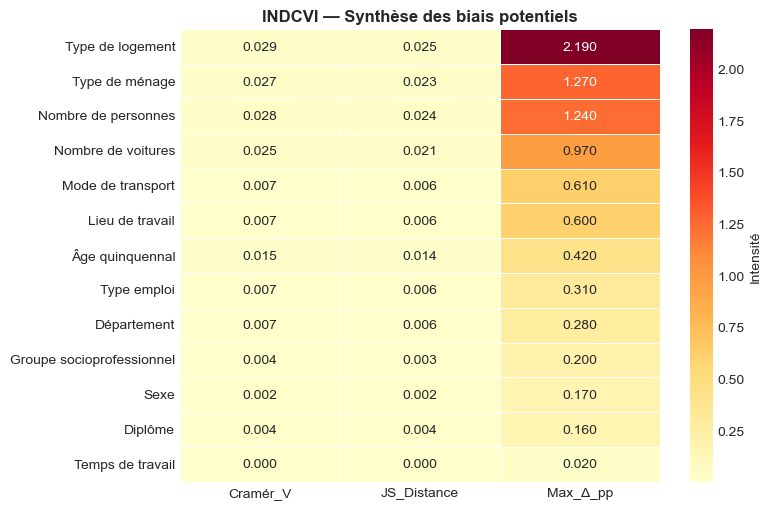

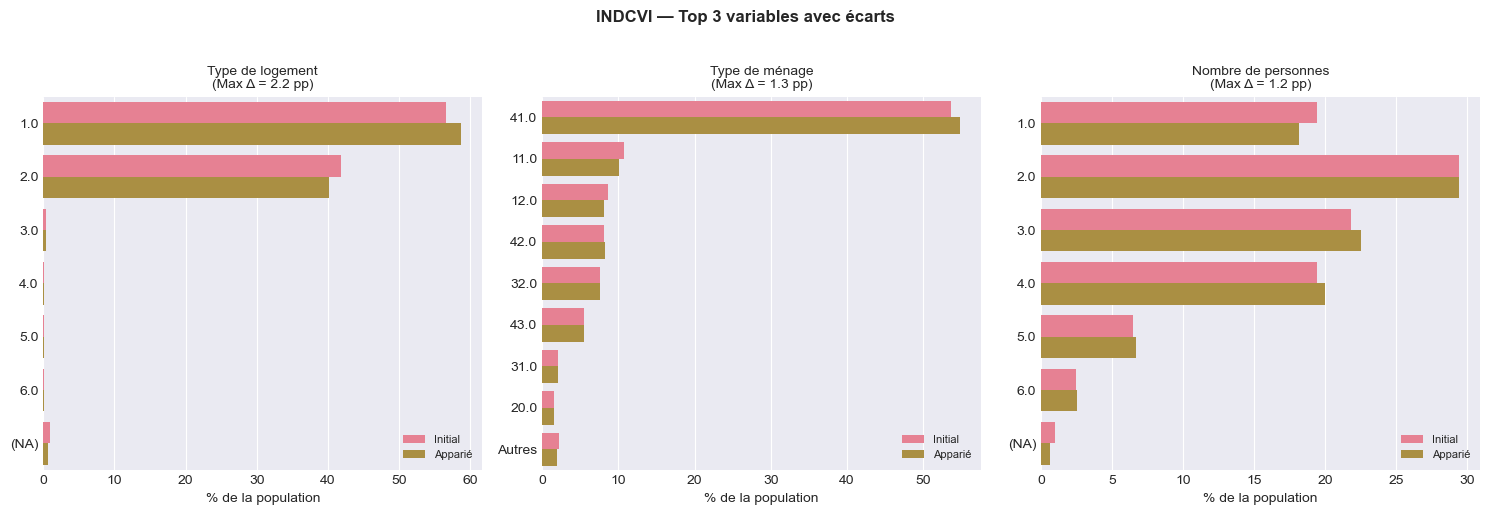


==============================  MOBPRO  ==============================

📊 Initial: 531,298 | Apparié: 494,483 | Taux: 93.1%
📋 Variables testées: 13

──────────────────────────────────────────────────────────────────────
TABLEAU SYNTHÉTIQUE DES BIAIS
──────────────────────────────────────────────────────────────────────
                    Label  Cramér_V  JS_Distance  Max_Δ_pp       Effet Divergence  Significatif
         Type de logement    0.0289       0.0247      2.18 Négligeable ~Identique          True
           Type de ménage    0.0270       0.0230      1.26 Négligeable ~Identique          True
      Nombre de personnes    0.0275       0.0235      1.24 Négligeable ~Identique          True
       Nombre de voitures    0.0246       0.0211      0.97 Négligeable ~Identique          True
        Mode de transport    0.0073       0.0062      0.61 Négligeable ~Identique          True
          Lieu de travail    0.0066       0.0056      0.60 Négligeable ~Identique          True
      

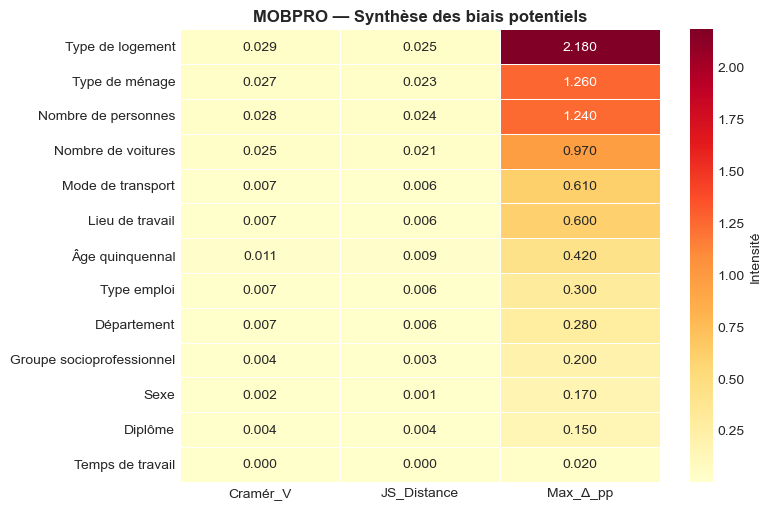

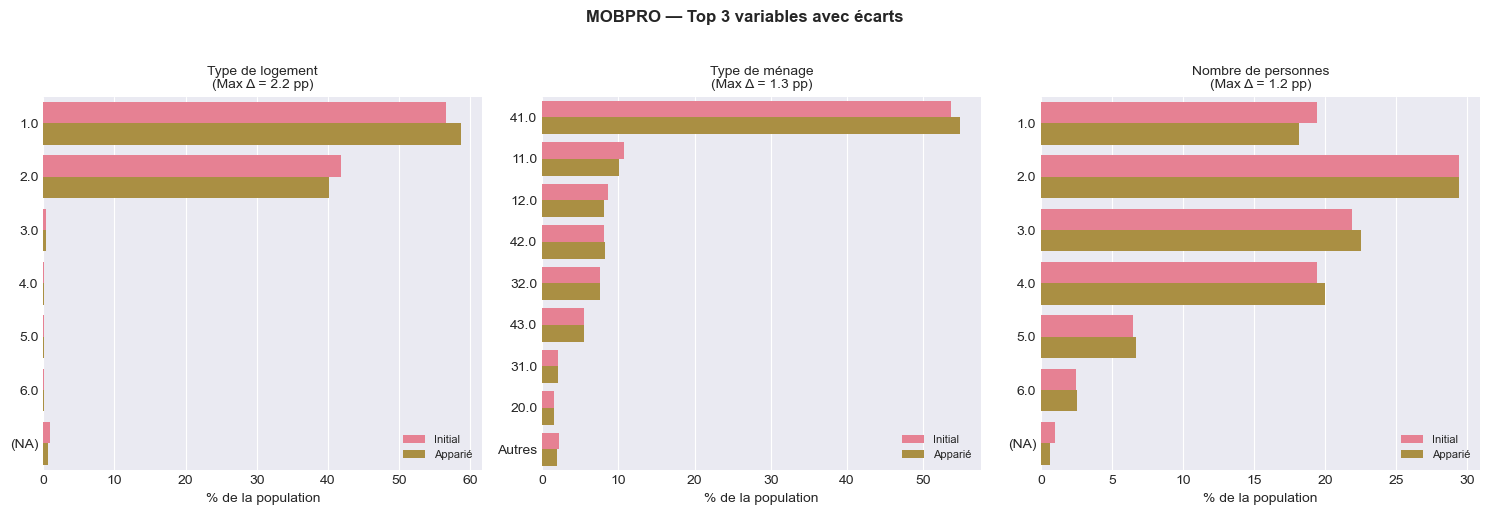


============================  CONCLUSION  ============================

INDCVI:
  • Variable la plus affectée: Type de logement (Δ = 2.2 pp)
  • 10/13 variables significatives

MOBPRO:
  • Variable la plus affectée: Type de logement (Δ = 2.2 pp)
  • 10/13 variables significatives


In [7]:
"""
================================================================================
ANALYSE DES BIAIS DE SÉLECTION — VERSION LÉGÈRE
================================================================================
Focus sur :
  - 1 tableau synthétique par base (toutes les métriques)
  - 1 heatmap finale récapitulative par base  
  - Top 3 variables les plus problématiques en barplot
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.spatial.distance import jensenshannon
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-darkgrid")
pd.set_option("display.max_columns", None)

# ============================================================================
# CHEMINS
# ============================================================================
PATH_MOBPRO_INITIAL = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_MOBPRO_ENRICHI.csv"
PATH_INDCVI_INITIAL = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_INDCVI_ENRICHI.csv"
PATH_BDD_APPARIEE   = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_APPARIEE_FINALE.csv"

OUT_DIR = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean")

# ============================================================================
# VARIABLES À TESTER
# ============================================================================
VARIABLES = {
    # Démographiques
    "SEXE": "Sexe",
    "AGEREVQ": "Âge quinquennal",
    "DIPL": "Diplôme",
    "GS": "Groupe socioprofessionnel",
    "EMPL": "Type emploi",
    "TP": "Temps de travail",
    # Géographiques
    "DEPT": "Département",
    "ILT": "Lieu de travail",
    "TRANS": "Mode de transport",
    "VOIT": "Nombre de voitures",
    # Logement
    "TYPL": "Type de logement",
    "TYPMR": "Type de ménage",
    "NPERR": "Nombre de personnes",
}

ALPHA = 0.05
TOP_N_BARPLOTS = 3  # Nombre de variables à afficher en barplot


# ============================================================================
# FONCTIONS UTILITAIRES
# ============================================================================
def interpret_cramers_v(v: float) -> str:
    if v < 0.1: return "Négligeable"
    if v < 0.3: return "Faible"
    if v < 0.5: return "Moyen"
    return "FORT"

def interpret_js(js: float) -> str:
    if js < 0.05: return "~Identique"
    if js < 0.15: return "Faible"
    if js < 0.30: return "Modérée"
    return "FORTE"


def compute_metrics(df: pd.DataFrame, variable: str) -> dict:
    """Calcule Chi2, Cramér's V, JS distance et max écart pour une variable."""
    try:
        tmp = df[[variable, "groupe"]].copy()
        tmp[variable] = tmp[variable].astype("object").fillna("(NA)")
        
        ct = pd.crosstab(tmp[variable], tmp["groupe"])
        chi2, pval, dof, _ = chi2_contingency(ct)
        
        # Cramér's V
        n = ct.values.sum()
        min_dim = min(ct.shape) - 1
        cramers_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0.0
        
        # Jensen-Shannon
        if "Initial" in ct.columns and "Apparié" in ct.columns:
            p = (ct["Initial"] / ct["Initial"].sum()).values + 1e-12
            q = (ct["Apparié"] / ct["Apparié"].sum()).values + 1e-12
            p, q = p / p.sum(), q / q.sum()
            js = jensenshannon(p, q, base=2)
        else:
            js = 0.0
        
        # Max écart en points de pourcentage
        dist_init = ct["Initial"] / ct["Initial"].sum() * 100
        dist_app = ct["Apparié"] / ct["Apparié"].sum() * 100
        max_diff = (dist_app - dist_init).abs().max()
        
        return {
            "Variable": variable,
            "Chi2": round(chi2, 1),
            "p_value": pval,
            "Cramér_V": round(cramers_v, 4),
            "JS_Distance": round(js, 4),
            "Max_Δ_pp": round(max_diff, 2),
            "Significatif": pval < ALPHA,
            "Effet": interpret_cramers_v(cramers_v),
            "Divergence": interpret_js(js),
        }
    except Exception as e:
        return {"Variable": variable, "Erreur": str(e)}


def compute_distribution(df: pd.DataFrame, variable: str, top_n: int = 10) -> pd.DataFrame:
    """Distribution comparée Initial vs Apparié pour une variable."""
    tmp = df[[variable, "groupe"]].copy()
    tmp[variable] = tmp[variable].astype("object").fillna("(NA)")
    
    dist = tmp.groupby([variable, "groupe"]).size().unstack(fill_value=0)
    dist = dist.apply(lambda x: x / x.sum() * 100)
    
    # Garder top N + regrouper le reste
    total = dist.sum(axis=1).sort_values(ascending=False)
    top_idx = total.head(top_n).index.tolist()
    
    if len(total) > top_n:
        autres = dist.loc[~dist.index.isin(top_idx)].sum()
        dist = dist.loc[top_idx]
        dist.loc["Autres"] = autres
    
    dist["Δ_pp"] = dist["Apparié"] - dist["Initial"]
    return dist.round(2)


# ============================================================================
# VISUALISATIONS (SIMPLIFIÉES)
# ============================================================================
def plot_heatmap_recap(df_metrics: pd.DataFrame, nom_base: str):
    """Heatmap récapitulative des métriques pour toutes les variables."""
    df_plot = df_metrics.set_index("Label")[["Cramér_V", "JS_Distance", "Max_Δ_pp"]].copy()
    df_plot = df_plot.sort_values("Max_Δ_pp", ascending=False)
    
    fig, ax = plt.subplots(figsize=(8, max(4, 0.4 * len(df_plot))))
    sns.heatmap(
        df_plot, annot=True, fmt=".3f", cmap="YlOrRd",
        linewidths=0.5, cbar_kws={"label": "Intensité"}, ax=ax
    )
    ax.set_title(f"{nom_base} — Synthèse des biais potentiels", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")
    plt.tight_layout()
    plt.show()


def plot_top_barplots(df: pd.DataFrame, df_metrics: pd.DataFrame, nom_base: str, top_n: int = 3):
    """Barplots comparatifs pour les N variables les plus problématiques."""
    # Sélectionner les top N par Max_Δ_pp
    top_vars = df_metrics.nlargest(top_n, "Max_Δ_pp")
    
    fig, axes = plt.subplots(1, top_n, figsize=(5 * top_n, 5))
    if top_n == 1:
        axes = [axes]
    
    for ax, (_, row) in zip(axes, top_vars.iterrows()):
        var = row["Variable"]
        label = row["Label"]
        
        dist = compute_distribution(df, var, top_n=8)
        dist_plot = dist[["Initial", "Apparié"]].reset_index()
        dist_melt = dist_plot.melt(id_vars=var, var_name="Groupe", value_name="%")
        
        sns.barplot(data=dist_melt, x="%", y=var, hue="Groupe", ax=ax, orient="h")
        ax.set_title(f"{label}\n(Max Δ = {row['Max_Δ_pp']:.1f} pp)", fontsize=10)
        ax.set_xlabel("% de la population")
        ax.set_ylabel("")
        ax.legend(title="", loc="lower right", fontsize=8)
    
    fig.suptitle(f"{nom_base} — Top {top_n} variables avec écarts", fontsize=12, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()


# ============================================================================
# FONCTION PRINCIPALE D'ANALYSE
# ============================================================================
def analyser_base(base_init: pd.DataFrame, base_appariee: pd.DataFrame, nom_base: str):
    """Analyse complète d'une base avec output minimal."""
    
    print(f"\n{'='*70}")
    print(f"  {nom_base}  ".center(70, "="))
    print(f"{'='*70}")
    
    # Préparation
    base_init = base_init.copy()
    base_appariee = base_appariee.copy()
    base_init["groupe"] = "Initial"
    base_appariee["groupe"] = "Apparié"
    df = pd.concat([base_init, base_appariee], ignore_index=True)
    
    n_init, n_app = len(base_init), len(base_appariee)
    taux = 100 * n_app / n_init
    print(f"\n📊 Initial: {n_init:,} | Apparié: {n_app:,} | Taux: {taux:.1f}%")
    
    # Variables disponibles
    vars_dispo = {k: v for k, v in VARIABLES.items() if k in df.columns}
    print(f"📋 Variables testées: {len(vars_dispo)}")
    
    # Calcul des métriques
    metrics = []
    for var, label in vars_dispo.items():
        m = compute_metrics(df, var)
        m["Label"] = label
        metrics.append(m)
    
    df_metrics = pd.DataFrame(metrics)
    df_metrics = df_metrics.sort_values("Max_Δ_pp", ascending=False).reset_index(drop=True)
    
    # Affichage tableau synthétique
    print(f"\n{'─'*70}")
    print("TABLEAU SYNTHÉTIQUE DES BIAIS")
    print(f"{'─'*70}")
    
    cols_display = ["Label", "Cramér_V", "JS_Distance", "Max_Δ_pp", "Effet", "Divergence", "Significatif"]
    print(df_metrics[cols_display].to_string(index=False))
    
    n_sig = df_metrics["Significatif"].sum()
    print(f"\n✅ {n_sig}/{len(df_metrics)} variables significatives (α={ALPHA})")
    
    # Graphiques
    print(f"\n{'─'*70}")
    print("VISUALISATIONS")
    print(f"{'─'*70}")
    
    # 1. Heatmap récapitulative
    plot_heatmap_recap(df_metrics, nom_base)
    
    # 2. Top 3 barplots
    plot_top_barplots(df, df_metrics, nom_base, top_n=TOP_N_BARPLOTS)
    
    return df_metrics


# ============================================================================
# MAIN
# ============================================================================
def main():
    print("\n" + "=" * 70)
    print("  ANALYSE DES BIAIS DE SÉLECTION — VERSION LÉGÈRE  ".center(70))
    print("=" * 70)
    
    # Chargement
    print("\n📂 Chargement des données...")
    mobpro_init = pd.read_csv(PATH_MOBPRO_INITIAL, sep=";", low_memory=False)
    indcvi_init = pd.read_csv(PATH_INDCVI_INITIAL, sep=";", low_memory=False)
    bdd_appariee = pd.read_csv(PATH_BDD_APPARIEE, sep=";", low_memory=False)
    
    # Extraction des parties appariées
    cols_indcvi = [c for c in bdd_appariee.columns if c.endswith("_INDCVI")]
    indcvi_app = bdd_appariee[cols_indcvi].copy()
    indcvi_app.columns = [c.replace("_INDCVI", "") for c in indcvi_app.columns]
    
    cols_mobpro = [c for c in bdd_appariee.columns if c.endswith("_MOBPRO")]
    mobpro_app = bdd_appariee[cols_mobpro].copy()
    mobpro_app.columns = [c.replace("_MOBPRO", "") for c in mobpro_app.columns]
    
    print(f"   MOBPRO: {len(mobpro_init):,} → {len(mobpro_app):,}")
    print(f"   INDCVI: {len(indcvi_init):,} → {len(indcvi_app):,}")
    
    # Analyses
    metrics_indcvi = analyser_base(indcvi_init, indcvi_app, "INDCVI")
    metrics_mobpro = analyser_base(mobpro_init, mobpro_app, "MOBPRO")
    
    # Conclusion
    print("\n" + "=" * 70)
    print("  CONCLUSION  ".center(70, "="))
    print("=" * 70)
    
    for name, metrics in [("INDCVI", metrics_indcvi), ("MOBPRO", metrics_mobpro)]:
        max_row = metrics.loc[metrics["Max_Δ_pp"].idxmax()]
        print(f"\n{name}:")
        print(f"  • Variable la plus affectée: {max_row['Label']} (Δ = {max_row['Max_Δ_pp']:.1f} pp)")
        print(f"  • {metrics['Significatif'].sum()}/{len(metrics)} variables significatives")
    
    return {"indcvi": metrics_indcvi, "mobpro": metrics_mobpro}


if __name__ == "__main__":
    resultats = main()

## Analyse du biais de sélection résiduel post-appariement

### Objectif

Cette analyse vise à évaluer l'existence d'un biais de sélection induit par l'appariement 
entre les bases **INDCVI** et **MOBPRO**, en comparant les distributions des variables 
observables entre la population initiale et la population appariée.

Les indicateurs mobilisés sont :
- le test du **χ²** (significativité statistique),
- le **V de Cramér** (taille d'effet),
- la **distance de Jensen–Shannon** (divergence globale des distributions),
- l'**écart maximal en points de pourcentage** entre modalités (*Max |Δ| pp*).

---

### Résultats – INDCVI

| Statistique          | Valeur  |
|-------------         |-------- |
| Population initiale  | 531 425 |
| Population appariée  | 494 483 |
| Variables testées    | 13      |

| Variables significatives (α = 5 %) | **10 / 13** |

#### Variables non significatives

| Variable | p-value | Interprétation |
|----------|---------|----------------|
| **Sexe** | 0.082 | Aucun biais genré détectable |
| **Diplôme** | 0.058 | Distribution préservée |
| **Temps de travail** | 0.788 | Quasi-identique |

#### Variables significatives — Ampleur des écarts

| Variable                  | V de Cramér | JS Distance | Max \|Δ\| (pp) |
|----------                 |-------------|-------------|----------------|
| Type de logement          | 0.029       | 0.025       | 2.19 |
| Type de ménage            | 0.027       | 0.023       | 1.27 |
| Nombre de personnes       | 0.027       | 0.023       | 1.24 |
| Nombre de voitures        | 0.025       | 0.021       | 0.97 |
| Mode de transport         | 0.007       | 0.006       | 0.61 |
| Lieu de travail           | 0.007       | 0.006       | 0.61 |
| Âge quinquennal           | 0.015       | 0.014       | 0.42 |
| Type d'emploi             | 0.007       | 0.006       | 0.31 |
| Département               | 0.007       | 0.006       | 0.28 |
| Groupe socioprofessionnel | 0.004       | 0.003       | 0.20 |

Malgré la significativité statistique, les indicateurs de taille d'effet restent **très faibles** :
- **V de Cramér** systématiquement inférieur à **0.03**, indiquant des effets négligeables,
- **Distance de Jensen–Shannon** inférieure à **0.025** pour l'ensemble des variables,
- **Écart maximal** limité à **2.2 points de pourcentage**, concentré sur les variables 
  de structure du ménage et du logement.

---

### Résultats – MOBPRO

| Statistique | Valeur |
|-------------|--------|
| Population initiale | 531 298 |
| Population appariée | 494 483 |
| Variables testées | 13 |
| Variables significatives (α = 5 %) | **10 / 13** |

Les résultats obtenus sur la base **MOBPRO** sont quasi-identiques à ceux d'INDCVI :

#### Variables non significatives

| Variable | p-value | Convergence avec INDCVI |
|----------|---------|-------------------------|
| **Sexe** | 0.090 | ✓ Cohérent |
| **Diplôme** | 0.065 | ✓ Cohérent |
| **Temps de travail** | 0.811 | ✓ Cohérent |

#### Ordres de grandeur

- **V de Cramér < 0.03** pour toutes les variables,
- **JS distance < 0.025**,
- **Max |Δ| ≤ 2.2 pp**, avec les mêmes variables dominantes (type de logement, 
  composition du ménage).

La **convergence parfaite** des résultats entre les deux bases confirme la robustesse 
de l'analyse et l'absence de biais différentiel lié à la source.

---

### Interprétation

La significativité statistique observée (10/13 variables) s'explique principalement par 
la **taille très élevée des échantillons** (> 500 000 observations) et ne reflète pas 
un biais substantiel. En effet :

1. **Tailles d'effet négligeables** : V de Cramér systématiquement < 0.03 
   (seuil conventionnel d'effet faible : 0.10)

2. **Divergences distributionnelles minimes** : Distance JS < 0.025 
   (sur une échelle de 0 à 1)

3. **Écarts localisés et de faible amplitude** : Maximum 2.2 pp, concentré sur 
   des variables de structure du ménage peu corrélées au statut de travailleur transfrontalier

4. **Variables clés préservées** : Sexe, diplôme et temps de travail — variables 
   centrales pour l'analyse économétrique — ne présentent aucune différence significative

---

## Nettoyage post-appariement

In [8]:
"""
================================================================================
NETTOYAGE POST-APPARIEMENT - VERSION SIMPLE
================================================================================

Logique :
1. Pour chaque variable dupliquée (_MOBPRO / _INDCVI) : 
   - Garder MOBPRO, supprimer INDCVI, renommer sans suffixe
2. Supprimer les colonnes techniques (KEY_N1, KEY_N2, is_unique_key...)
3. C'est tout.

Auteur : Mehdi Fehri
Date : 2025-01-06
================================================================================
"""

import pandas as pd
from pathlib import Path

# ================================================================================
# PARAMÈTRES
# ================================================================================

PATH_BDD_APPARIEE = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_APPARIEE_FINALE.csv"

OUT_DIR = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean")
OUT_BDD_CLEAN = OUT_DIR / "BDD_FINAL_CLEAN.csv"

# ================================================================================
# NETTOYAGE
# ================================================================================

def main():
    
    print("="*80)
    print("NETTOYAGE POST-APPARIEMENT")
    print("="*80)
    
    # Charger
    print("\n📂 Chargement...")
    df = pd.read_csv(PATH_BDD_APPARIEE, sep=";", low_memory=False)
    print(f"   {len(df):,} lignes × {len(df.columns)} colonnes")
    
    n_cols_avant = len(df.columns)
    
    # -------------------------------------------------------------------------
    # 1. IDENTIFIER LES COLONNES DUPLIQUÉES
    # -------------------------------------------------------------------------
    
    cols_mobpro = [c for c in df.columns if c.endswith("_MOBPRO")]
    cols_indcvi = [c for c in df.columns if c.endswith("_INDCVI")]
    
    # Variables de base dupliquées
    bases_mobpro = {c.replace("_MOBPRO", "") for c in cols_mobpro}
    bases_indcvi = {c.replace("_INDCVI", "") for c in cols_indcvi}
    bases_dupliquees = bases_mobpro & bases_indcvi
    
    print(f"\n📊 Colonnes dupliquées : {len(bases_dupliquees)}")
    print(f"   {sorted(bases_dupliquees)}")
    
    # -------------------------------------------------------------------------
    # 2. SUPPRIMER _INDCVI, RENOMMER _MOBPRO
    # -------------------------------------------------------------------------
    
    print("\n🔧 Traitement des doublons...")
    
    for base in bases_dupliquees:
        col_mobpro = base + "_MOBPRO"
        col_indcvi = base + "_INDCVI"
        
        # Supprimer INDCVI
        if col_indcvi in df.columns:
            df = df.drop(columns=[col_indcvi])
        
        # Renommer MOBPRO → nom de base
        if col_mobpro in df.columns:
            df = df.rename(columns={col_mobpro: base})
    
    print(f"   ✅ {len(bases_dupliquees)} colonnes _INDCVI supprimées")
    print(f"   ✅ {len(bases_dupliquees)} colonnes _MOBPRO renommées")
    
    # -------------------------------------------------------------------------
    # 3. SUPPRIMER LES COLONNES TECHNIQUES
    # -------------------------------------------------------------------------
    
    cols_techniques = ["KEY_N1", "KEY_N2", "is_unique_key_MOBPRO", "is_unique_key_INDCVI"]
    cols_a_supprimer = [c for c in cols_techniques if c in df.columns]
    
    if cols_a_supprimer:
        df = df.drop(columns=cols_a_supprimer)
        print(f"\n🗑️  Colonnes techniques supprimées : {cols_a_supprimer}")
    
    # -------------------------------------------------------------------------
    # 4. RÉSUMÉ
    # -------------------------------------------------------------------------
    
    n_cols_apres = len(df.columns)
    
    print("\n" + "="*80)
    print("RÉSUMÉ")
    print("="*80)
    print(f"\n   Colonnes avant : {n_cols_avant}")
    print(f"   Colonnes après : {n_cols_apres}")
    print(f"   Supprimées     : {n_cols_avant - n_cols_apres}")
    print(f"   Lignes         : {len(df):,}")
    
    # -------------------------------------------------------------------------
    # 5. EXPORT
    # -------------------------------------------------------------------------
    
    print(f"\n💾 Export...")
    df.to_csv(OUT_BDD_CLEAN, index=False, sep=";")
    print(f"   ✅ {OUT_BDD_CLEAN}")
    
    # Afficher les colonnes finales
    print(f"\n📋 Colonnes finales ({len(df.columns)}) :")
    for i, col in enumerate(df.columns, 1):
        print(f"   {i:3d}. {col}")
    
    return df


if __name__ == "__main__":
    df = main()

NETTOYAGE POST-APPARIEMENT

📂 Chargement...
   494,483 lignes × 132 colonnes

📊 Colonnes dupliquées : 26
   ['AGEREVQ', 'ARM', 'CANTVILLE', 'DEPCOM', 'DEPT', 'DEROU', 'DIPL', 'EMPL', 'GS', 'ILT', 'IMMI', 'INATC', 'IPONDI', 'LPRM', 'METRODOM', 'MOCO', 'NA5', 'NPERR', 'REGION', 'SEXE', 'STOCD', 'TP', 'TRANS', 'TYPL', 'TYPMR', 'VOIT']

🔧 Traitement des doublons...
   ✅ 26 colonnes _INDCVI supprimées
   ✅ 26 colonnes _MOBPRO renommées

RÉSUMÉ

   Colonnes avant : 132
   Colonnes après : 106
   Supprimées     : 26
   Lignes         : 494,483

💾 Export...
   ✅ /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_FINAL_CLEAN.csv

📋 Colonnes finales (106) :
     1. COMMUNE
     2. ARM
     3. DCFLT
     4. DCLT
     5. AGEREVQ
     6. GS
     7. DEROU
     8. DIPL
     9. EMPL
    10. ILT
    11. ILTUU
    12. IMMI
    13. INATC
    14. INEEM
    15. INPOM
    16. INPSM
    17. IPONDI
    18. LPRM
    19. METRODOM
    20. MOCO
    21. NA5
    22. NPERR
    23. REGION
    24. REGLT
 

## Extrait d'échantillon pour check final

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path

# Chemin vers la BDD finale
PATH_FINAL = "/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_FINAL_CLEAN.csv"

# Chargement
df = pd.read_csv(PATH_FINAL, sep=";", low_memory=False)

print(f"BDD finale chargée : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")

def analyse_variables(df, max_modalities=20):
    rows = []

    for col in df.columns:
        serie = df[col]
        n = len(serie)
        n_missing = serie.isna().sum()
        pct_missing = 100 * n_missing / n

        dtype = serie.dtype

        if pd.api.types.is_numeric_dtype(serie):
            var_type = "Numérique"
            n_modalities = serie.nunique(dropna=True)
            modalities = None
        else:
            var_type = "Catégorielle"
            n_modalities = serie.nunique(dropna=True)

            counts = serie.value_counts(dropna=False).head(max_modalities)
            modalities = ", ".join(
                [f"{idx} ({cnt})" for idx, cnt in counts.items()]
            )

        rows.append({
            "variable": col,
            "type": var_type,
            "dtype": str(dtype),
            "nb_modalites": n_modalities,
            "taux_manquants_%": round(pct_missing, 2),
            "modalites_principales": modalities
        })

    return pd.DataFrame(rows).sort_values(
        by=["type", "nb_modalites"], ascending=[True, False]
    )

df_dict = analyse_variables(df)
df_dict.head(10)

# Paramètres
N_SAMPLE = 10_000
RANDOM_SEED = 42

df_sample = df.sample(
    n=N_SAMPLE,
    random_state=RANDOM_SEED
)

print(f"Échantillon extrait : {df_sample.shape[0]:,} lignes")

OUT_SAMPLE = Path("/Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_FINAL_sample_10000.xlsx")

with pd.ExcelWriter(OUT_SAMPLE, engine="openpyxl") as writer:
    df_sample.to_excel(writer, sheet_name="data", index=False)
    df_dict.to_excel(writer, sheet_name="dictionnaire_variables", index=False)

print(f"Fichier Excel généré : {OUT_SAMPLE}")




BDD finale chargée : 494,483 lignes × 106 colonnes
Échantillon extrait : 10,000 lignes
Fichier Excel généré : /Users/mehdifehri/Desktop/Projet INSEE/BDD/BDD GE/BDD Clean/BDD_FINAL_sample_10000.xlsx



### Conclusion de la partie (1) - préparation des BDD

L'analyse ne met pas en évidence de **biais de sélection majeur** lié à l'appariement.  
Les différences observées correspondent à un **biais résiduel faible et localisé**, 
compatible avec un appariement de haute qualité.

**La base de données finale (494 483 observations × 106 variables) est validée** 
et prête pour les étapes suivantes du projet :

| Étape | Objectif | Méthode |
|-------|----------|---------|
| **1** | Sélection des variables pertinentes | Régression pénalisée LASSO / Elastic Net |
| **2** | Estimation des déterminants individuels | Probit binaire simple |
| **3** | Analyse de l'hétérogénéité genrée | Probit binaire avec interactions genre × covariables |
| **4** | Modélisation des décisions conjointes | Probit bivarié (coordination au sein des couples) |

Cette séquence méthodologique permettra d'identifier les facteurs influençant la probabilité 
d'être travailleur transfrontalier dans le Grand Est, tout en explorant les différences 
hommes/femmes et les dynamiques de coordination intra-ménage.

## FIN DE LA PARTIE (1)